# Sentiment Analysis and recommendation on Ebuss's e-commerce company 


## Preparing Ebuss dataset

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip


from sklearn.feature_extraction.text import CountVectorizer




# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')


In [3]:
##########################################
## IMPORT ELECTRONICS PRODUCT REVIEW DATA IN PANDAS
##########################################

review_df = pd.read_csv('sample30.csv', sep = ',')


In [4]:
##########################################
## CHECK DATA IN PANDAS
##########################################

# change column name 
review_df = review_df.rename(columns={'reviews_rating': 'Rating'})

print ("Total data:", str(review_df.shape))
review_df.head()

Total data: (30000, 15)


id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  Rating  \
0                 NaN                 NaN       5   
1                True                 NaN       5   
2                True                 NaN       5   
3               False               False       1   
4               False               False       1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua       Positive  
1              NaN                  NaN        dorothy w       Positive  
2              NaN                  NaN        dorothy w       Positive  
3              NaN                  NaN          rebecca       Negative  
4              NaN                  NaN        walker557       Negative

In [4]:
review_df.shape

(30000, 15)

In [5]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   Rating                30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

review_df.isnull().sum()


id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
Rating                      0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

## Data Wrangling

In [7]:
review_df.shape

(30000, 15)

In [8]:
review_df.reviews_title.unique()

array(['Just Awesome', 'Good', 'Disappointed', ...,
       'Hair is so smooth after use', 'Perfect for my oily hair!',
       'Conditioned into healthy'], dtype=object)

In [9]:
##########################################
## CHECKING FOR MISSING VALUES
##########################################

review_df.isnull().sum()


id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
Rating                      0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [10]:
##########################################
## DROPPING SALESRANK FROM DATASET
##########################################

review_df=review_df.drop('reviews_userProvince', axis=1)
review_df=review_df.drop('reviews_didPurchase', axis=1)
review_df=review_df.drop('reviews_doRecommend', axis=1)
review_df=review_df.drop('reviews_userCity', axis=1)

In [11]:
##########################################
## FINAL CHECKING FOR MISSING VALUES
##########################################

review_df.isnull().sum()


id                    0
brand                 0
categories            0
manufacturer        141
name                  0
reviews_date         46
Rating                0
reviews_text          0
reviews_title       190
reviews_username     63
user_sentiment        1
dtype: int64

In [12]:
review_df2=review_df.dropna(subset=['manufacturer','reviews_date','reviews_username','reviews_title','user_sentiment'])

In [13]:
review_df2.isnull().sum()

id                  0
brand               0
categories          0
manufacturer        0
name                0
reviews_date        0
Rating              0
reviews_text        0
reviews_title       0
reviews_username    0
user_sentiment      0
dtype: int64

In [14]:
review_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29566 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29566 non-null  object
 1   brand             29566 non-null  object
 2   categories        29566 non-null  object
 3   manufacturer      29566 non-null  object
 4   name              29566 non-null  object
 5   reviews_date      29566 non-null  object
 6   Rating            29566 non-null  int64 
 7   reviews_text      29566 non-null  object
 8   reviews_title     29566 non-null  object
 9   reviews_username  29566 non-null  object
 10  user_sentiment    29566 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


In [15]:
review_df2.to_csv('review_df4.csv', sep=',', encoding='utf-8', index = False)

In [16]:
review_df2.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

   Rating                                       reviews_text reviews_title  \
0       5  i love this album. it's very good. more to the...  Just Awesome   
1       5  Good flavor. This review was collected as part...          Good   
2       5                                       Good flavor.          Good   
3       1  I read through the reviews on here before look...  Disappointed   
4       1  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_username user_sentiment  
0           joshua       Positive  
1        dorothy w       Positive  
2        dorothy w       Positive  
3          rebecca       Negative  
4        walker557       Negative

In [17]:
##########################################
## CONCATENATE reviews_text AND reviews_title 
##########################################

review_df2['review_text'] = review_df2[['reviews_text', 'reviews_title']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
review_df2 = review_df2.drop(['reviews_text', 'reviews_title'], axis = 1)
review_df2.head()


id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

   Rating reviews_username user_sentiment  \
0       5           joshua       Positive   
1       5        dorothy w       Positive   
2       5        dorothy w       Positive   
3       1          rebecca       Negative   
4       1        walker557       Negative   

                                         review_text  
0  i love this album. it's very good. more to the...  
1  Good flavor. This review was collected as part...  
2                                  Good flavor. Good  
3  I read through the reviews on here before look...  
4  My husband bought this gel for us. The gel cau...

In [18]:
review_df2['review_text'][654]


'Its a dream come true because it takes all of your wrinkles away also it makes my skin feel fuller and im beautiful Simply God Like'

In [19]:
review_df2.user_sentiment[review_df2.user_sentiment == 'Negative'] = 0

In [20]:
review_df2.user_sentiment[review_df2.user_sentiment == 'Positive'] = 1

In [21]:
review_df2.head(5)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

   Rating reviews_username user_sentiment  \
0       5           joshua              1   
1       5        dorothy w              1   
2       5        dorothy w              1   
3       1          rebecca              0   
4       1        walker557              0   

                                         review_text  
0  i love this album. it's very good. more to the...  
1  Good flavor. This review was collected as part...  
2                                  Good flavor. Good  
3  I read through the reviews on here before look...  
4  My husband bought this gel for us. The gel cau...

In [22]:
##########################################
## Classify ratings as good
##########################################

good_rate = len(review_df2[review_df2['Rating'] >= 3])
bad_rate = len(review_df2[review_df2['Rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for products'.format(good_rate))
print ('Bad ratings : {} reviews for products'.format(bad_rate))


Good ratings : 27808 reviews for products
Bad ratings : 1758 reviews for products


In [23]:
##########################################
# Apply the new classification to the ratings column
##########################################
review_df2['rating_class'] = review_df2['Rating'].apply(lambda x: 'bad' if x < 3 else'good')
review_df2.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

   Rating reviews_username user_sentiment  \
0       5           joshua              1   
1       5        dorothy w              1   
2       5        dorothy w              1   
3       1          rebecca              0   
4       1        walker557              0   

                                         review_text rating_class  
0  i love this album. it's very good. more to the...         good  
1  Good flavor. This review was collected as part...         good  
2                                  Good flavor. Good         good  
3  I read through the reviews on here before look...          bad  
4  My husband bought this gel for us. The gel cau...          bad

In [24]:
##########################################
# checking duplicates based on'id', 'reviews_username' and 'reviews_date'columns
##########################################


review_df2[review_df2.duplicated(['id','reviews_username','reviews_date'],keep= False)]


id          brand  \
1      AV14LG0R-jtxr-f38QfS       Lundberg   
2      AV14LG0R-jtxr-f38QfS       Lundberg   
10     AV16khLE-jtxr-f38VFn            K-Y   
12     AV16khLE-jtxr-f38VFn            K-Y   
67     AV1l8zRZvKc47QAVhnAv           Olay   
...                     ...            ...   
28353  AVpfRTh1ilAPnD_xYic2         Disney   
28355  AVpfRTh1ilAPnD_xYic2         Disney   
28356  AVpfRTh1ilAPnD_xYic2         Disney   
29065  AVpfW8y_LJeJML437ySW  L'oreal Paris   
29436  AVpfW8y_LJeJML437ySW  L'oreal Paris   

                                              categories   manufacturer  \
1      Food,Packaged Foods,Snacks,Crackers,Snacks, Co...       Lundberg   
2      Food,Packaged Foods,Snacks,Crackers,Snacks, Co...       Lundberg   
10     Personal Care,Medicine Cabinet,Lubricant/Sperm...            K-Y   
12     Personal Care,Medicine Cabinet,Lubricant/Sperm...            K-Y   
67     Personal Care,Skin Care,Anti-Aging,Beauty,Face...            P&G   
...                                                  ...            ...   
28353  Movies, Music & Books,Movies,Kids' & Family,Wa...    Walt Disney   
28355  Movies, Music & Books,Movies,Kids' & Family,Wa...    Walt Disney   
28356  Movies, Music & Books,Movies,Kids' & Family,Wa...    Walt Disney   
29065  Beauty,Hair Care,Shampoo & Conditioner,Holiday...  L'oreal Paris   
29436  Beauty,Hair Care,Shampoo & Conditioner,Holiday...  L'oreal Paris   

                                                    name  \
1             Lundberg Organic Cinnamon Toast Rice Cakes   
2             Lundberg Organic Cinnamon Toast Rice Cakes   
10                      K-Y Love Sensuality Pleasure Gel   
12                      K-Y Love Sensuality Pleasure Gel   
67     Olay Regenerist Deep Hydration Regenerating Cream   
...                                                  ...   
28353  Planes: Fire Rescue (2 Discs) (includes Digita...   
28355  Planes: Fire Rescue (2 Discs) (includes Digita...   
28356  Planes: Fire Rescue (2 Discs) (includes Digita...   
29065  L'or233al Paris Elvive Extraordinary Clay Reba...   
29436  L'or233al Paris Elvive Extraordinary Clay Reba...   

                   reviews_date  Rating  reviews_username user_sentiment  \
1      2017-07-09T00:00:00.000Z       5         dorothy w              1   
2      2017-07-09T00:00:00.000Z       5         dorothy w              1   
10     2016-04-08T00:00:00.000Z       1           jds1992              0   
12     2016-04-08T00:00:00.000Z       1           jds1992              0   
67     2016-04-30T03:08:38.000Z       3     mylifeinheels              1   
...                         ...     ...               ...            ...   
28353  2014-12-15T00:00:00.000Z       5            germz7              1   
28355  2014-11-07T00:00:00.000Z       5       nevergivnup              1   
28356  2014-11-07T00:00:00.000Z       5  electrotnicjunky              1   
29065  2017-01-10T00:13:52.000Z       4    chicagojessica              1   
29436  2017-01-10T00:13:52.000Z       4    chicagojessica              1   

                                             review_text rating_class  
1      Good flavor. This review was collected as part...         good  
2                                      Good flavor. Good         good  
10     tried it with my husband and felt no different...          bad  
12     Bought this to enhance our time a bit, did abs...          bad  
67     Today is my first time using this product. Fel...         good  
...                                                  ...          ...  
28353  We got this for my fianc?'s nephew. He was so ...         good  
28355  Family loved this one?? Way better story line ...         good  
28356  When I heard of PLANES: FIRE & RESCUE, I could...         good  
29065  *i received this product for free in exchange ...         good  
29436  *i received this product for free in exchange ...         good  

[298 rows x 11 columns]

In [25]:
review_df2.shape

(29566, 11)

In [26]:
##########################################
# Drop 'reviewName' and 'unixReviewTime'columns
##########################################

review_df2 = review_df2.drop_duplicates(['id','reviews_username','reviews_date'], keep = 'first')


In [27]:
review_df2.shape

(29415, 11)

In [28]:

review_df2.head(5)


id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   
5  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
3                                 K-Y   
4                                 K-Y   
5                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   
5            K-Y Love Sensuality Pleasure Gel  2016-04-20T00:00:00.000Z   

   Rating reviews_username user_sentiment  \
0       5           joshua              1   
1       5        dorothy w              1   
3       1          rebecca              0   
4       1        walker557              0   
5       1         samantha              0   

                                         review_text rating_class  
0  i love this album. it's very good. more to the...         good  
1  Good flavor. This review was collected as part...         good  
3  I read through the reviews on here before look...          bad  
4  My husband bought this gel for us. The gel cau...          bad  
5  My boyfriend and I bought this to spice things...          bad

In [29]:
##########################################
## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(review_df2)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(review_df2.reviews_username.unique()))
reviewer_prop = float(len(review_df2.reviews_username.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(review_df2.id.unique()))
product_prop = float(len(review_df2.id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(review_df2.Rating.mean(),3))

### Average helpful ratio
### print ("Average helpfull ratio score: ",round(review_df2.help_prop.mean(),3))


print ("================================================")

Number of reviews:  29415

Number of unique reviewers:  24632
Prop of unique reviewers:  0.837

Number of unique products:  249
Prop of unique products:  0.008

Average rating score:  4.485


In [30]:
review_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29415 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29415 non-null  object
 1   brand             29415 non-null  object
 2   categories        29415 non-null  object
 3   manufacturer      29415 non-null  object
 4   name              29415 non-null  object
 5   reviews_date      29415 non-null  object
 6   Rating            29415 non-null  int64 
 7   reviews_username  29415 non-null  object
 8   user_sentiment    29415 non-null  object
 9   review_text       29415 non-null  object
 10  rating_class      29415 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


In [31]:
# Read statistic summary of numeric variables
review_df2[['Rating']].describe()

Rating
count  29415.000000
mean       4.485331
std        0.986125
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

Text(0, 0.5, 'Number of Reviews')

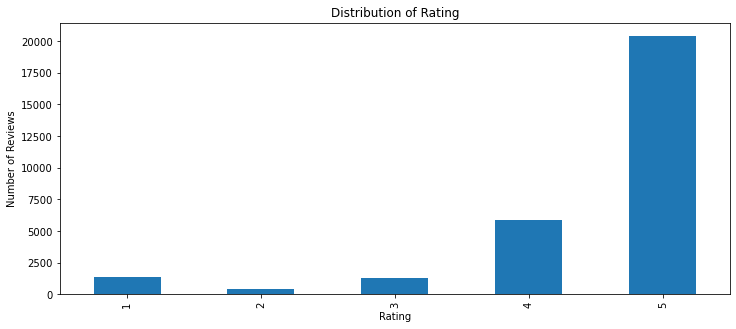

In [32]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################

plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
review_df2['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [33]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 

class_counts = review_df2.groupby('Rating').size()
class_counts

Rating
1     1354
2      400
3     1304
4     5915
5    20442
dtype: int64

In [34]:
##########################################
# Customer totals for each rating class
##########################################
review_df2['rating_class'].value_counts()

good    27661
bad      1754
Name: rating_class, dtype: int64

In [35]:
##########################################
# Print the number of positive feedback
##########################################
pos = len(review_df2[review_df2['user_sentiment'] == 1])
print('Number of positive feedbacks: {}'.format(pos))

##########################################
# Print the number of negative feedback
##########################################
neg = len(review_df2[review_df2['user_sentiment'] == 0])      
print('\nNumber of negative feedbacks: {}'.format(neg))


Number of positive feedbacks: 26126

Number of negative feedbacks: 3289


In [36]:
#product_reviews_hp5 = product_reviews_hp4[product_reviews_hp4['pos_feedback'] == 0]
#product_reviews_hp6 = product_reviews_hp5[product_reviews_hp5['neg_feedback']==0]
#product_reviews_hp6.shape

In [37]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(review_df2['reviews_username'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(review_df2['id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(review_df2)/len(review_df2['reviews_username'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(review_df2)/len(review_df2['id'].unique()))))



Number of unique customers : 24632

Number of unique products : 249

Review per customer: 1.194178304644365

Review per product: 118.13253012048193


## Descriptive Statistic Summary:¶

- Rating Status:

    24632 customer gives ratings and mean of the ratings is 4.4, which means that customers prefer to give high ratings for products. Standard deviation and percentiles also show that 1 and 2 ratings for products are rare. To be able to predict the ratings reasonably, we classified them as 'good' and 'bad' above.

According to the statistics on rating stars:

    1354 customers give 1 star

    400 customers give 2 stars

    1304 customers give 3 stars

    5915 customers give 4 stars

    20442 customers give 5 stars

    1754 customers give bad ratings

    27661 customers give good ratings

- Feedback Status

    27661 customers find the given reviews logical and totally agree with them. They give positive feedbacks. The highest positive feedback number for reviews is 26126.

    1754 customers find the given reviews useless and don't agree with the them. They give negative feedbacks, The highest negative feedback number for reviews is 3289.


## Bag of Words¶
The goal of this project is to classify the reviews into positive and negative sentiment. There are two main steps involved. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

    Step 1 : Preprocess raw reviews to cleaned reviews
    Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
    Step 3 : Transform review text to numerical representations (feature vectors)
    Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
    Step 5 : Improve the model performance by GridSearch


## Text Preprocessing¶
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.




In [60]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions
from contractions import CONTRACTION_MAP
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to C:\Users\KS
[nltk_data]     PRAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KS
[nltk_data]     PRAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KS
[nltk_data]     PRAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (review_df2["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))


Number of raw tokens: 1241817


## Functions for Preprocessing¶


### Expanding Contractions¶
Contractions are shortened version of words or syllables. They exist in either written or spoken forms. Shortened versions of existing words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word.

By nature, contractions do pose a problem for NLP and text analytics because, to start with, we have a special apostrophe character in the word. Ideally, we can have a proper mapping for contractions and their corresponding expansions and then use it to expand all the contractions in our text.



### Removing Special Characters¶
One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.



### Tokenizing Text¶
Tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.

Sentence tokenization is the process of splitting a text corpus into sentences that act as the first level of tokens which the corpus is comprised of. This is also known as sentence segmentation , because we try to segment the text into meaningful sentences.

Word tokenization is the process of splitting or segmenting sentences into their constituent words. A sentence is a collection of words, and with tokenization we essentially split a sentence into a list of words that can be used to reconstruct the sentence.



### Removing Stopwords¶
Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.



### Correcting Words¶
One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance.



#### Correcting Repeating Characters

#### Correcting Spellings

### Lemmatization¶
The process of lemmatization is to remove word affixes to get to a base form of the word. The base form is also known as the root word, or the lemma, will always be present in the dictionary.



In [40]:
import re, string, unicodedata
import nltk
import contractions
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from contractions import CONTRACTION_MAP


In [41]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



# Define function to expand contractions
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                        if CONTRACTION_MAP.get(match)\
                        else CONTRACTION_MAP.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas


In [42]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)


In [43]:
review_df2['clean_text'] = review_df2['review_text'].map(lambda text: normalize_and_lemmaize(text))

In [44]:
review_df2.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
3                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   

   Rating reviews_username user_sentiment  \
0       5           joshua              1   
1       5        dorothy w              1   
3       1          rebecca              0   

                                         review_text rating_class  \
0  i love this album. it's very good. more to the...         good   
1  Good flavor. This review was collected as part...         good   
3  I read through the reviews on here before look...          bad   

                                          clean_text  
0  love album good hip hop side current pop sound...  
1     good flavor review collect part promotion good  
3  read review look buy one couple lubricants ult...

In [45]:
review_df2['clean_text'][544]

'age want cream help skin look healthier improve result products triedi may feel age sometimes really not appear people seem surprise tell therefore continue use regenerist products forever since excellent result think see no reason change review collect part promotion actually provide result look'

In [46]:
review_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29415 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29415 non-null  object
 1   brand             29415 non-null  object
 2   categories        29415 non-null  object
 3   manufacturer      29415 non-null  object
 4   name              29415 non-null  object
 5   reviews_date      29415 non-null  object
 6   Rating            29415 non-null  int64 
 7   reviews_username  29415 non-null  object
 8   user_sentiment    29415 non-null  object
 9   review_text       29415 non-null  object
 10  rating_class      29415 non-null  object
 11  clean_text        29415 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.2+ MB


## Cleaning the Text¶


In [47]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (review_df2["clean_text"].apply(word_tokenize)) for w in t])
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))


Number of clean tokens: 581060

Percentage of removed tokens: 0.53


In [48]:
review_df2.to_csv('clean_reviews.csv', sep=',', encoding='utf-8', index = False)


In [49]:
review_df2.to_json('clean_reviews.json')


# Sentiment Analysis - EDA

In [8]:
clean_reviews = pd.read_json('clean_reviews.json')

In [9]:
clean_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29415 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29415 non-null  object
 1   brand             29415 non-null  object
 2   categories        29415 non-null  object
 3   manufacturer      29415 non-null  object
 4   name              29415 non-null  object
 5   reviews_date      29415 non-null  object
 6   Rating            29415 non-null  int64 
 7   reviews_username  29415 non-null  object
 8   user_sentiment    29415 non-null  int64 
 9   review_text       29415 non-null  object
 10  rating_class      29415 non-null  object
 11  clean_text        29415 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.9+ MB


### Inspecting the Dataset

In [10]:
clean_reviews.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
3                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   

   Rating reviews_username  user_sentiment  \
0       5           joshua               1   
1       5        dorothy w               1   
3       1          rebecca               0   

                                         review_text rating_class  \
0  i love this album. it's very good. more to the...         good   
1  Good flavor. This review was collected as part...         good   
3  I read through the reviews on here before look...          bad   

                                          clean_text  
0  love album good hip hop side current pop sound...  
1     good flavor review collect part promotion good  
3  read review look buy one couple lubricants ult...

In [11]:
clean_reviews.shape

(29415, 12)

In [12]:
#import pandas_profiling

In [13]:
#pandas_profiling.ProfileReport(clean_reviews)

Text(0, 0.5, 'Number of Reviews')

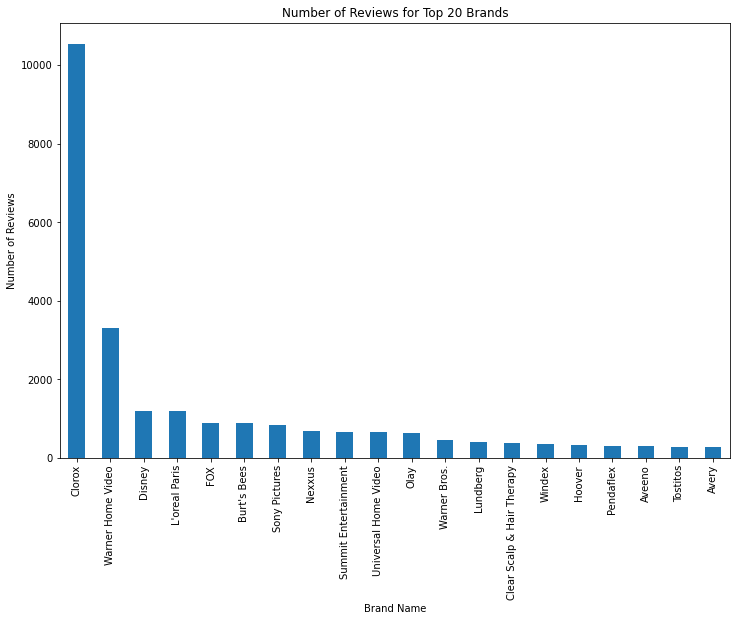

In [14]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = clean_reviews["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

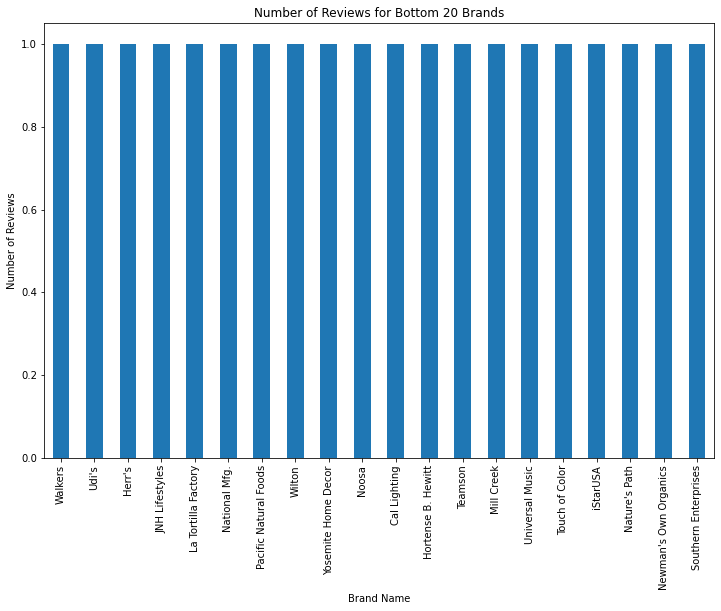

In [15]:
##########################################
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = clean_reviews["brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

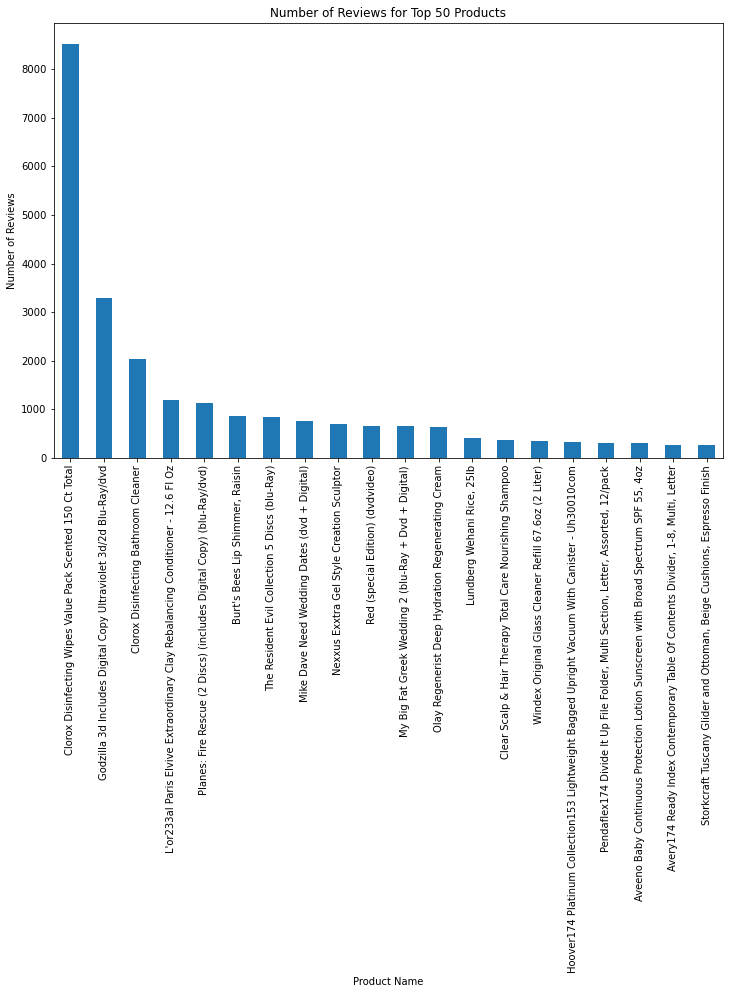

In [16]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = clean_reviews["name"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

#### EDA -  low rating and reviews

In [17]:
j_5 = clean_reviews[(clean_reviews['id']=="AVpfPaoqLJeJML435Xk9")]

j_5

id              brand  \
22884  AVpfPaoqLJeJML435Xk9  Warner Home Video   
22885  AVpfPaoqLJeJML435Xk9  Warner Home Video   
22886  AVpfPaoqLJeJML435Xk9  Warner Home Video   
22887  AVpfPaoqLJeJML435Xk9  Warner Home Video   
22888  AVpfPaoqLJeJML435Xk9  Warner Home Video   
...                     ...                ...   
26197  AVpfPaoqLJeJML435Xk9  Warner Home Video   
26198  AVpfPaoqLJeJML435Xk9  Warner Home Video   
26199  AVpfPaoqLJeJML435Xk9  Warner Home Video   
26200  AVpfPaoqLJeJML435Xk9  Warner Home Video   
26201  AVpfPaoqLJeJML435Xk9  Warner Home Video   

                                              categories manufacturer  \
22884  Movies, Music & Books,Movies,Action & Adventur...         Test   
22885  Movies, Music & Books,Movies,Action & Adventur...         Test   
22886  Movies, Music & Books,Movies,Action & Adventur...         Test   
22887  Movies, Music & Books,Movies,Action & Adventur...         Test   
22888  Movies, Music & Books,Movies,Action & Adventur...         Test   
...                                                  ...          ...   
26197  Movies, Music & Books,Movies,Action & Adventur...         Test   
26198  Movies, Music & Books,Movies,Action & Adventur...         Test   
26199  Movies, Music & Books,Movies,Action & Adventur...         Test   
26200  Movies, Music & Books,Movies,Action & Adventur...         Test   
26201  Movies, Music & Books,Movies,Action & Adventur...         Test   

                                                    name  \
22884  Godzilla 3d Includes Digital Copy Ultraviolet ...   
22885  Godzilla 3d Includes Digital Copy Ultraviolet ...   
22886  Godzilla 3d Includes Digital Copy Ultraviolet ...   
22887  Godzilla 3d Includes Digital Copy Ultraviolet ...   
22888  Godzilla 3d Includes Digital Copy Ultraviolet ...   
...                                                  ...   
26197  Godzilla 3d Includes Digital Copy Ultraviolet ...   
26198  Godzilla 3d Includes Digital Copy Ultraviolet ...   
26199  Godzilla 3d Includes Digital Copy Ultraviolet ...   
26200  Godzilla 3d Includes Digital Copy Ultraviolet ...   
26201  Godzilla 3d Includes Digital Copy Ultraviolet ...   

                   reviews_date  Rating reviews_username  user_sentiment  \
22884  2015-08-05T00:00:00.000Z       1     primoconcept               1   
22885  2015-07-13T00:00:00.000Z       1           terrym               1   
22886  2016-01-29T00:00:00.000Z       1             mrme               0   
22887  2016-07-07T00:00:00.000Z       1        3dknights               0   
22888  2016-12-02T00:00:00.000Z       1           master               0   
...                         ...     ...              ...             ...   
26197  2017-09-02T00:00:00.000Z       5          mdatc34               1   
26198  2017-09-01T00:00:00.000Z       5             abam               1   
26199  2017-09-01T00:00:00.000Z       5      incrediblet               1   
26200  2017-09-01T00:00:00.000Z       5         moviefan               1   
26201  2017-09-01T00:00:00.000Z       5             pink               1   

                                             review_text rating_class  \
22884  could have left this one on the shelf but it h...          bad   
22885  This movie is much worse that expected. The 19...          bad   
22886  Just don't get the hype about Godzilla. Frankl...          bad   
22887  A little disappointed its not like the Godzill...          bad   
22888  It was on sale, so I bought it. After I got it...          bad   
...                                                  ...          ...   
26197  I really enjoyed this movie for it's entertain...         good   
26198  This Godzilla remake is way way way better tha...         good   
26199  In this reboot, along with Kong: Skull Island,...         good   
26200  For the price this was a good purchase...The b...         good   
26201  Great movie! I don't really have more to say a...         good   

                                    

In [18]:
apple_fplot = j_5.groupby(['reviews_date'])['Rating'].mean()
apple_fplot

reviews_date
2014-05-21T00:00:00.000Z    4.0
2014-07-25T00:00:00.000Z    5.0
2014-07-31T00:00:00.000Z    5.0
2014-08-29T00:00:00.000Z    4.0
2014-09-17T00:00:00.000Z    5.0
                           ... 
2017-08-22T00:00:00.000Z    4.0
2017-08-25T00:00:00.000Z    4.0
2017-09-01T00:00:00.000Z    5.0
2017-09-02T00:00:00.000Z    5.0
2017-09-05T00:00:00.000Z    4.0
Name: Rating, Length: 556, dtype: float64

In [19]:
print(j_5['review_text'][22886])

Just don't get the hype about Godzilla. Frankly movie was boring, build up was slow and just not interesting or even worth it. I was even more disappointed to hear Pacific Rim 2 was put on hold for Godzilla vs King Kong if its anything like this movie I'll pass. Oh and because a movie is like the original doesn't make it good, times have changed and an update to the story would work for the new generations. Just dont get the hype


In [20]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in j_5['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])


['place', 'preorder', 'online', 'instore', 'pickup', 'movie', 'advertise', 'metal', 'pack', 'pick', 'item', 'store', 'however', 'standard', 'version', 'not', 'metal', 'packboth', 'items', 'system', 'sku', 'not', 'advertise']


In [21]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1


Combien de Mots !!! 3974


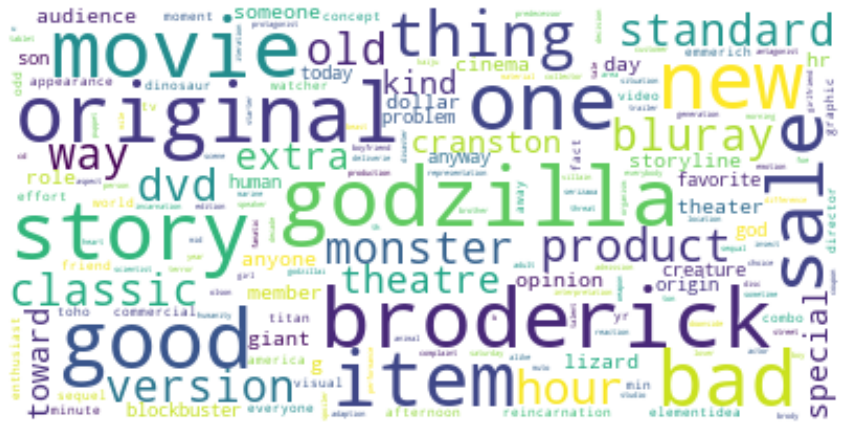

In [22]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words4))


<AxesSubplot:>

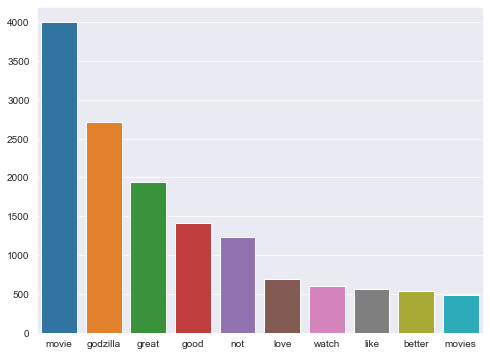

In [23]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [24]:
j_1 = clean_reviews[(clean_reviews['id']=="AVpf3VOfilAPnD_xjpun") & (clean_reviews['Rating']<3)]
j_1

id   brand  \
6479  AVpf3VOfilAPnD_xjpun  Clorox   
6480  AVpf3VOfilAPnD_xjpun  Clorox   
6481  AVpf3VOfilAPnD_xjpun  Clorox   
6482  AVpf3VOfilAPnD_xjpun  Clorox   
6483  AVpf3VOfilAPnD_xjpun  Clorox   
6484  AVpf3VOfilAPnD_xjpun  Clorox   
6485  AVpf3VOfilAPnD_xjpun  Clorox   
6486  AVpf3VOfilAPnD_xjpun  Clorox   
6487  AVpf3VOfilAPnD_xjpun  Clorox   
6488  AVpf3VOfilAPnD_xjpun  Clorox   
6489  AVpf3VOfilAPnD_xjpun  Clorox   
6490  AVpf3VOfilAPnD_xjpun  Clorox   
6491  AVpf3VOfilAPnD_xjpun  Clorox   
6492  AVpf3VOfilAPnD_xjpun  Clorox   
6493  AVpf3VOfilAPnD_xjpun  Clorox   
6494  AVpf3VOfilAPnD_xjpun  Clorox   
6495  AVpf3VOfilAPnD_xjpun  Clorox   
6496  AVpf3VOfilAPnD_xjpun  Clorox   
6497  AVpf3VOfilAPnD_xjpun  Clorox   
6498  AVpf3VOfilAPnD_xjpun  Clorox   
6499  AVpf3VOfilAPnD_xjpun  Clorox   
6500  AVpf3VOfilAPnD_xjpun  Clorox   
6501  AVpf3VOfilAPnD_xjpun  Clorox   
6502  AVpf3VOfilAPnD_xjpun  Clorox   
6503  AVpf3VOfilAPnD_xjpun  Clorox   
6504  AVpf3VOfilAPnD_xjpun  Clorox   
6505  AVpf3VOfilAPnD_xjpun  Clorox   

                                             categories manufacturer  \
6479  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6480  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6481  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6482  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6483  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6484  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6485  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6486  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6487  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6488  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6489  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6490  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6491  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6492  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6493  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6494  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6495  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6496  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6497  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6498  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6499  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6500  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6501  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6502  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6503  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6504  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   
6505  Household Essentials,Cleaning Supplies,Kitchen...       Clorox   

                                                   name  \
6479  Clorox Disinfecting Wipes Value Pack Scented 1...   
6480  Clorox Disinfecting Wipes Value Pack Scented 1...   
6481  Clorox Disinfecting Wipes Value Pack Scented 1...   
6482  Clorox Disinfecting Wipes Value Pack Scented 1...   
6483  Clorox Disinfecting Wipes Value Pack Scented 1...   
6484  Clorox Disinfecting Wipes Value Pack Scented 1...   
6485  Clorox Disinfecting Wipes Value Pack Scented 1...   
6486  Clorox Disinfecting Wipes Value Pack Scented 1...   
6487  Clorox Disinfecting Wipes Value Pack Scented 1...   
6488  Clorox Disinfecting Wipes Value Pack Scented 1...   
6489  Clorox Disinfecting Wipes Value Pack Scented 1...   
6490  Clorox Disinfecting Wipes Value Pack Scented 1...   
6491  Clorox Disinfecting Wipes Value Pack Scented 1...   
6492  Clorox Disinfecting Wipes Value Pack Scented 1...   
6493  Clorox Disinfecting Wipes Value Pack Scented 1...  

In [25]:
print(j_1['review_text'][6494])

I don't like the smell of most strong cleaners. And the earthy cleaners aren't always enough. The green top clorox wipes are my go to disinfectant wipes when we are sick! This review was collected as part of a promotion. The Green Top Rocks


In [26]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in j_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])


['avid', 'user', 'clorox', 'wipe', 'many', 'years', 'love', 'something', 'change', 'recently', 'last', 'purchase', 'exhibit', 'change', 'smell', 'awful', 'smell', 'not', 'know', 'people', 'west', 'coast', 'familiar', 'stink', 'bug', 'east', 'coast', 'infestation', 'exactly', 'clorox', 'wipe', 'smell', 'please', 'change', 'back', 'old', 'formula', 'quick', 'smell']


In [27]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2

Combien de Mots !!! 274


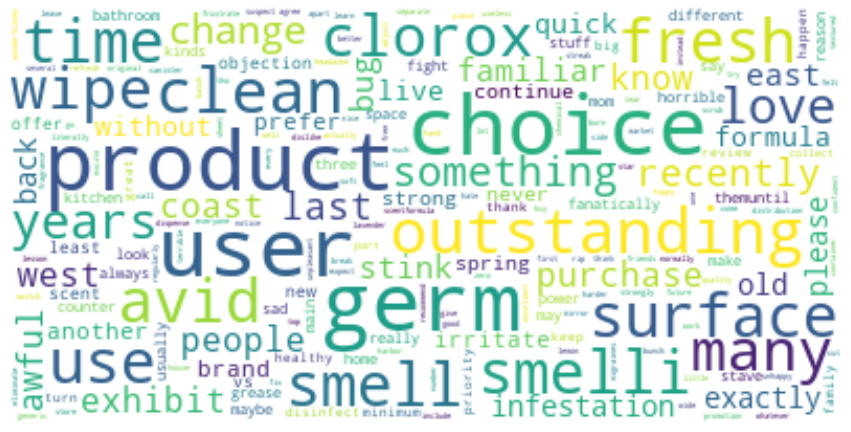

In [28]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words5.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words5))


<AxesSubplot:>

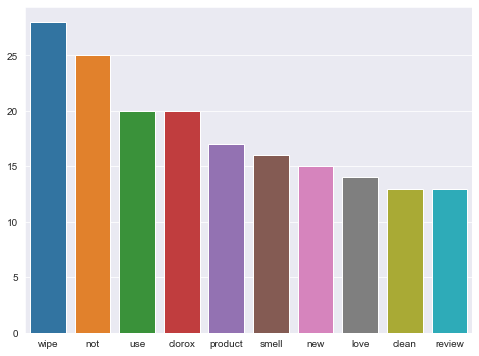

In [29]:
plt.figure(figsize = (8,6))

import seaborn as sns
from sklearn.manifold import TSNE
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

### 1.  "rating_class" and "Review Length" Features

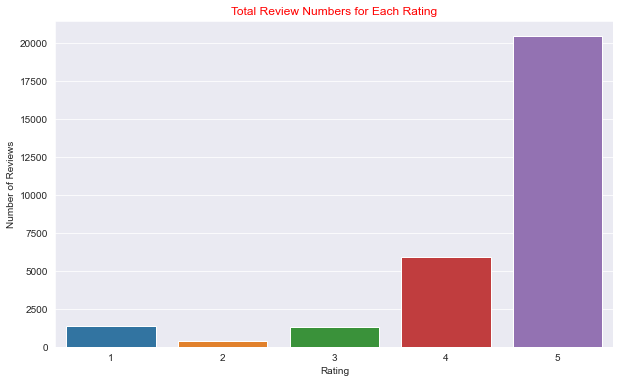

5    20442
4     5915
1     1354
3     1304
2      400
Name: Rating, dtype: int64

In [30]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(clean_reviews['Rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
clean_reviews['Rating'].value_counts()

<AxesSubplot:ylabel='Rating'>

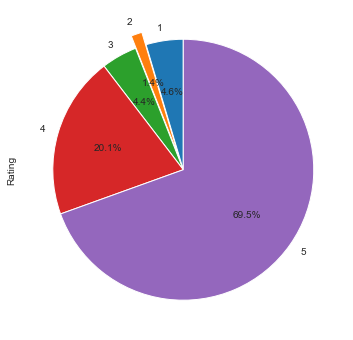

In [31]:
%matplotlib inline
plt.figure(figsize = (10,6))

clean_reviews.groupby('Rating').Rating.count()
clean_reviews.groupby('Rating').Rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [32]:
#data=review_df.copy()
word_count=[]
for s1 in clean_reviews.review_text:
    word_count.append(len(str(s1).split()))


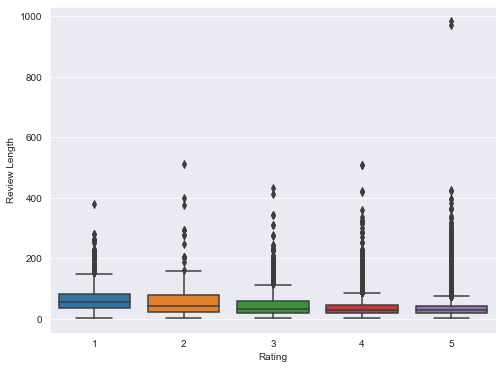

In [33]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Rating",y=word_count,data=clean_reviews)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()


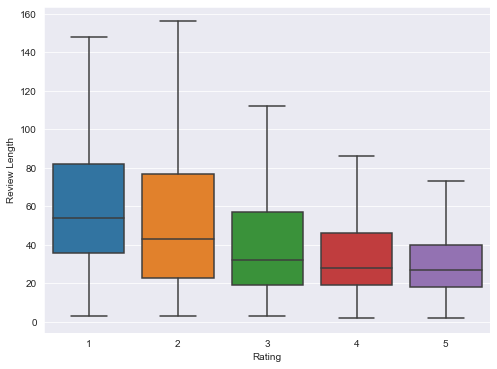

In [34]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="Rating",y=word_count,data=clean_reviews,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

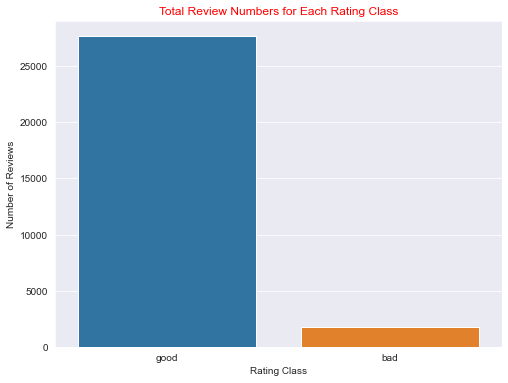

good    27661
bad      1754
Name: rating_class, dtype: int64

In [35]:
# Total numbers of ratings in all the product reviews
plt.figure(figsize = (8,6))
sns.countplot(clean_reviews['rating_class'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
clean_reviews['rating_class'].value_counts()

### 2.1. "year" Feature

In [36]:
# Create a year column and drop time column
#df['reviewtime'] = pd.to_datetime(df['time'], format = '%Y %m %d')
# Create a "year" column and drop time column
#df['review_time'] = pd.to_datetime(df['review_time'])
#clean_reviews2['year'] = clean_reviews['reviews_date'].dt.year
#clean_reviews2 = clean_reviews.drop('reviews_date', axis = 1)
#clean_reviews2.head(3)

In [37]:
df  = clean_reviews

In [38]:
df['reviews_date'] = df.reviews_date.astype(str).apply(lambda x: x[:-13])

In [39]:
df['reviews_date']= pd.to_datetime(df['reviews_date'], errors='coerce')

In [40]:

df['year'] = df['reviews_date'].dt.year
df = df.drop('reviews_date', axis = 1)
df.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
3                                 K-Y   

                                         name  Rating reviews_username  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)       5           joshua   
1  Lundberg Organic Cinnamon Toast Rice Cakes       5        dorothy w   
3            K-Y Love Sensuality Pleasure Gel       1          rebecca   

   user_sentiment                                        review_text  \
0               1  i love this album. it's very good. more to the...   
1               1  Good flavor. This review was collected as part...   
3               0  I read through the reviews on here before look...   

  rating_class                                         clean_text    year  
0         good  love album good hip hop side current pop sound...  2012.0  
1         good     good flavor review collect part promotion good  2017.0  
3          bad  read review look buy one couple lubricants ult...  2016.0

In [41]:
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   
5  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
3                                 K-Y   
4                                 K-Y   
5                                 K-Y   

                                         name  Rating reviews_username  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)       5           joshua   
1  Lundberg Organic Cinnamon Toast Rice Cakes       5        dorothy w   
3            K-Y Love Sensuality Pleasure Gel       1          rebecca   
4            K-Y Love Sensuality Pleasure Gel       1        walker557   
5            K-Y Love Sensuality Pleasure Gel       1         samantha   

   user_sentiment                                        review_text  \
0               1  i love this album. it's very good. more to the...   
1               1  Good flavor. This review was collected as part...   
3               0  I read through the reviews on here before look...   
4               0  My husband bought this gel for us. The gel cau...   
5               0  My boyfriend and I bought this to spice things...   

  rating_class                                         clean_text    year  
0         good  love album good hip hop side current pop sound...  2012.0  
1         good     good flavor review collect part promotion good  2017.0  
3          bad  read review look buy one couple lubricants ult...  2016.0  
4          bad  husband buy gel us gel cause irritation felt l...  2016.0  
5          bad  boyfriend buy spice things bedroom highly disa...  2016.0

In [42]:
df['year']

0        2012.0
1        2017.0
3        2016.0
4        2016.0
5        2016.0
          ...  
29995    2017.0
29996    2017.0
29997    2017.0
29998    2017.0
29999    2017.0
Name: year, Length: 29415, dtype: float64

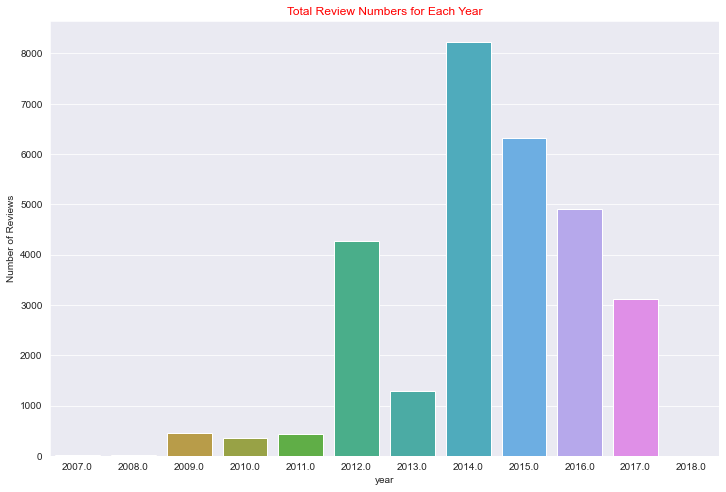

2014.0    8236
2015.0    6318
2016.0    4904
2012.0    4272
2017.0    3112
2013.0    1287
2009.0     447
2011.0     436
2010.0     362
2008.0      20
2007.0      10
2018.0       3
Name: year, dtype: int64

In [43]:
##################################################################
# Total review for every year in the Headphone product
#####################################################################
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

### 2.2. "customer" Feature

In [44]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(df['reviews_username'].unique())))

Number of unique customers: 24632


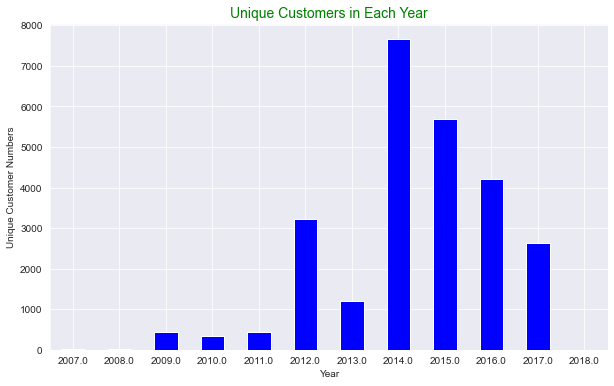

year
2007.0      10
2008.0      18
2009.0     446
2010.0     350
2011.0     432
2012.0    3230
2013.0    1211
2014.0    7659
2015.0    5681
2016.0    4200
2017.0    2636
2018.0       3
Name: reviews_username, dtype: int64


In [45]:
# How many unique customers in each year?
unique_cust = df.groupby('year')['reviews_username'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0, color = 'b')
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

#### How many unique customers do we have in each rating class?

In [46]:
# unique customers for each "rating class"
a = list(df.groupby(['rating_class'])['reviews_username'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                 1372               1754
1         good                23433              27661


Comment:
* Here, "customer uniqueness" computed as a metric of "rating class"
* The purpose is undertsanding "how much are the reviews made by different customers 
  or how much are they populated by same customers.
* For instance, number of customers of "rating class bad " is 699 (nearly 50% of all customers), and they made only 5% (1276) of all reviews, this means 95% of the reviews are given by customers whose rating class is good.
* And some customers are populating the review rates which may effect the test scores negatively.
* For a detailed work, this small nuances can make difference and it may be requried to handle them.

### 2.3. "Product" Feature

In [47]:
# Print number of unique home and kitchen products in the dataset
print('Number of unique home and kitchen products: {}'.format(len(df['name'].unique())))

Number of unique home and kitchen products: 249


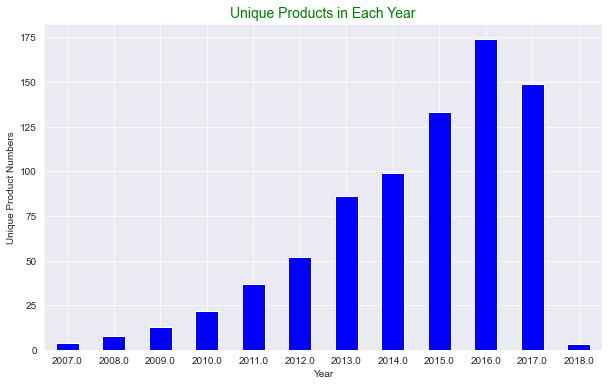

year
2007.0      4
2008.0      8
2009.0     13
2010.0     22
2011.0     37
2012.0     52
2013.0     86
2014.0     99
2015.0    133
2016.0    174
2017.0    149
2018.0      3
Name: name, dtype: int64


In [48]:
# How many unique products in each year?
unique_prod = df.groupby('year')['name'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', color = 'b', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

### 2.4. "review_ length" Feature

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

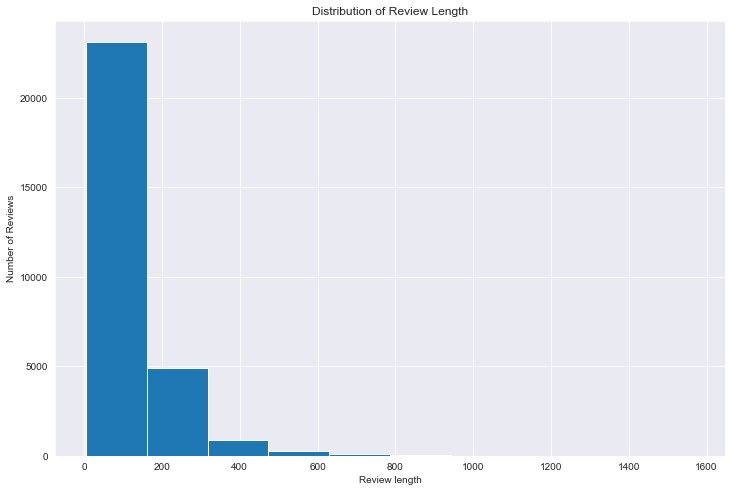

In [49]:
##########################################
## PLOT DISTRIBUTION OF REVIEW LENGTH   
##########################################
plt.figure(figsize = (15,8))

review_length = df["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')


In [50]:
# Let's see how the rating classes change for each year in a table and graph.
# Create a dataframe which shows the relationship between review numbers and rating classes for each year

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

Year  Total Reviews  Relevant Rating Number  \
0   2007.0             10                      10   
1   2008.0             20                      17   
2   2009.0            447                     437   
3   2010.0            362                     345   
4   2011.0            436                     406   
5   2012.0           4272                    4207   
6   2013.0           1287                    1182   
7   2014.0           8236                    8045   
8   2015.0           6318                    5773   
9   2016.0           4904                    4333   
10  2017.0           3112                    2896   
11  2018.0              3                       2   

    % of Relevant Rating Number in This Year  \
0                                 100.000000   
1                                  85.000000   
2                                  97.762864   
3                                  95.303867   
4                                  93.119266   
5                                  98.478464   
6                                  91.841492   
7                                  97.680913   
8                                  91.373852   
9                                  88.356444   
10                                 93.059126   
11                                 66.666667   

    % of Relevant Rating in the Total  
0                            0.044593  
1                            0.075808  
2                            1.948718  
3                            1.538462  
4                            1.810479  
5                           18.760312  
6                            5.270903  
7                           35.875139  
8                           25.743590  
9                           19.322185  
10                          12.914158  
11                           0.008919

<Figure size 864x576 with 0 Axes>

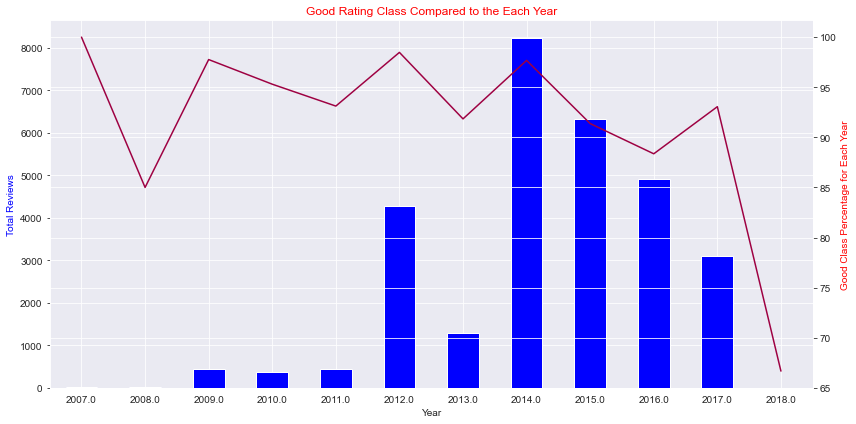

In [51]:
##################################################################
# Create a graph for each rating class to compare within the years
##################################################################

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [61]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['token'] = df['clean_text'].apply(token)

In [62]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
3                                 K-Y   

                                         name  Rating reviews_username  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)       5           joshua   
1  Lundberg Organic Cinnamon Toast Rice Cakes       5        dorothy w   
3            K-Y Love Sensuality Pleasure Gel       1          rebecca   

   user_sentiment                                        review_text  \
0               1  i love this album. it's very good. more to the...   
1               1  Good flavor. This review was collected as part...   
3               0  I read through the reviews on here before look...   

  rating_class                                         clean_text    year  \
0         good  love album good hip hop side current pop sound...  2012.0   
1         good     good flavor review collect part promotion good  2017.0   
3          bad  read review look buy one couple lubricants ult...  2016.0   

   rating_class_num                                              token  \
0                 1  [love, album, good, hip, hop, side, current, p...   
1                 1  [good, flavor, review, collect, part, promotio...   
3                 0  [read, review, look, buy, one, couple, lubrica...   

   review_length  
0             51  
1             14  
3            144

In [63]:
# Create review length bin feature
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,1800,100))
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   
5  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
3                                 K-Y   
4                                 K-Y   
5                                 K-Y   

                                         name  Rating reviews_username  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)       5           joshua   
1  Lundberg Organic Cinnamon Toast Rice Cakes       5        dorothy w   
3            K-Y Love Sensuality Pleasure Gel       1          rebecca   
4            K-Y Love Sensuality Pleasure Gel       1        walker557   
5            K-Y Love Sensuality Pleasure Gel       1         samantha   

   user_sentiment                                        review_text  \
0               1  i love this album. it's very good. more to the...   
1               1  Good flavor. This review was collected as part...   
3               0  I read through the reviews on here before look...   
4               0  My husband bought this gel for us. The gel cau...   
5               0  My boyfriend and I bought this to spice things...   

  rating_class                                         clean_text    year  \
0         good  love album good hip hop side current pop sound...  2012.0   
1         good     good flavor review collect part promotion good  2017.0   
3          bad  read review look buy one couple lubricants ult...  2016.0   
4          bad  husband buy gel us gel cause irritation felt l...  2016.0   
5          bad  boyfriend buy spice things bedroom highly disa...  2016.0   

   rating_class_num                                              token  \
0                 1  [love, album, good, hip, hop, side, current, p...   
1                 1  [good, flavor, review, collect, part, promotio...   
3                 0  [read, review, look, buy, one, couple, lubrica...   
4                 0  [husband, buy, gel, us, gel, cause, irritation...   
5                 0  [boyfriend, buy, spice, things, bedroom, highl...   

   review_length review_length_bin  
0             51          (0, 100]  
1             14          (0, 100]  
3            144        (100, 200]  
4             30          (0, 100]  
5             58          (0, 100]

In [64]:
# Good rating percentages for each length bin with 50's
per_pos_length = df.groupby(['review_length_bin'])['rating_class_num'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         94.984099
(100, 200]       78.677463
(200, 300]       79.581152
(300, 400]       85.714286
(400, 500]       80.000000
(500, 600]       75.000000
(600, 700]             NaN
(700, 800]             NaN
(800, 900]             NaN
(900, 1000]            NaN
(1000, 1100]    100.000000
(1100, 1200]    100.000000
(1200, 1300]           NaN
(1300, 1400]           NaN
(1400, 1500]           NaN
(1500, 1600]           NaN
(1600, 1700]           NaN
Name: rating_class_num, dtype: float64

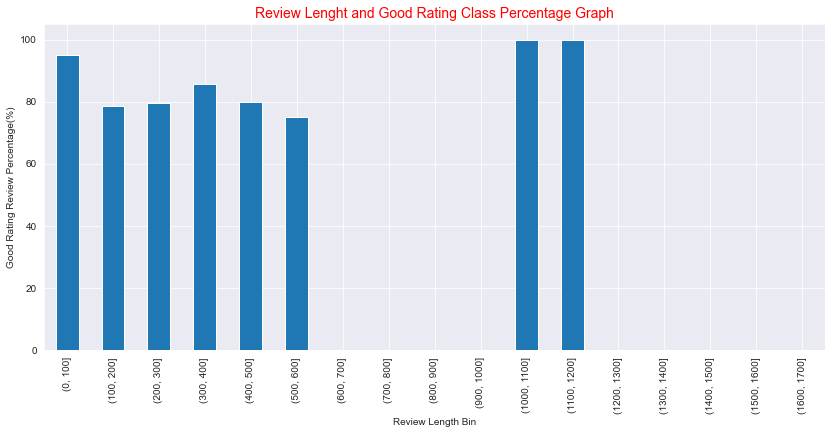

In [65]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

#### Correlation Between Numeric Variables

<AxesSubplot:>

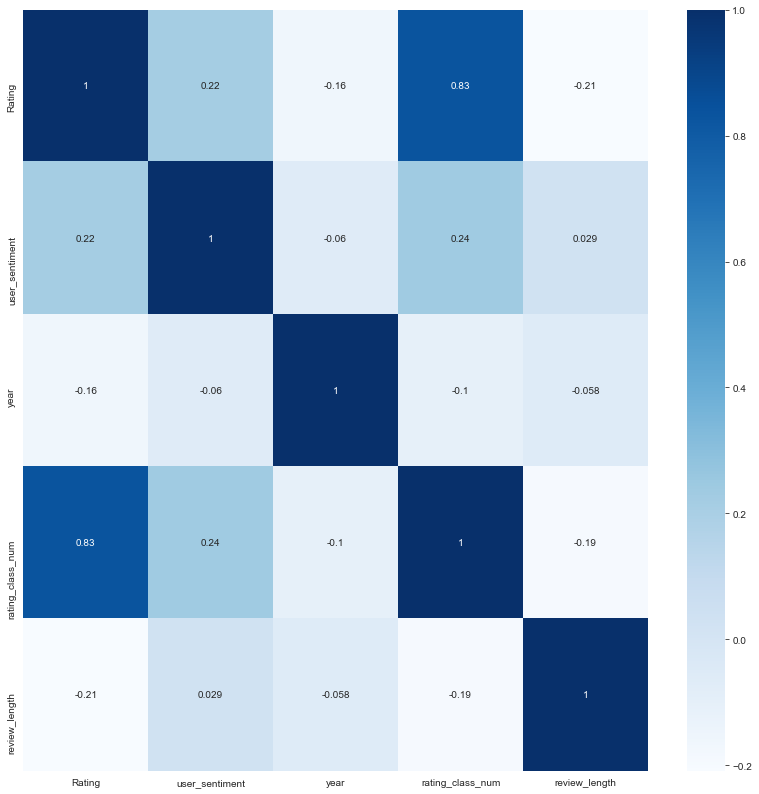

In [66]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(df.corr(method="pearson"), cmap='Blues', annot = True)

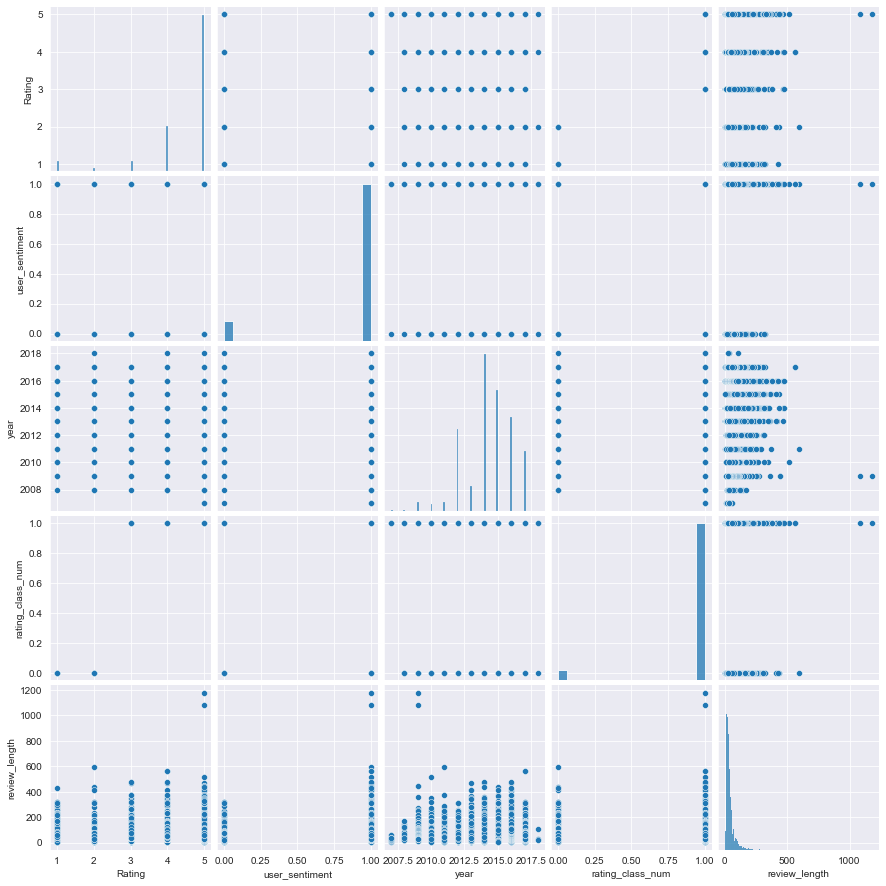

In [67]:
sns.pairplot(df)

### Due to computational considerations, I will reduce reduce the number of observations. I will drop good rating class reviews longer than 150 words, and I will drop all observations earlier than year 2010.

In [68]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_class'] == 'good')].index)

In [69]:
df3

id            brand  \
0      AV13O1A8GV-KLJ3akUyj  Universal Music   
1      AV14LG0R-jtxr-f38QfS         Lundberg   
3      AV16khLE-jtxr-f38VFn              K-Y   
4      AV16khLE-jtxr-f38VFn              K-Y   
5      AV16khLE-jtxr-f38VFn              K-Y   
...                     ...              ...   
29995  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29996  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29997  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29998  AVpfW8y_LJeJML437ySW    L'oreal Paris   
29999  AVpfW8y_LJeJML437ySW    L'oreal Paris   

                                              categories  \
0      Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1      Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5      Personal Care,Medicine Cabinet,Lubricant/Sperm...   
...                                                  ...   
29995  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29996  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29997  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29998  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   
29999  Beauty,Hair Care,Shampoo & Conditioner,Holiday...   

                             manufacturer  \
0      Universal Music Group / Cash Money   
1                                Lundberg   
3                                     K-Y   
4                                     K-Y   
5                                     K-Y   
...                                   ...   
29995                       L'oreal Paris   
29996                       L'oreal Paris   
29997                       L'oreal Paris   
29998                       L'oreal Paris   
29999                       L'oreal Paris   

                                                    name  Rating  \
0              Pink Friday: Roman Reloaded Re-Up (w/dvd)       5   
1             Lundberg Organic Cinnamon Toast Rice Cakes       5   
3                       K-Y Love Sensuality Pleasure Gel       1   
4                       K-Y Love Sensuality Pleasure Gel       1   
5                       K-Y Love Sensuality Pleasure Gel       1   
...                                                  ...     ...   
29995  L'or233al Paris Elvive Extraordinary Clay Reba...       5   
29996  L'or233al Paris Elvive Extraordinary Clay Reba...       5   
29997  L'or233al Paris Elvive Extraordinary Clay Reba...       5   
29998  L'or233al Paris Elvive Extraordinary Clay Reba...       5   
29999  L'or233al Paris Elvive Extraordinary Clay Reba...       5   

      reviews_username  user_sentiment  \
0               joshua               1   
1            dorothy w               1   
3              rebecca               0   
4            walker557               0   
5             samantha               0   
...                ...             ...   
29995       laurasnchz               1   
29996    scarlepadilla               1   
29997       liviasuexo               1   
29998         ktreed95               1   
29999        kcoopxoxo               1   

                                             review_text rating_class  \
0      i love this album. it's very good. more to the...         good   
1      Good flavor. This review was collected as part...         good   
3      I read through the reviews on here before look...          bad   
4      My husband bought this gel for us. The gel cau...          bad   
5      My boyfriend and I bought this to spice things...          bad   
...                                                  ...          ...   
29995  I got this conditioner with Influenster to try...         good   
29996  I love it , I received this for review purpose...         good   
29997  First of all I love the smell of this product....         good   
29998  I received this through Influenster and will n...         good   
29999  I received this product complimentary from inf...     

In [70]:
df4 = df3.drop(df3[(df3['year'] < 2011)].index)
df4=df4.head(10000)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10459
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   brand              10000 non-null  object 
 2   categories         10000 non-null  object 
 3   manufacturer       10000 non-null  object 
 4   name               10000 non-null  object 
 5   Rating             10000 non-null  int64  
 6   reviews_username   10000 non-null  object 
 7   user_sentiment     10000 non-null  int64  
 8   review_text        10000 non-null  object 
 9   rating_class       10000 non-null  object 
 10  clean_text         10000 non-null  object 
 11  year               10000 non-null  float64
 12  rating_class_num   10000 non-null  int64  
 13  token              10000 non-null  object 
 14  review_length      10000 non-null  int64  
 15  review_length_bin  10000 non-null  object 
dtypes: float64(1), int64(4

In [71]:
df4.head(50)

id            brand  \
0   AV13O1A8GV-KLJ3akUyj  Universal Music   
1   AV14LG0R-jtxr-f38QfS         Lundberg   
3   AV16khLE-jtxr-f38VFn              K-Y   
4   AV16khLE-jtxr-f38VFn              K-Y   
5   AV16khLE-jtxr-f38VFn              K-Y   
6   AV16khLE-jtxr-f38VFn              K-Y   
7   AV16khLE-jtxr-f38VFn              K-Y   
8   AV16khLE-jtxr-f38VFn              K-Y   
9   AV16khLE-jtxr-f38VFn              K-Y   
10  AV16khLE-jtxr-f38VFn              K-Y   
11  AV16khLE-jtxr-f38VFn              K-Y   
13  AV16khLE-jtxr-f38VFn              K-Y   
14  AV16khLE-jtxr-f38VFn              K-Y   
15  AV16khLE-jtxr-f38VFn              K-Y   
16  AV16khLE-jtxr-f38VFn              K-Y   
17  AV16khLE-jtxr-f38VFn              K-Y   
18  AV16khLE-jtxr-f38VFn              K-Y   
19  AV16khLE-jtxr-f38VFn              K-Y   
21  AV16khLE-jtxr-f38VFn              K-Y   
22  AV16khLE-jtxr-f38VFn              K-Y   
23  AV16khLE-jtxr-f38VFn              K-Y   
24  AV16khLE-jtxr-f38VFn              K-Y   
25  AV16khLE-jtxr-f38VFn              K-Y   
26  AV16khLE-jtxr-f38VFn              K-Y   
27  AV16khLE-jtxr-f38VFn              K-Y   
28  AV16khLE-jtxr-f38VFn              K-Y   
29  AV16khLE-jtxr-f38VFn              K-Y   
30  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
31  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
32  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
33  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
34  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
35  AV1d76w7vKc47QAVhCqn     J.R. Watkins   
36  AV1h6gSl-jtxr-f31p40             AMBI   
37  AV1h6gSl-jtxr-f31p40             AMBI   
38  AV1h6gSl-jtxr-f31p40             AMBI   
39  AV1h6gSl-jtxr-f31p40             AMBI   
40  AV1h6Gu0glJLPUi8IjA_        Johnson's   
41  AV1h6Gu0glJLPUi8IjA_        Johnson's   
42  AV1h6Gu0glJLPUi8IjA_        Johnson's   
43  AV1h6Gu0glJLPUi8IjA_        Johnson's   
44  AV1h6Gu0glJLPUi8IjA_        Johnson's   
45  AV1h6Gu0glJLPUi8IjA_        Johnson's   
46  AV1h6Gu0glJLPUi8IjA_        Johnson's   
47  AV1h6Gu0glJLPUi8IjA_        Johnson's   
48  AV1h6Gu0glJLPUi8IjA_        Johnson's   
49  AV1h6Gu0glJLPUi8IjA_        Johnson's   
50  AV1h6Gu0glJLPUi8IjA_        Johnson's   
51  AV1h6Gu0glJLPUi8IjA_        Johnson's   
52  AV1h6Gu0glJLPUi8IjA_        Johnson's   

                                           categories  \
0   Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1   Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3   Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4   Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5   Personal Care,Medicine Cabinet,Lubricant/Sperm...   
6   Personal Care,Medicine Cabinet,Lubricant/Sperm...   
7   Personal Care,Medicine Cabinet,Lubricant/Sperm...   
8   Personal Care,Medicine Cabinet,Lubricant/Sperm...   
9   Personal Care,Medicine Cabinet,Lubricant/Sperm...   
10  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
11  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
13  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
14  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
15  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
16  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
17  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
18  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
19  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
21  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
22  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
23  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
24  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
25  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
26  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
27  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
28  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
29  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
30  Personal Care,Skin Care,Hand Cream,Beauty,Body...   
31  Personal Care,Skin Care,Hand Cream,Beauty,Body...   
32  Personal Car

In [72]:
df['review_length'].describe()

count    29415.000000
mean        42.217134
std         37.888604
min          2.000000
25%         21.000000
50%         31.000000
75%         50.000000
max       1179.000000
Name: review_length, dtype: float64

### 2.7. "clean_text" Feature

In [73]:
# Create a new data frame with clean text and rating class number
df5 = df4[["clean_text", "rating_class_num"]]
df5.head(10)

clean_text  rating_class_num
0   love album good hip hop side current pop sound...                 1
1      good flavor review collect part promotion good                 1
3   read review look buy one couple lubricants ult...                 0
4   husband buy gel us gel cause irritation felt l...                 0
5   boyfriend buy spice things bedroom highly disa...                 0
6   buy earlier today excite check base product de...                 0
7   buy product husband try not impress no tingle ...                 0
8   husband buy extra fun werevboth extremely disa...                 0
9   get surprise husband nothing special lube save...                 0
10  try husband felt no different no effect no cha...                 0

In [74]:
# Initialize the countervectorizer
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)

In [75]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10459
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   clean_text        10000 non-null  object
 1   rating_class_num  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [76]:
# Fit the 'clean_text' to countvectorizer
countVec.fit(df5["clean_text"])

CountVectorizer(binary=True, ngram_range=(1, 2))

In [77]:
# Transform the matriz
transformed_matrix = countVec.transform(df5["clean_text"])

In [78]:
# Convert matrix to array
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
np.zeros((10000, 76580), dtype='uint8')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [80]:
# Extracting the feature names
names = countVec.get_feature_names()

In [81]:
# Adding a 'rating' column from previous dataframe's rating value
df6 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df6['rating'] = df5['rating_class_num']

In [82]:
df6['rating'].head()

0    1.0
1    1.0
2    NaN
3    0.0
4    0.0
Name: rating, dtype: float64

In [83]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df6[df6[name]== 1]['rating'].mean()
        rating_count = df6[df6[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [84]:
##### Create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})


In [85]:
# Let's see the new dataframe
df_summary

feature_name  avg_rating  rating_count
0                          aaa         1.0             1
1               aaa production         1.0             1
2            aaaaaaaaaaaaaaaaa         1.0             1
3      aaaaaaaaaaaaaaaaa great         1.0             1
4                  aaaaahhhhhh         1.0             1
...                        ...         ...           ...
76575                zone half         1.0             1
76576                   zorbas         1.0             1
76577              zorbas main         1.0             1
76578                 zucchini         1.0             1
76579         zucchini carrots         1.0             1

[76580 rows x 3 columns]

#### Good rating words

In [86]:
# Words that are commonly used in the reviews which have good ratings
df_good = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

feature_name  avg_rating  rating_count
32380        house smell         1.0            34
32265        house clean         1.0            53
32163            hot dog         1.0            31
63085              stave         1.0            43
32070             hormel         1.0            56
31943             hoover         1.0            45
31867          home work         1.0            22
31516    hilarious movie         1.0            38
31162              helen         1.0            26
72307        watch great         1.0            32
31024               heat         1.0            22
73305         well worth         1.0            23
29585          greek wed         1.0            64
29495         great wipe         1.0            62
29463       great vacuum         1.0            21
29387        great stuff         1.0            21
29337         great show         1.0            31
29326       great sequel         1.0            29
29260     great products         1.0            28
29126         great love         1.0            43
28913         great deal         1.0            61
28881       great comedy         1.0            28
28790       great around         1.0            21
28522          grab wipe         1.0            32
28257       good quality         1.0            21
73540       whole family         1.0            25
28025          good deal         1.0            28
32882          hydration         1.0           104
72300        watch funny         1.0            27
70613          use smell         1.0            25
33162          important         1.0            28
36972        like clorox         1.0            41
36810       light weight         1.0            22
36435             lemony         1.0            24
36414        lemon scent         1.0            55
36382              lemon         1.0           162
36200       leave behind         1.0            26
36045            laundry         1.0            45
35703              large         1.0            22
35416         know clean         1.0            45
35354              knobs         1.0            41
35278     kitchen review         1.0            31
35197  kitchen bathrooms         1.0            27
71010             vacuum         1.0           121
35076         kill germs         1.0            66
35064               kill         1.0            93

In [87]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

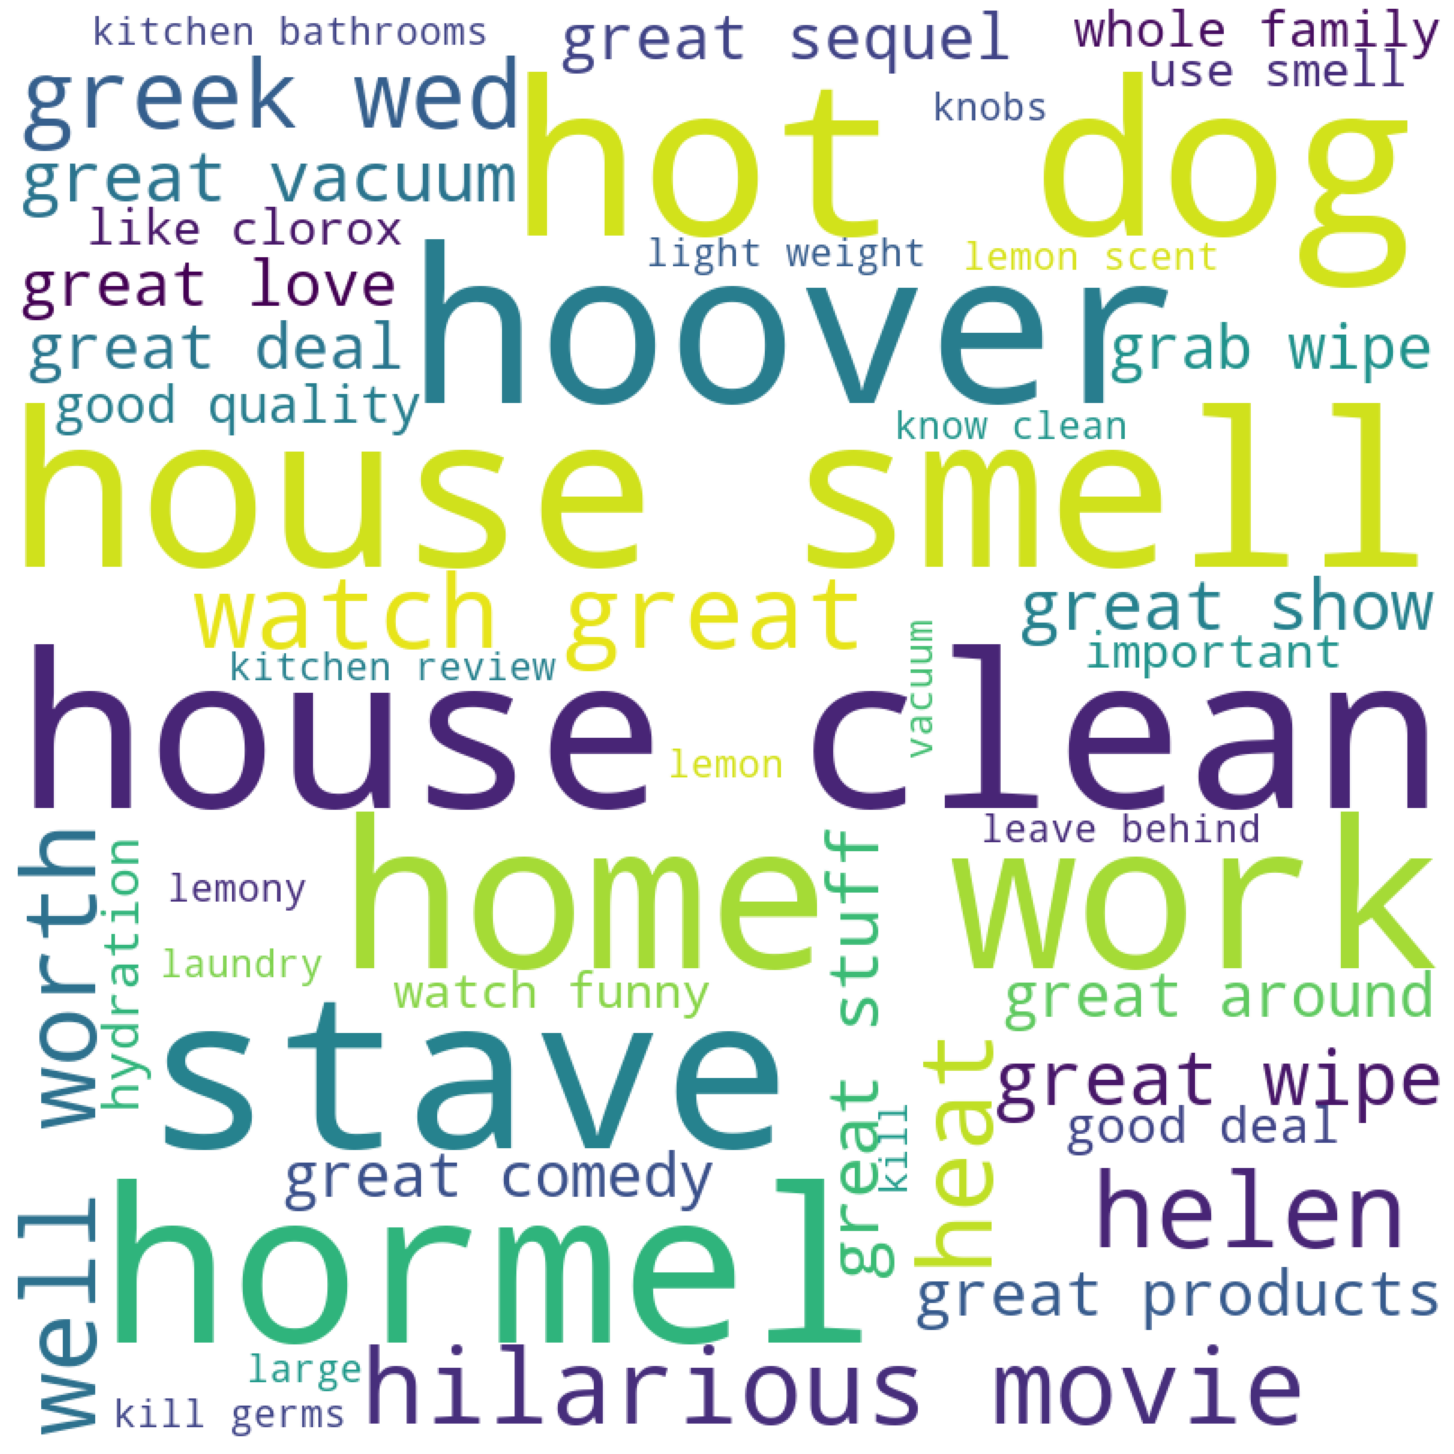

In [88]:

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Fixing the rating count value is above 100, the most common 50 words which belong to good rating class are shown in the table above. Each of these words define which products what kind of good impression have on the customers. 

#### Bad rating words

In [89]:
# Words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.query("rating_count > 10").sort_values(by= 'avg_rating', ascending=True)[:12]

In [90]:
df_bad.sort_values(by=['avg_rating'],ascending=False,inplace=True)
df_bad

feature_name  avg_rating  rating_count
45577             note    0.733333            15
39081     love shampoo    0.727273            11
3994             awful    0.727273            11
9143    change formula    0.727273            11
66923      think would    0.724138            29
42583        movie set    0.692308            13
36322     leave streak    0.682927            41
25057          formula    0.666667            45
46362      old formula    0.666667            12
14024     couple years    0.636364            11
73837  windex original    0.615385            13
63945          streaky    0.583333            12

In [91]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

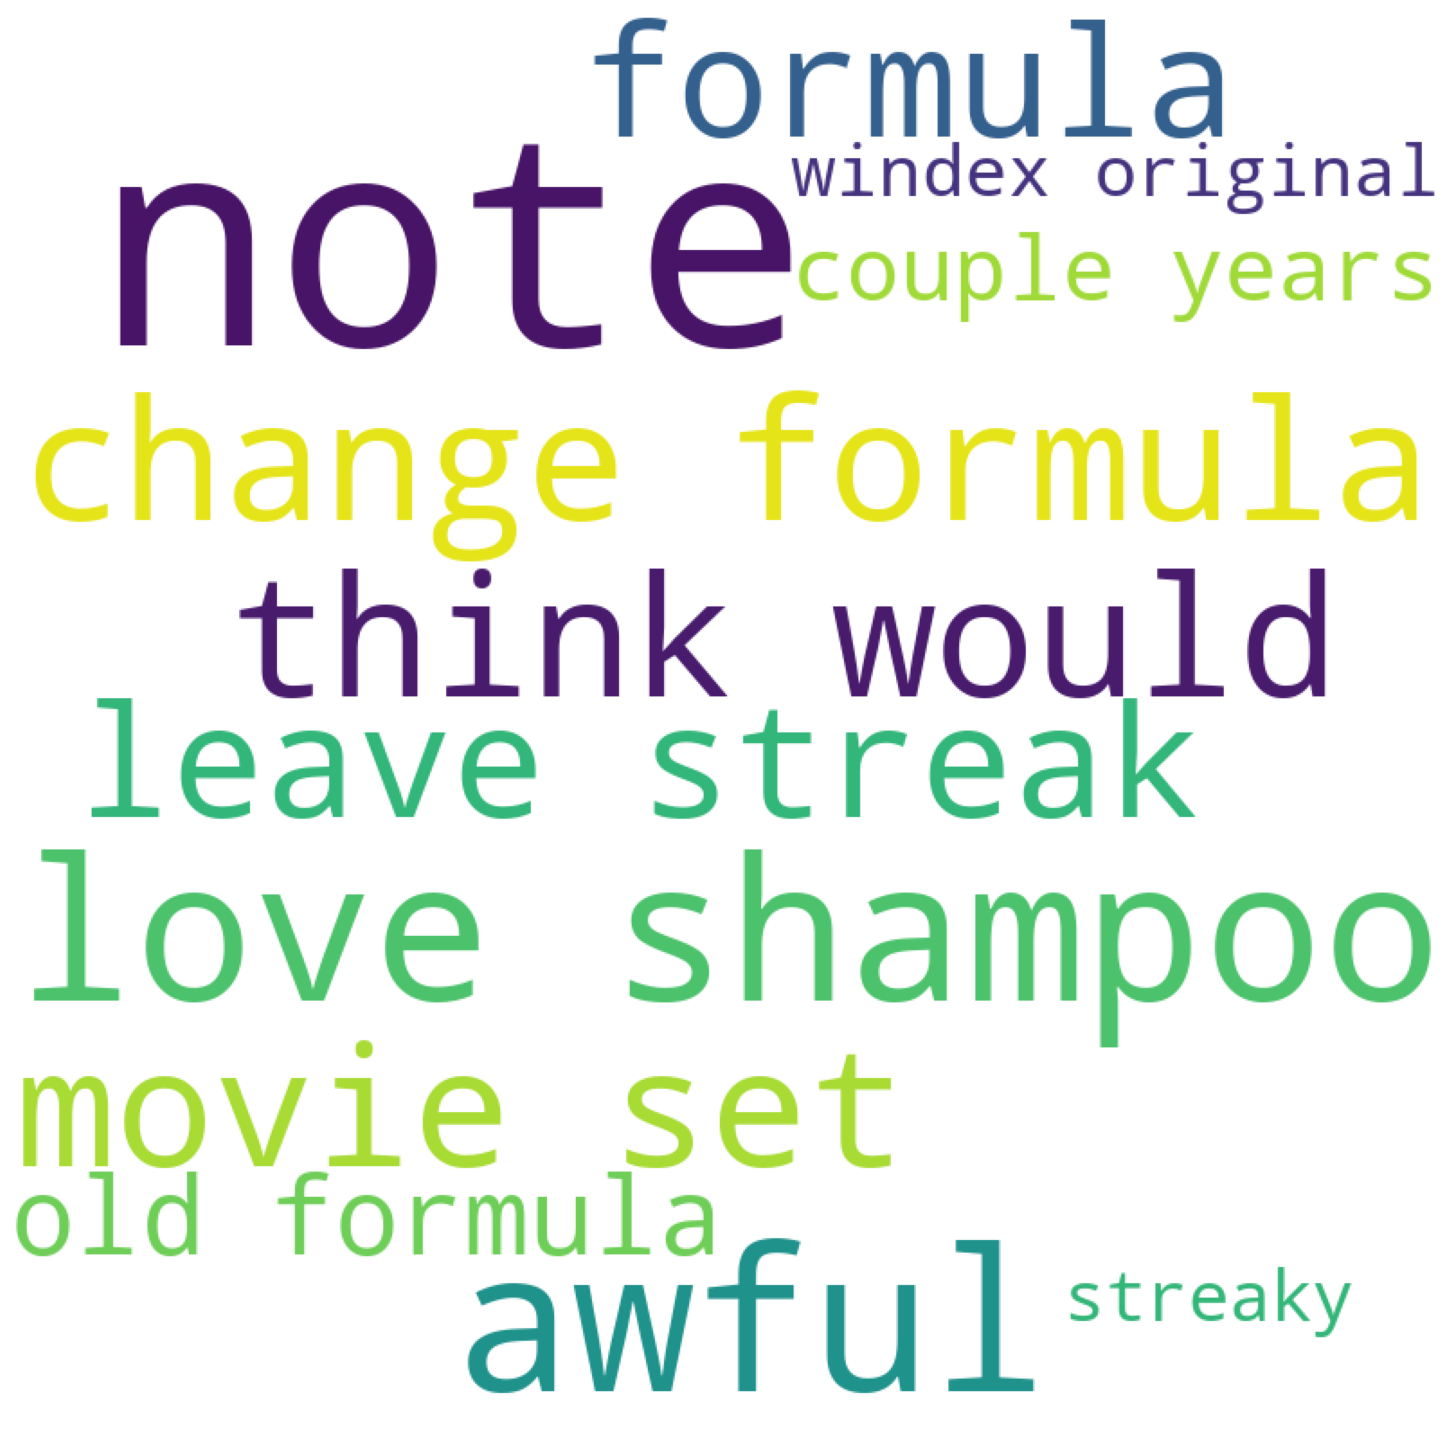

In [92]:
# Generate a word cloud image

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29415 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29415 non-null  object 
 1   brand              29415 non-null  object 
 2   categories         29415 non-null  object 
 3   manufacturer       29415 non-null  object 
 4   name               29415 non-null  object 
 5   Rating             29415 non-null  int64  
 6   reviews_username   29415 non-null  object 
 7   user_sentiment     29415 non-null  int64  
 8   review_text        29415 non-null  object 
 9   rating_class       29415 non-null  object 
 10  clean_text         29415 non-null  object 
 11  year               29407 non-null  float64
 12  rating_class_num   29415 non-null  int64  
 13  token              29415 non-null  object 
 14  review_length      29415 non-null  int64  
 15  review_length_bin  29415 non-null  object 
dtypes: float64(1), int64(4

In [94]:
df4.to_csv('Reduced_Cleaned_Reviews_electronics_headphones.csv', sep=',', encoding='utf-8', index = False)



# Sentiment Analysis (TF_IDF) 


### Import necessary libraries


In [95]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load("en_core_web_sm")

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [96]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [97]:
import numpy
numpy.version.version

'1.19.2'

In [100]:
# Read the file
dff3 = pd.read_csv('Reduced_Cleaned_Reviews_electronics_headphones.csv')



In [102]:
# Sample observations
dff3.head(3)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                                 K-Y   

                                         name  Rating reviews_username  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)       5           joshua   
1  Lundberg Organic Cinnamon Toast Rice Cakes       5        dorothy w   
2            K-Y Love Sensuality Pleasure Gel       1          rebecca   

   user_sentiment                                        review_text  \
0               1  i love this album. it's very good. more to the...   
1               1  Good flavor. This review was collected as part...   
2               0  I read through the reviews on here before look...   

  rating_class                                         clean_text    year  \
0         good  love album good hip hop side current pop sound...  2012.0   
1         good     good flavor review collect part promotion good  2017.0   
2          bad  read review look buy one couple lubricants ult...  2016.0   

   rating_class_num                                              token  \
0                 1  ['love', 'album', 'good', 'hip', 'hop', 'side'...   
1                 1  ['good', 'flavor', 'review', 'collect', 'part'...   
2                 0  ['read', 'review', 'look', 'buy', 'one', 'coup...   

   review_length review_length_bin  
0             51          (0, 100]  
1             14          (0, 100]  
2            144        (100, 200]

In [175]:
dff3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   brand              10000 non-null  object 
 2   categories         10000 non-null  object 
 3   manufacturer       10000 non-null  object 
 4   name               10000 non-null  object 
 5   Rating             10000 non-null  int64  
 6   reviews_username   10000 non-null  object 
 7   user_sentiment     10000 non-null  int64  
 8   review_text        10000 non-null  object 
 9   rating_class       10000 non-null  object 
 10  clean_text         10000 non-null  object 
 11  year               10000 non-null  float64
 12  rating_class_num   10000 non-null  int64  
 13  token              10000 non-null  object 
 14  review_length      10000 non-null  int64  
 15  review_length_bin  10000 non-null  object 
dtypes: float64(1), int64(4)

In [176]:
# Drop unnecessary columns
df4 = dff3.drop(['Rating','categories','name','manufacturer','brand','rating_class_num','review_length','review_length_bin'], axis=1)



In [177]:
df4.head()

id reviews_username  user_sentiment  \
0  AV13O1A8GV-KLJ3akUyj           joshua               1   
1  AV14LG0R-jtxr-f38QfS        dorothy w               1   
2  AV16khLE-jtxr-f38VFn          rebecca               0   
3  AV16khLE-jtxr-f38VFn        walker557               0   
4  AV16khLE-jtxr-f38VFn         samantha               0   

                                         review_text rating_class  \
0  i love this album. it's very good. more to the...         good   
1  Good flavor. This review was collected as part...         good   
2  I read through the reviews on here before look...          bad   
3  My husband bought this gel for us. The gel cau...          bad   
4  My boyfriend and I bought this to spice things...          bad   

                                          clean_text         year  \
0  love album good hip hop side current pop sound... 2,012.000000   
1     good flavor review collect part promotion good 2,017.000000   
2  read review look buy one couple lubricants ult... 2,016.000000   
3  husband buy gel us gel cause irritation felt l... 2,016.000000   
4  boyfriend buy spice things bedroom highly disa... 2,016.000000   

                                               token  
0  ['love', 'album', 'good', 'hip', 'hop', 'side'...  
1  ['good', 'flavor', 'review', 'collect', 'part'...  
2  ['read', 'review', 'look', 'buy', 'one', 'coup...  
3  ['husband', 'buy', 'gel', 'us', 'gel', 'cause'...  
4  ['boyfriend', 'buy', 'spice', 'things', 'bedro...

In [178]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  object 
 1   reviews_username  10000 non-null  object 
 2   user_sentiment    10000 non-null  int64  
 3   review_text       10000 non-null  object 
 4   rating_class      10000 non-null  object 
 5   clean_text        10000 non-null  object 
 6   year              10000 non-null  float64
 7   token             10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


# Natural Language Processing

## 1. Feature Engineering and Selection

## 2. Data Preprocessing

### Separating Response Variable and Feature

In [179]:
df4

id reviews_username  user_sentiment  \
0     AV13O1A8GV-KLJ3akUyj           joshua               1   
1     AV14LG0R-jtxr-f38QfS        dorothy w               1   
2     AV16khLE-jtxr-f38VFn          rebecca               0   
3     AV16khLE-jtxr-f38VFn        walker557               0   
4     AV16khLE-jtxr-f38VFn         samantha               0   
...                    ...              ...             ...   
9995  AVpf3VOfilAPnD_xjpun           viking               1   
9996  AVpf3VOfilAPnD_xjpun           ladywi               1   
9997  AVpf3VOfilAPnD_xjpun        lilmama92               1   
9998  AVpf3VOfilAPnD_xjpun             jany               1   
9999  AVpf3VOfilAPnD_xjpun        missannie               1   

                                            review_text rating_class  \
0     i love this album. it's very good. more to the...         good   
1     Good flavor. This review was collected as part...         good   
2     I read through the reviews on here before look...          bad   
3     My husband bought this gel for us. The gel cau...          bad   
4     My boyfriend and I bought this to spice things...          bad   
...                                                 ...          ...   
9995  The spray and the wipes are great for overall ...         good   
9996  I use Clorox Disinfecting Wipes for my car. Th...         good   
9997  I love Clorox! Im confident that whatever I us...         good   
9998  Wipes make it easy to clean and toss. With the...         good   
9999  clorox wipes are amazing products. it cleans, ...         good   

                                             clean_text         year  \
0     love album good hip hop side current pop sound... 2,012.000000   
1        good flavor review collect part promotion good 2,017.000000   
2     read review look buy one couple lubricants ult... 2,016.000000   
3     husband buy gel us gel cause irritation felt l... 2,016.000000   
4     boyfriend buy spice things bedroom highly disa... 2,016.000000   
...                                                 ...          ...   
9995  spray wipe great overall disinfect deodorize a... 2,014.000000   
9996  use clorox disinfect wipe car wipe work best c... 2,014.000000   
9997  love clorox im confident whatever use clorox l... 2,014.000000   
9998  wipe make easy clean toss name like clorox gua... 2,015.000000   
9999  clorox wipe amaze products clean disinfect get... 2,014.000000   

                                                  token  
0     ['love', 'album', 'good', 'hip', 'hop', 'side'...  
1     ['good', 'flavor', 'review', 'collect', 'part'...  
2     ['read', 'review', 'look', 'buy', 'one', 'coup...  
3     ['husband', 'buy', 'gel', 'us', 'gel', 'cause'...  
4     ['boyfriend', 'buy', 'spice', 'things', 'bedro...  
...                                                 ...  
9995  ['spray', 'wipe', 'great', 'overall', 'disinfe...  
9996  ['use', 'clorox', 'disinfect', 'wipe', 'car', ...  
9997  ['love', 'clorox', 'im', 'confident', 'whateve...  
9998  ['wipe', 'make', 'easy', 'clean', 'toss', 'nam...  
9999  ['clorox', 'wipe', 'amaze', 'products', 'clean...  

[10000 rows x 8 columns]

In [180]:
df4['rating_class'] = df4['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [182]:
# Splitting the Data Set into Train and Test Sets
X = df4['clean_text']
y = df4['user_sentiment']

### Splitting Dataset into Train and Test Set

We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data.

In [185]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [186]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(7500,)
Test Set Shape		:(2500,)


## 3. Selecting the Right Evaluation Metric


Since the data is imbalanced, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall. For our particular case, based on this thought I will use f1 score which is harmonic average of precision and recall as my evaluation metric.

### Confusion Matrix Plot Function

Understanding the types of errors our model makes, and least desirable are important . A good way to visualize that information is using a Confusion Matrix, which compares the predictions our model makes with the true label. With that in mind, we used confusion matrix besides our evaluation metric (f1 score).

In [187]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [188]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

## 4. Modelling

This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who bought headphones products in Amazon e-commerce online platform. We used Python’s Scikit Learn libraries to solve the problem. In this context, we implemented Logistic Regression, Random Forest, Naive Bayes, XGBOOST, and Catboost algorithms. Besides that, I implemented deep learning technique with Keras.

Since the ratings of the reviews were not distributed normally, I decided to decrease rating classes from 5 to 2 by merging Rating 1-2 as ‘Bad’ and Rating 3-4-5 as 'Good'.

For feature selection, I applied threshold for word occurence with using min_df/max_df, PCA and Singular Value Decomposition.

For feature engineering, I applied CountVectorizer, TF-IDF, Hashing Vectorizer and Word2Vec to the text data in order to turn a collection of text documents into numerical feature vectors.

## 4.1 CountVectorizer Bag of Words

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class.

In [189]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [190]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 7015


In [191]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [192]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

aaaaaaaaaaaaaaaaa  abc  abd  ability  able  abortion  absences  absolute  \
0                  0    0    0        0     0         0         0         0   
1                  0    0    0        0     0         0         0         0   
2                  0    0    0        0     0         0         0         0   
3                  0    0    0        0     0         0         0         0   
4                  0    0    0        0     0         0         0         0   

   absolutely  absolutly  ...  zero  zesty  zinc  zing  ziploc  zombie  \
0           0          0  ...     0      0     0     0       0       0   
1           0          0  ...     0      0     0     0       0       0   
2           0          0  ...     0      0     0     0       0       0   
3           0          0  ...     0      0     0     0       0       0   
4           0          0  ...     0      0     0     0       0       0   

   zombieaction  zombiemutantundead  zombies  zone  
0             0                   0        0     0  
1             0                   0        0     0  
2             0                   0        0     0  
3             0                   0        0     0  
4             0                   0        0     0  

[5 rows x 7015 columns]

### Creating a function for applying different algorithms

In [193]:
import pickle

In [194]:

def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

### Dummy Classifier

In [195]:
clf = DummyClassifier(strategy ='stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.790269245086361


In [196]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.11      0.11       295
           1       0.88      0.88      0.88      2205

    accuracy                           0.79      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.79      0.79      0.79      2500



### 4.1.1 Logistic Regression with CountVectorizer

In [197]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8672277514821936


In [199]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.43      0.83      0.56       295
           1       0.97      0.85      0.91      2205

    accuracy                           0.85      2500
   macro avg       0.70      0.84      0.74      2500
weighted avg       0.91      0.85      0.87      2500



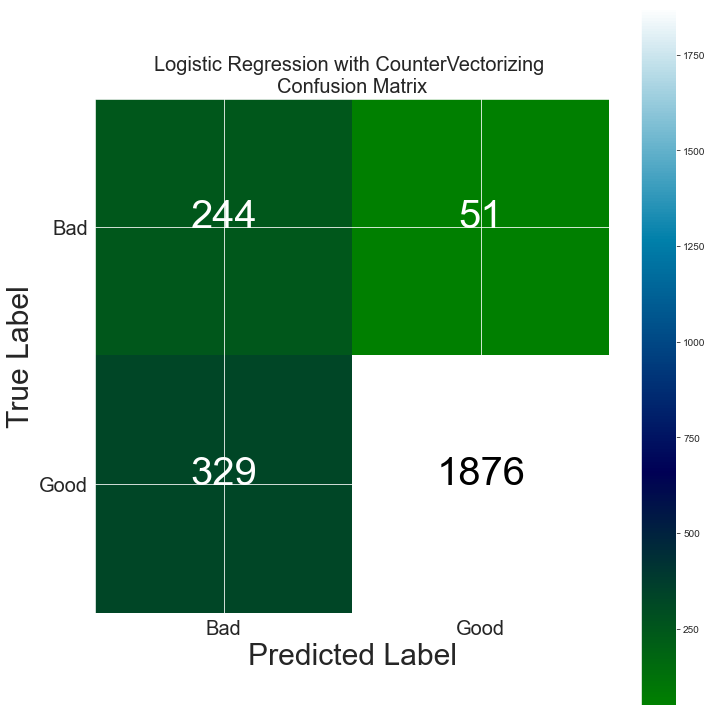

In [200]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 4.1.2 Random Forest with CountVectorizer¶

In [201]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8472510497742325


#### Classification Report

In [202]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.74      0.08      0.15       295
           1       0.89      1.00      0.94      2205

    accuracy                           0.89      2500
   macro avg       0.81      0.54      0.55      2500
weighted avg       0.87      0.89      0.85      2500



#### Confusion Matrix

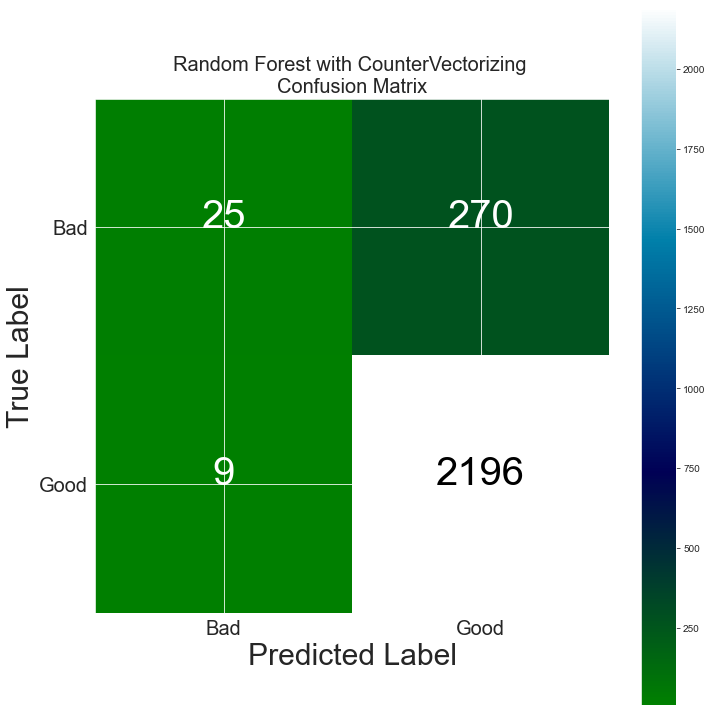

In [203]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 4.1.3 Naive Bayes with CountVectorizer

In [204]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.8581813116461005


#### Classification Report

In [205]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.56      0.17      0.26       295
           1       0.90      0.98      0.94      2205

    accuracy                           0.89      2500
   macro avg       0.73      0.58      0.60      2500
weighted avg       0.86      0.89      0.86      2500



#### Confusion Matrix

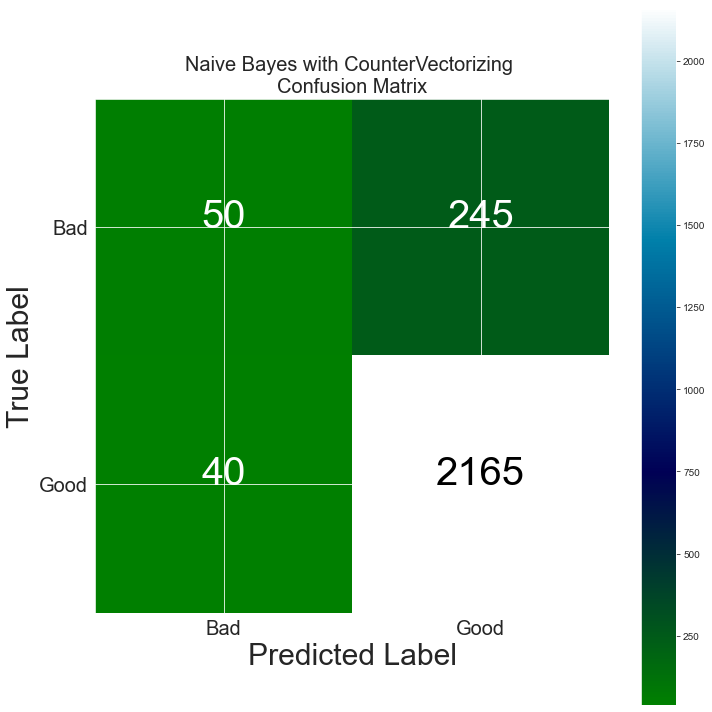

In [206]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

### 4.1.4 XGBoost with CountVectorizer

In [207]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

[15:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.8919649902804616


#### Classification Report

In [208]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.68      0.37      0.48       295
           1       0.92      0.98      0.95      2205

    accuracy                           0.90      2500
   macro avg       0.80      0.67      0.71      2500
weighted avg       0.89      0.90      0.89      2500



#### Confusion Matrix

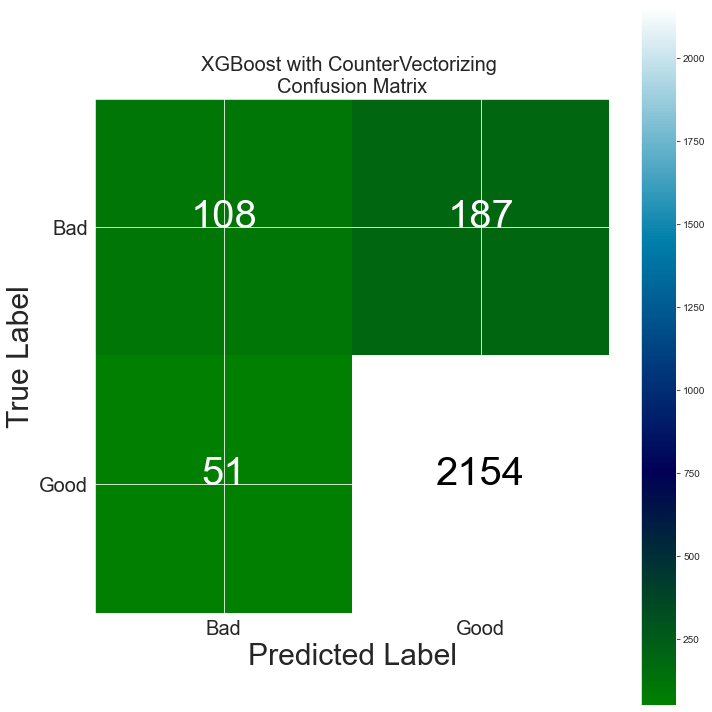

In [209]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 4.1.5 CatBoost with CountVectorizer


In [210]:
import numpy
numpy.version.version

'1.19.2'

In [211]:
from catboost import CatBoostClassifier, Pool

In [212]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.3687575	total: 28.4ms	remaining: 2.81s
1:	learn: 0.3359181	total: 43.8ms	remaining: 2.15s
2:	learn: 0.3243748	total: 59.3ms	remaining: 1.92s
3:	learn: 0.3107028	total: 74.7ms	remaining: 1.79s
4:	learn: 0.3033906	total: 91.2ms	remaining: 1.73s
5:	learn: 0.2991476	total: 106ms	remaining: 1.67s
6:	learn: 0.2958074	total: 122ms	remaining: 1.62s
7:	learn: 0.2930406	total: 137ms	remaining: 1.58s
8:	learn: 0.2869407	total: 153ms	remaining: 1.54s
9:	learn: 0.2833618	total: 168ms	remaining: 1.51s
10:	learn: 0.2788858	total: 184ms	remaining: 1.49s
11:	learn: 0.2760346	total: 199ms	remaining: 1.46s
12:	learn: 0.2723805	total: 215ms	remaining: 1.44s
13:	learn: 0.2706324	total: 230ms	remaining: 1.41s
14:	learn: 0.2695381	total: 245ms	remaining: 1.39s
15:	learn: 0.2660020	total: 260ms	remaining: 1.37s
16:	learn: 0.2640552	total: 276ms	remaining: 1.35s
17:	learn: 0.2609741	total: 291ms	remaining: 1.33s
18:	learn: 0.2599015	total: 307ms	remaining: 1.31s
19:	learn: 0.2555442	total: 323ms	re

#### Classification Report

In [213]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.60      0.21      0.31       295
           1       0.90      0.98      0.94      2205

    accuracy                           0.89      2500
   macro avg       0.75      0.60      0.63      2500
weighted avg       0.87      0.89      0.87      2500



#### Confusion Matrix

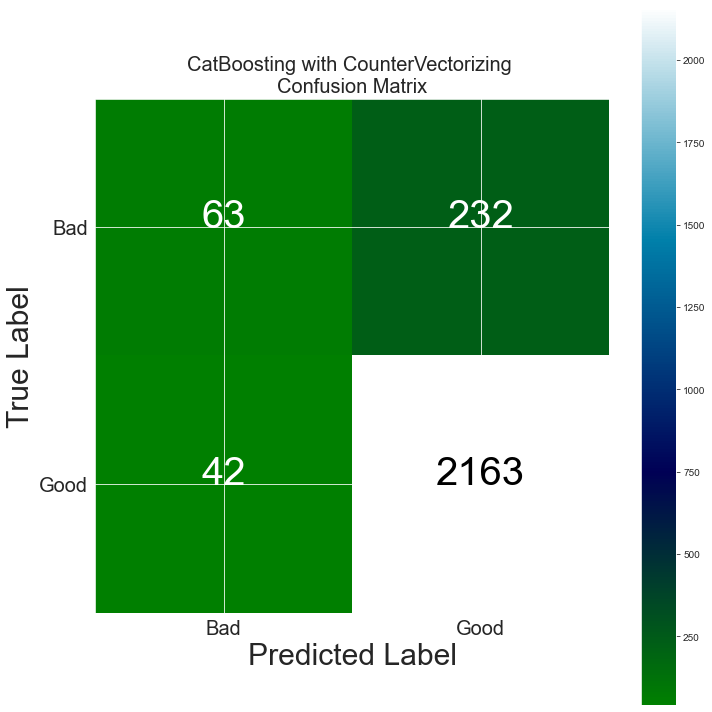

In [214]:
# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

### 4.1.6 Comparison of Models with CountVectorizer

In [215]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [216]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Function for f1 Score Plotting

In [217]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Algorithms Comparison with CountVectorizer

In [218]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [219]:
df_tv2

precision   recall  f1-score  \
vectorizer model         accuracy class                                   
CountVect  LogReg        0.848000 bad       0.425829 0.827119  0.562212   
                                  good      0.973534 0.850794  0.908035   
                                  average   0.908905 0.848000  0.867228   
           Random Forest 0.888400 bad       0.735294 0.084746  0.151976   
                                  good      0.890511 0.995918  0.940270   
                                  average   0.872195 0.888400  0.847251   
           Naive Bayes   0.886000 bad       0.555556 0.169492  0.259740   
                                  good      0.898340 0.981859  0.938245   
                                  average   0.857892 0.886000  0.858181   
           XGBoost       0.904800 bad       0.679245 0.366102  0.475771   
                                  good      0.920120 0.976871  0.947646   
                                  average   0.891696 0.904800  0.891965   
           CatBoost      0.890400 bad       0.600000 0.213559  0.315000   
                                  good      0.903132 0.980952  0.940435   
                                  average   0.867362 0.890400  0.866633   

                                               support  
vectorizer model         accuracy class                 
CountVect  LogReg        0.848000 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           Random Forest 0.888400 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           Naive Bayes   0.886000 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           XGBoost       0.904800 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           CatBoost      0.890400 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000

### Average f1 Score - Models with CountVectorizer


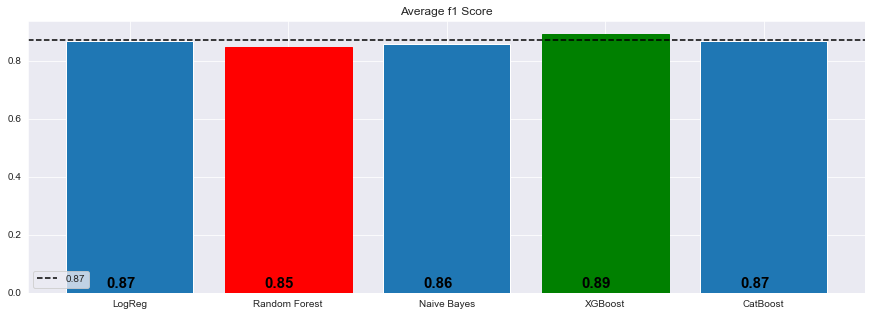

In [220]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

## 4.2 TF-IDF

In [221]:
import pickle

In [222]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)

pickle.dump(tfidf_vect, open('tranform.pkl', 'wb'))


tfidf_vect_train = tfidf_vect_train.toarray()

tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

In [223]:
vocab2 = tfidf_vect.get_feature_names()

In [224]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(tfidf_vect_train, columns = vocab2).head()

aaaaaaaaaaaaaaaaa      abc      abd  ability     able  abortion  absences  \
0           0.000000 0.000000 0.000000 0.000000 0.000000  0.000000  0.000000   
1           0.000000 0.000000 0.000000 0.000000 0.000000  0.000000  0.000000   
2           0.000000 0.000000 0.000000 0.000000 0.000000  0.000000  0.000000   
3           0.000000 0.000000 0.000000 0.000000 0.000000  0.000000  0.000000   
4           0.000000 0.000000 0.000000 0.000000 0.000000  0.000000  0.000000   

   absolute  absolutely  absolutly  ...     zero    zesty     zinc     zing  \
0  0.000000    0.000000   0.000000  ... 0.000000 0.000000 0.000000 0.000000   
1  0.000000    0.000000   0.000000  ... 0.000000 0.000000 0.000000 0.000000   
2  0.000000    0.000000   0.000000  ... 0.000000 0.000000 0.000000 0.000000   
3  0.000000    0.000000   0.000000  ... 0.000000 0.000000 0.000000 0.000000   
4  0.000000    0.000000   0.000000  ... 0.000000 0.000000 0.000000 0.000000   

    ziploc   zombie  zombieaction  zombiemutantundead  zombies     zone  
0 0.000000 0.000000      0.000000            0.000000 0.000000 0.000000  
1 0.000000 0.000000      0.000000            0.000000 0.000000 0.000000  
2 0.000000 0.000000      0.000000            0.000000 0.000000 0.000000  
3 0.000000 0.000000      0.000000            0.000000 0.000000 0.000000  
4 0.000000 0.000000      0.000000            0.000000 0.000000 0.000000  

[5 rows x 7015 columns]

### 4.2.1 Logistic Regression with TF-IDF

In [225]:

# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8260863345089663


#### Classification Report

In [226]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.34      0.80      0.48       295
           1       0.97      0.80      0.87      2205

    accuracy                           0.80      2500
   macro avg       0.65      0.80      0.68      2500
weighted avg       0.89      0.80      0.83      2500



#### Confusion Matrix

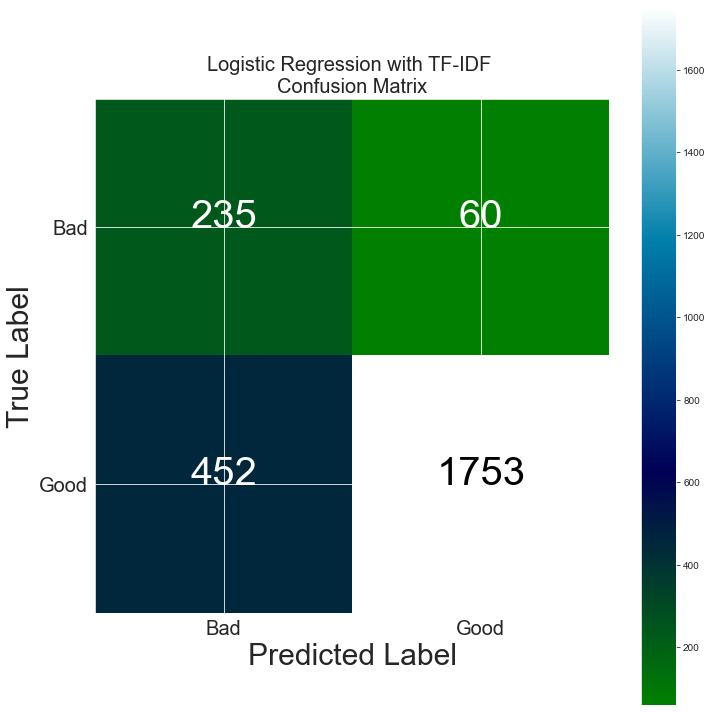

In [227]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

### 4.2.2 Random Forest with TF-IDF

In [228]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8411161386173195


#### Classification Report

In [229]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.74      0.06      0.11       295
           1       0.89      1.00      0.94      2205

    accuracy                           0.89      2500
   macro avg       0.81      0.53      0.52      2500
weighted avg       0.87      0.89      0.84      2500



#### Confusion Matrix

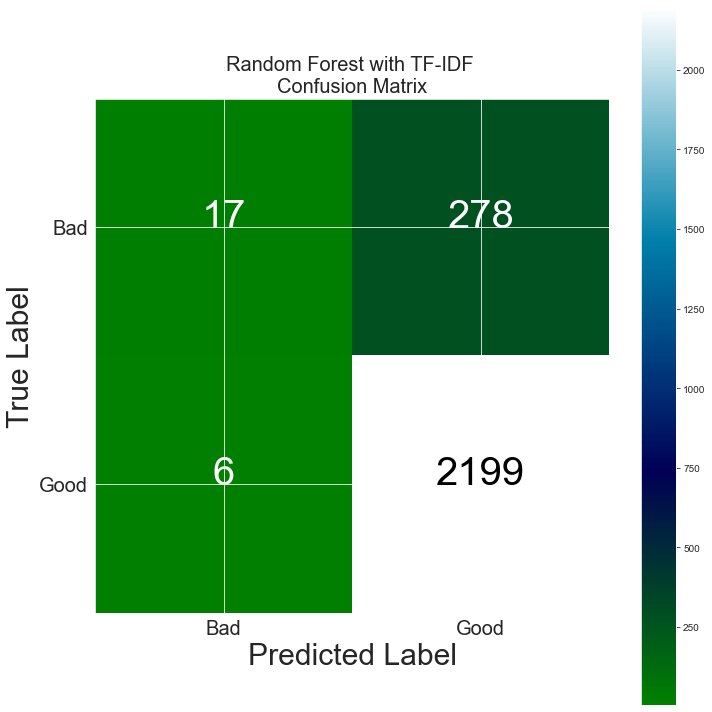

In [230]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

### 4.2.3 Naive Bayes with TF-IDF

In [231]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.8266992561105208


#### Classification Report

In [232]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.88      1.00      0.94      2205

    accuracy                           0.88      2500
   macro avg       0.44      0.50      0.47      2500
weighted avg       0.78      0.88      0.83      2500



#### Confusion Matrix

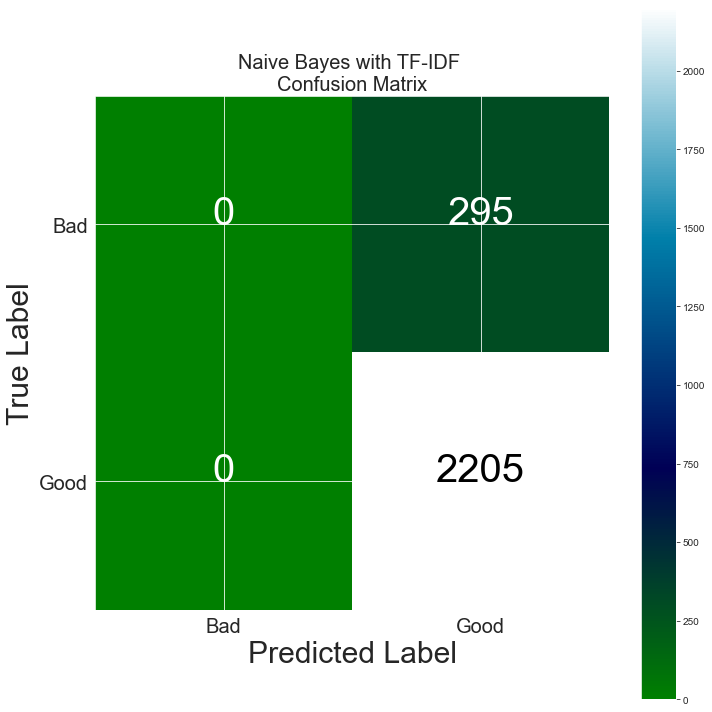

In [233]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

### 4.2.4 XGBoost with TF-IDF

In [234]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

[15:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.8811976436438146


#### Classification Report

In [235]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.63      0.31      0.42       295
           1       0.91      0.98      0.94      2205

    accuracy                           0.90      2500
   macro avg       0.77      0.64      0.68      2500
weighted avg       0.88      0.90      0.88      2500



#### Confusion Matrixm

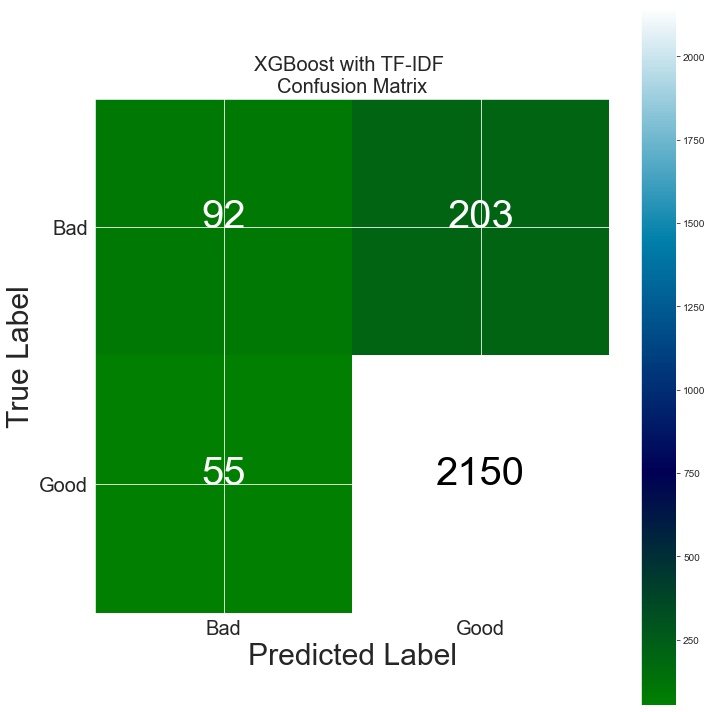

In [236]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

### 4.2.5 Catboost with TF-IDF

In [237]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.3678010	total: 20.6ms	remaining: 2.04s
1:	learn: 0.3416839	total: 38.8ms	remaining: 1.9s
2:	learn: 0.3247456	total: 56.9ms	remaining: 1.84s
3:	learn: 0.3174033	total: 75.4ms	remaining: 1.81s
4:	learn: 0.3139424	total: 94ms	remaining: 1.79s
5:	learn: 0.3078057	total: 112ms	remaining: 1.76s
6:	learn: 0.2994541	total: 132ms	remaining: 1.75s
7:	learn: 0.2970639	total: 150ms	remaining: 1.73s
8:	learn: 0.2937487	total: 169ms	remaining: 1.7s
9:	learn: 0.2914852	total: 187ms	remaining: 1.68s
10:	learn: 0.2891041	total: 205ms	remaining: 1.66s
11:	learn: 0.2870441	total: 225ms	remaining: 1.65s
12:	learn: 0.2824551	total: 243ms	remaining: 1.63s
13:	learn: 0.2770469	total: 262ms	remaining: 1.61s
14:	learn: 0.2737200	total: 282ms	remaining: 1.6s
15:	learn: 0.2726342	total: 301ms	remaining: 1.58s
16:	learn: 0.2685492	total: 319ms	remaining: 1.56s
17:	learn: 0.2673031	total: 337ms	remaining: 1.54s
18:	learn: 0.2625561	total: 357ms	remaining: 1.52s
19:	learn: 0.2608459	total: 375ms	remaini

#### Classification Report

In [238]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.57      0.25      0.35       295
           1       0.91      0.97      0.94      2205

    accuracy                           0.89      2500
   macro avg       0.74      0.61      0.65      2500
weighted avg       0.87      0.89      0.87      2500



#### Confusion Matrix

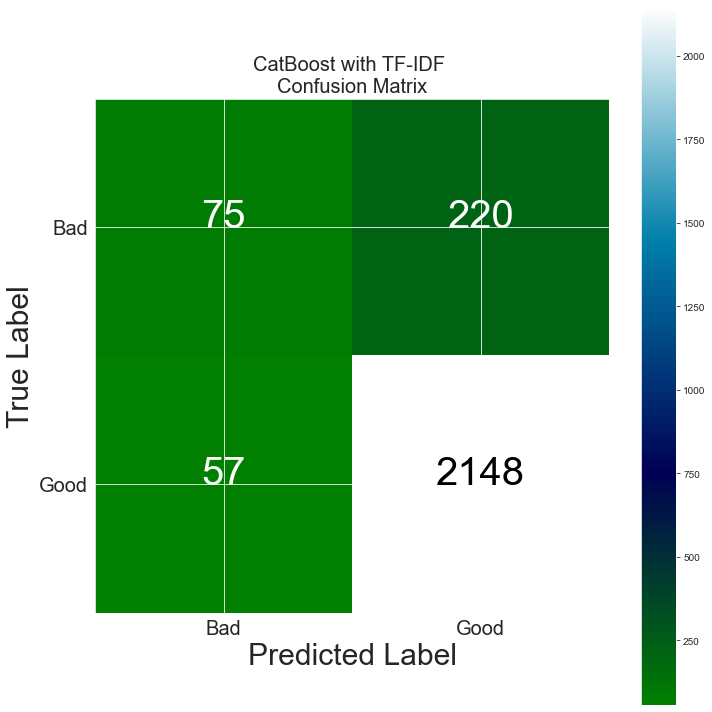

In [239]:
# Print confusion matrix for CatBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

### 4.2.6 Comparision of Models with TF-IDF Vectorizer

In [240]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

#### Comparison Table - TF-IDF Vectorizing

In [241]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision   recall  f1-score  \
vectorizer model         accuracy class                                   
CountVect  LogReg        0.795200 bad       0.342067 0.796610  0.478615   
                                  good      0.966906 0.795011  0.872573   
                                  average   0.893175 0.795200  0.826086   
           Random Forest 0.886400 bad       0.739130 0.057627  0.106918   
                                  good      0.887767 0.997279  0.939342   
                                  average   0.870228 0.886400  0.841116   
           Naive Bayes   0.882000 bad       0.000000 0.000000  0.000000   
                                  good      0.882000 1.000000  0.937301   
                                  average   0.777924 0.882000  0.826699   
           XGBoost       0.896800 bad       0.625850 0.311864  0.416290   
                                  good      0.913727 0.975057  0.943396   
                                  average   0.879758 0.896800  0.881198   
           CatBoost      0.889200 bad       0.568182 0.254237  0.351288   
                                  good      0.907095 0.974150  0.939427   
                                  average   0.867103 0.889200  0.870027   

                                               support  
vectorizer model         accuracy class                 
CountVect  LogReg        0.795200 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           Random Forest 0.886400 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           Naive Bayes   0.882000 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           XGBoost       0.896800 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000  
           CatBoost      0.889200 bad       295.000000  
                                  good    2,205.000000  
                                  average 2,500.000000

#### Average f1 score - Models with TF-IDF Vectorizer

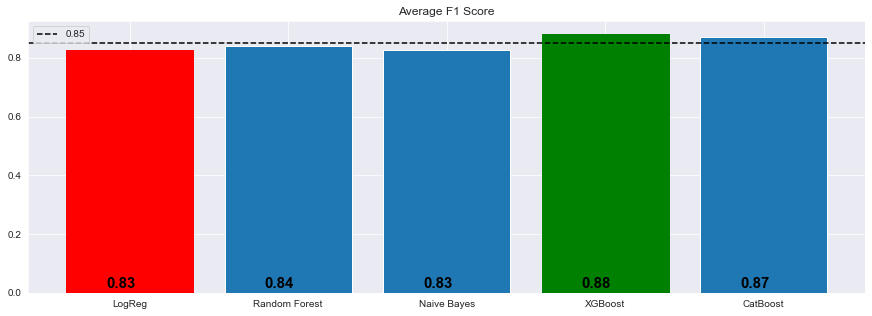

In [242]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

# Recommendation System
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

In [243]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import seaborn as sns
#from sklearn.externals import joblib
import joblib as jb
from sklearn.model_selection import train_test_split
import gzip
from scipy.sparse.linalg import svds

In [168]:
pd.options.display.float_format = "{:,.6f}".format

In [298]:
# Reading ratings file from GitHub. # MovieLens
ratings = pd.read_csv('clean_reviews.csv', sep=',')
ratings.head(5)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV16khLE-jtxr-f38VFn              K-Y   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                                 K-Y   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-04-20T00:00:00.000Z   

   Rating reviews_username  user_sentiment  \
0       5           joshua               1   
1       5        dorothy w               1   
2       1          rebecca               0   
3       1        walker557               0   
4       1         samantha               0   

                                         review_text rating_class  \
0  i love this album. it's very good. more to the...         good   
1  Good flavor. This review was collected as part...         good   
2  I read through the reviews on here before look...          bad   
3  My husband bought this gel for us. The gel cau...          bad   
4  My boyfriend and I bought this to spice things...          bad   

                                          clean_text  
0  love album good hip hop side current pop sound...  
1     good flavor review collect part promotion good  
2  read review look buy one couple lubricants ult...  
3  husband buy gel us gel cause irritation felt l...  
4  boyfriend buy spice things bedroom highly disa...

In [299]:
selected_columns = ratings[['id','reviews_username','Rating']]

In [300]:

#No of unique customers and products
print("Unique Customers: ",ratings.reviews_username.nunique())
print("Unique Products: ",ratings.id.nunique())

Unique Customers:  24632
Unique Products:  249


In [301]:
data_flt_prod=ratings.id.value_counts()

In [302]:
#Mean of Rating
print("Mean of Rating:",np.mean(ratings.Rating))
#Median of Rating
print("Median of Rating:",np.median(ratings.Rating))

Mean of Rating: 4.485330613632501
Median of Rating: 5.0


In [303]:
ratings_new=ratings[ratings['id'].isin(data_flt_prod[data_flt_prod>=1].index)]

In [304]:
ratings_new = selected_columns.copy()

In [305]:
ratings_new.groupby('id').size().sort_values(ascending=False)

id
AVpf3VOfilAPnD_xjpun    8516
AVpfPaoqLJeJML435Xk9    3297
AVpfJP1C1cnluZ0-e3Xy    2032
AVpfW8y_LJeJML437ySW    1185
AVpfRTh1ilAPnD_xYic2    1130
                        ... 
AVpe4-GPLJeJML43xmuY       1
AVpfOrD0ilAPnD_xXrRj       1
AVpe-YAL1cnluZ0-bHGh       1
AVpe-MCY1cnluZ0-bCv_       1
AV13O1A8GV-KLJ3akUyj       1
Length: 249, dtype: int64

In [306]:
ratings_new.head()

id reviews_username  Rating
0  AV13O1A8GV-KLJ3akUyj           joshua       5
1  AV14LG0R-jtxr-f38QfS        dorothy w       5
2  AV16khLE-jtxr-f38VFn          rebecca       1
3  AV16khLE-jtxr-f38VFn        walker557       1
4  AV16khLE-jtxr-f38VFn         samantha       1

In [307]:
len(ratings_new)

29415

In [308]:
ratings_new.to_csv('ratings_new.csv', sep=',', encoding='utf-8', index = False)

In [173]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings_new, test_size=0.30, random_state=31)

In [18]:
print(train.shape)
print(test.shape)

(20590, 3)
(8825, 3)


In [272]:
#Filling products which are not rated zero and taking pivot to categorize each user with product they rated
final_ratings_matrix = pd.pivot_table(ratings_new,index='reviews_username',columns='id',values = 'Rating').fillna(0)

In [20]:
# Pivot the train ratings' dataset into matrix format in which columns are movies and the rows are user IDs.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='Rating'
).fillna(0)

df_pivot

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   
0325home                      0.000000              0.000000   
...                                ...                   ...   
zxcsdfd                       0.000000              0.000000   
zxjki                         0.000000              0.000000   
zyiah4                        0.000000              0.000000   
zzdiane                       0.000000              0.000000   
zzz1127                       0.000000              0.000000   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   
0325home                      0.000000              0.000000   
...                                ...                   ...   
zxcsdfd                       0.000000              0.000000   
zxjki                         0.000000              0.000000   
zyiah4                        0.000000              0.000000   
zzdiane                       0.000000              0.000000   
zzz1127                       0.000000              0.000000   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   
0325home                      0.000000              0.000000   
...                                ...                   ...   
zxcsdfd                       0.000000              0.000000   
zxjki                         0.000000              0.000000   
zyiah4                        0.000000              0.000000   
zzdiane                       0.000000              0.000000   
zzz1127                       0.000000              0.000000   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   
0325home                      0.000000              0.000000   
...                                ...                   ...   
zxcsdfd                       0.000000              0.000000   
zxjki                         0.000000              0.000000   
zyiah4                        0.000000              0.000000   
zzdiane                       0.000000              0.000000   
zzz1127                       0.000000              0.000000   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                        0.000000              0.000000  ...   
00sab00                       0.000000              0.000000  ...   
02dakota                      0.000000              0.000000  ...   
02deuce                       0.000000              0.000000  ...   
0325home                      0.000000              0.000000  ...   
...                                ...                   ...  ...   
zxcsdfd                       0.000000              0.000000  ...   
zxjki                         0.000000         

In [264]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train.groupby('id').agg({'reviews_username':'count','Rating':'mean'}).reset_index()
train_data_grouped.rename(columns={'reviews_username':'count','Rating':'mean'},inplace=True)
train_data_grouped.head()

id  count     mean
0  AV14LG0R-jtxr-f38QfS      1 5.000000
1  AV16khLE-jtxr-f38VFn     20 2.550000
2  AV1YGDqsGV-KLJ3adc-O    237 4.092827
3  AV1YIch7GV-KLJ3addeG      1 5.000000
4  AV1YlENIglJLPUi8IHsX     10 4.200000

In [265]:
train_data_sort = train_data_grouped.sort_values(['count'], ascending = 0) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['count'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

id  count     mean     Rank
80   AVpf3VOfilAPnD_xjpun   5925 4.823460 1.000000
161  AVpfPaoqLJeJML435Xk9   2352 4.353316 2.000000
141  AVpfJP1C1cnluZ0-e3Xy   1442 4.839806 3.000000
184  AVpfW8y_LJeJML437ySW    838 4.011933 4.000000
170  AVpfRTh1ilAPnD_xYic2    779 4.681643 5.000000

In [266]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['reviews_username'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [267]:
find_recom = [1267,385,40]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: ", i)
    print("The products are most sold along with there mean rating:\n")
    print(recommend(i))    
    print("\n")

Here is the recommendation for the userId:  1267
The products are most sold along with there mean rating:

     reviews_username                    id  count     mean     Rank
80               1267  AVpf3VOfilAPnD_xjpun   5925 4.823460 1.000000
161              1267  AVpfPaoqLJeJML435Xk9   2352 4.353316 2.000000
141              1267  AVpfJP1C1cnluZ0-e3Xy   1442 4.839806 3.000000
184              1267  AVpfW8y_LJeJML437ySW    838 4.011933 4.000000
170              1267  AVpfRTh1ilAPnD_xYic2    779 4.681643 5.000000


Here is the recommendation for the userId:  385
The products are most sold along with there mean rating:

     reviews_username                    id  count     mean     Rank
80                385  AVpf3VOfilAPnD_xjpun   5925 4.823460 1.000000
161               385  AVpfPaoqLJeJML435Xk9   2352 4.353316 2.000000
141               385  AVpfJP1C1cnluZ0-e3Xy   1442 4.839806 3.000000
184               385  AVpfW8y_LJeJML437ySW    838 4.011933 4.000000
170               385  AVp

## Collaborative Filtering using SVD¶


In [269]:
train_final_ratings_matrix = pd.pivot_table(train,index='reviews_username',columns='id',values = 'Rating').fillna(0)
test_final_ratings_matrix = pd.pivot_table(test,index='reviews_username',columns='id',values = 'Rating').fillna(0)

In [273]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix['user_index'] = np.arange(0, train_final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix.head(10)

id                         AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                                        
00dog3                                 0.000000              0.000000   
00sab00                                0.000000              0.000000   
02dakota                               0.000000              0.000000   
02deuce                                0.000000              0.000000   
0325home                               0.000000              0.000000   
06stidriver                            0.000000              0.000000   
09mommy11                              0.000000              0.000000   
1085                                   0.000000              0.000000   
10ten                                  0.000000              0.000000   
11111111aaaaaaaaaaaaaaaaa              0.000000              0.000000   

id                         AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                                        
00dog3                                 0.000000              0.000000   
00sab00                                0.000000              0.000000   
02dakota                               0.000000              0.000000   
02deuce                                0.000000              0.000000   
0325home                               0.000000              0.000000   
06stidriver                            0.000000              0.000000   
09mommy11                              0.000000              0.000000   
1085                                   0.000000              0.000000   
10ten                                  0.000000              0.000000   
11111111aaaaaaaaaaaaaaaaa              0.000000              0.000000   

id                         AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                                        
00dog3                                 0.000000              0.000000   
00sab00                                0.000000              0.000000   
02dakota                               0.000000              0.000000   
02deuce                                0.000000              0.000000   
0325home                               0.000000              0.000000   
06stidriver                            0.000000              0.000000   
09mommy11                              0.000000              0.000000   
1085                                   0.000000              0.000000   
10ten                                  0.000000              0.000000   
11111111aaaaaaaaaaaaaaaaa              0.000000              0.000000   

id                         AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                                        
00dog3                                 0.000000              0.000000   
00sab00                                0.000000              0.000000   
02dakota                               0.000000              0.000000   
02deuce                                0.000000              0.000000   
0325home                               0.000000              0.000000   
06stidriver                            0.000000              0.000000   
09mommy11                              0.000000              0.000000   
1085                                   0.000000              0.000000   
10ten                                  1.000000              0.000000   
11111111aaaaaaaaaaaaaaaaa              0.000000              0.000000   

id                         AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                                       ...   
00dog3                                 0.000000              0.000000  ...   
00sab00                                0.000000              0.000000  ...   
02dakota                               0.000000              0.000000  ...   
02deuce                                0.000000              0.000000  ...   
0325home                

In [274]:
#Test Data
test_final_ratings_matrix['user_index'] = np.arange(0, test_final_ratings_matrix.shape[0], 1)
test_final_ratings_matrix.head()

id                AV13O1A8GV-KLJ3akUyj  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0.000000   
1143mom                       0.000000              0.000000   

id                AV1YGDqsGV-KLJ3adc-O  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0.000000   
1143mom                       3.000000              0.000000   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0.000000   
1143mom                       0.000000              0.000000   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0.000000   
1143mom                       0.000000              0.000000   

id                AV1Ynb3bglJLPUi8IJxJ  AV1YneDPglJLPUi8IJyQ  ...  \
reviews_username                                              ...   
00sab00                       0.000000              0.000000  ...   
01impala                      0.000000              0.000000  ...   
08dallas                      0.000000              0.000000  ...   
1.11E+24                      0.000000              0.000000  ...   
1143mom                       0.000000              0.000000  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0.000000   
1143mom                       0.000000              0.000000   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0.000000   
1143mom                       0.000000              0.000000   

id                AVpfrgjFLJeJML43BvCc  AVpfsQoeilAPnD_xgfx5  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0.000000   
1143mom                       0.000000              0.000000   

id                AVpfshNsLJeJML43CB8q  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
08dallas                      0.000000              0.000000   
1.11E+24                      0.000000              0

In [292]:
#Complete data
final_ratings_matrix.set_index(['user_index'], inplace=True)

#Train data
train_final_ratings_matrix.set_index(['user_index'], inplace=True)
train_final_ratings_matrix.head()

#Test Data
test_final_ratings_matrix.set_index(['user_index'], inplace=True)
test_final_ratings_matrix.head()

KeyError: "None of ['user_index'] are in the columns"

In [276]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(train_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [277]:
train_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
train_preds_df = pd.DataFrame(train_predicted_ratings, columns = train_final_ratings_matrix.columns)
train_preds_df.head()

id  AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
0               0.000000              0.000038              0.000476   
1              -0.000000              0.000928              0.012279   
2              -0.000000              0.002597              0.014589   
3              -0.000000              0.002078              0.011671   
4              -0.000000              0.000168              0.002762   

id  AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
0              -0.000000              0.000000              0.000000   
1               0.000000             -0.000000              0.000005   
2               0.000000             -0.000000             -0.000000   
3               0.000000             -0.000000             -0.000000   
4               0.000000             -0.000000              0.000000   

id  AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
0               0.000001              0.000016              0.000048   
1              -0.000040              0.000002              0.000486   
2              -0.000018             -0.000031              0.001359   
3              -0.000015             -0.000025              0.001087   
4               0.000675              0.001909             -0.000278   

id  AV1YnUMYglJLPUi8IJpK  ...  AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
0               0.000000  ...              0.000001              0.000000   
1               0.000002  ...              0.000050             -0.000000   
2              -0.000000  ...             -0.000051             -0.000000   
3              -0.000000  ...             -0.000040             -0.000000   
4              -0.000000  ...             -0.000074             -0.000000   

id  AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc  \
0               0.000018              0.000046              0.000003   
1               0.000435              0.001212             -0.000040   
2              -0.000081             -0.000205              0.001590   
3              -0.000065             -0.000164              0.001272   
4              -0.000047             -0.000022             -0.000010   

id  AVpfs0tUilAPnD_xgqN2  AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
0               0.000071              0.000078              0.000117   
1               0.001750              0.002119              0.002950   
2               0.002007             -0.000494              0.001892   
3               0.001606             -0.000395              0.001514   
4              -0.000063              0.001707             -0.000094   

id  AVpftymALJeJML43CZ6y  AVpfv4TlilAPnD_xhjNS  
0               0.000000             -0.000003  
1              -0.000000             -0.000014  
2              -0.000000             -0.000148  
3              -0.000000             -0.000118  
4              -0.000000             -0.000015  

[5 rows x 233 columns]

In [278]:

# Recommend the items with the highest predicted ratings

def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = final_ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [279]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 3
num_recommendations = 5
recommend_items(userID, train_final_ratings_matrix, train_preds_df, num_recommendations)


Below are the recommended items for user(user_id = 3):

                      user_ratings  user_predictions
Recommended Items                                   
AVpe41TqilAPnD_xQH3d      0.000000          0.034445
AVpfD9xTLJeJML431ig2      0.000000          0.025826
AVpfR5m0LJeJML436K3W      0.000000          0.022574
AVpe31o71cnluZ0-YrSD      0.000000          0.022493
AVpf0thK1cnluZ0-r8vR      0.000000          0.021619


### Evaluation of model¶


In [280]:
# Average ACTUAL rating for each item
test_final_ratings_matrix.mean().head()

id
AV13O1A8GV-KLJ3akUyj   0.000608
AV16khLE-jtxr-f38VFn   0.001946
AV1YGDqsGV-KLJ3adc-O   0.055596
AV1YlENIglJLPUi8IHsX   0.004015
AV1YmBrdGV-KLJ3adewb   0.001825
dtype: float64

In [282]:
# Singular Value Decomposition
U_t, sigma_t, Vt_t = svds(test_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma_t = np.diag(sigma_t)

In [283]:
test_predicted_ratings = np.dot(np.dot(U_t, sigma_t), Vt_t) 

# Predicted ratings
test_preds_df = pd.DataFrame(test_predicted_ratings, columns = test_final_ratings_matrix.columns)
test_preds_df.head()

id  AV13O1A8GV-KLJ3akUyj  AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
0               0.000336              0.000010              0.007973   
1              -0.000086              0.004216              0.018197   
2               0.000177              0.000013              0.000435   
3               0.000000             -0.000007             -0.000521   
4               0.000145              0.000020              0.001916   

id  AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
0               0.000010              0.000000             -0.000007   
1               0.000002              0.000000             -0.000107   
2               0.000001              0.000000             -0.000004   
3               0.000000              0.000000              0.000005   
4               0.000002              0.000000              0.000075   

id  AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  AV1Ynb3bglJLPUi8IJxJ  \
0               0.000368              0.000229              0.000000   
1              -0.000082              0.000006              0.000000   
2               0.000191              0.000005              0.000000   
3               0.000000              0.002141              0.000000   
4               0.000159              0.000043             -0.000000   

id  AV1YneDPglJLPUi8IJyQ  ...  AVpfqW4WilAPnD_xf7a_  AVpfr5cb1cnluZ0-pZFp  \
0               0.000058  ...             -0.000000             -0.000075   
1               0.003864  ...              0.000000              0.007443   
2               0.000017  ...             -0.000000              0.000018   
3              -0.000007  ...             -0.000000             -0.000029   
4               0.000032  ...             -0.000000              0.000001   

id  AVpfrFDZLJeJML43Bmv0  AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
0               0.003138              0.000000              0.000000   
1               0.002377             -0.000000              0.000000   
2               0.000155             -0.000000              0.000000   
3              -0.000107             -0.000000              0.000000   
4               0.000679              0.000002              0.000000   

id  AVpfrgjFLJeJML43BvCc  AVpfsQoeilAPnD_xgfx5  AVpfshNsLJeJML43CB8q  \
0               0.000000              0.000000              0.000000   
1               0.000000             -0.000000             -0.000000   
2               0.000000             -0.000000             -0.000000   
3               0.000000             -0.000000             -0.000000   
4               0.000000              0.000000              0.000000   

id  AVpftikC1cnluZ0-p31V  AVpfv4TlilAPnD_xhjNS  
0              -0.000000             -0.000096  
1               0.000000             -0.000249  
2              -0.000000             -0.000008  
3              -0.000000             -0.000013  
4              -0.000000              0.000022  

[5 rows x 194 columns]

In [284]:
# Average PREDICTED rating for each item
test_preds_df.mean().head()

id
AV13O1A8GV-KLJ3akUyj   0.000511
AV16khLE-jtxr-f38VFn   0.000655
AV1YGDqsGV-KLJ3adc-O   0.008871
AV1YlENIglJLPUi8IHsX   0.000012
AV1YmBrdGV-KLJ3adewb   0.000000
dtype: float64

In [285]:
rmse_df = pd.concat([test_final_ratings_matrix.mean(), test_preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(194, 2)


Avg_actual_ratings  Avg_predicted_ratings  item_index
id                                                                         
AV13O1A8GV-KLJ3akUyj            0.000608               0.000511           0
AV16khLE-jtxr-f38VFn            0.001946               0.000655           1
AV1YGDqsGV-KLJ3adc-O            0.055596               0.008871           2
AV1YlENIglJLPUi8IHsX            0.004015               0.000012           3
AV1YmBrdGV-KLJ3adewb            0.001825               0.000000           4

In [286]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.01358 



In [288]:
 #Singular Value Decomposition
U, sigma, Vt = svds(final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [289]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(predicted_ratings, columns = final_ratings_matrix.columns)

In [291]:

# Enter 'userID' and 'num_recommendations' for the user #
userID = 1267
num_recommendations = 10
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 1267):

                      user_ratings  user_predictions
Recommended Items                                   
AVpe8gsILJeJML43y6Ed      0.000000          0.022671
AVpfM_ytilAPnD_xXIJb      0.000000          0.017090
AVpfov9TLJeJML43A7B0      0.000000          0.017056
AVpf5olc1cnluZ0-tPrO      0.000000          0.016648
AVpfOmKwLJeJML435GM7      0.000000          0.016405
AVpfBrUZilAPnD_xTUly      0.000000          0.011393
AV1YGDqsGV-KLJ3adc-O      0.000000          0.011322
AVpfPnrU1cnluZ0-g9rL      0.000000          0.010517
AVpe9W4D1cnluZ0-avf0      0.000000          0.007079
AVpf4oLxLJeJML43FcxC      0.000000          0.007027


# FINALm

In [50]:
import pickle

In [51]:
ratings_new = pd.read_csv('ratings_new.csv', sep=',', encoding='utf-8')

In [52]:
ratings_new

id reviews_username  Rating
0      AV13O1A8GV-KLJ3akUyj           joshua       5
1      AV14LG0R-jtxr-f38QfS        dorothy w       5
2      AV16khLE-jtxr-f38VFn          rebecca       1
3      AV16khLE-jtxr-f38VFn        walker557       1
4      AV16khLE-jtxr-f38VFn         samantha       1
...                     ...              ...     ...
29410  AVpfW8y_LJeJML437ySW       laurasnchz       5
29411  AVpfW8y_LJeJML437ySW    scarlepadilla       5
29412  AVpfW8y_LJeJML437ySW       liviasuexo       5
29413  AVpfW8y_LJeJML437ySW         ktreed95       5
29414  AVpfW8y_LJeJML437ySW        kcoopxoxo       5

[29415 rows x 3 columns]

In [53]:
ratings_new.drop_duplicates(['id'], keep ='last', inplace = True)

In [54]:
ratings_new

id                          reviews_username  Rating
0      AV13O1A8GV-KLJ3akUyj                                    joshua       5
1      AV14LG0R-jtxr-f38QfS                                 dorothy w       5
27     AV16khLE-jtxr-f38VFn                                    amanda       5
33     AV1d76w7vKc47QAVhCqn                                    5alarm       5
37     AV1h6gSl-jtxr-f31p40                            dfwatheartgirl       5
...                     ...                                       ...     ...
28208  AVpfUQZjilAPnD_xZfOU                                 kimmymojo       5
28210  AVpfv4TlilAPnD_xhjNS                                     brian       5
28214  AVpfVMhR1cnluZ0-ixY8                                  salgoudk       5
28229  AVpfVPh3ilAPnD_xZzW9  vicki, a normal girl who hates chemicals       5
29414  AVpfW8y_LJeJML437ySW                                 kcoopxoxo       5

[249 rows x 3 columns]

In [78]:
# Find the no of units sold of each product
# Find the unit price of each product (max of price considered, may required to be changed to median or mean)
top_sell_items_df = ratings_new.groupby('id').agg({'Rating':'max'})

# Reset the index by converting the Product into a column
top_sell_items_df.reset_index(inplace=True)


# Rank the product by most Qty sold
top_sell_items_df['Top_Sell_Rank'] = top_sell_items_df['Rating'].rank(method='min',ascending=False).astype(int)


# List the top 20 items sold
#top_sell_items_df.sort_values('Qty',ascending=False).head(20)

In [80]:

# Remove duplicate records at Product, Date and Party level
unique_order_items_df = ratings_new.drop_duplicates(['id','Rating','reviews_username'])


# Find the no of orders placed and the unique no of customers placed orders, of each product
most_popular_items_df = unique_order_items_df.groupby('id').agg({'Rating':'count', 'reviews_username':'nunique'})
most_popular_items_df.columns=['No_of_Orders','No_of_Customers']

# Reset the index by converting the Product into a column
most_popular_items_df.reset_index(inplace=True)

In [81]:

O = most_popular_items_df['No_of_Orders']
C = most_popular_items_df['No_of_Customers']
M = most_popular_items_df['No_of_Customers'].max()

most_popular_items_df['Weighted_No_of_Orders'] = O * (C / M)

In [82]:

# Rank the product by weighted no of orders
most_popular_items_df['Popularity_Rank'] = most_popular_items_df['Weighted_No_of_Orders'].rank(method='min',ascending=False).astype(int)


In [84]:
# Merge Top Selling Items Rank and Popularity Rank dataframes
product_rankings_df = pd.merge(top_sell_items_df,most_popular_items_df,how='inner',on='id')

# Get only the Product, Price and Rank columns
product_rankings_df = product_rankings_df[['id','Rating','Top_Sell_Rank','Popularity_Rank']]

# List the Product Rankings
product_rankings_df.sort_values('Popularity_Rank',ascending=True).head(20)

id  Rating  Top_Sell_Rank  Popularity_Rank
0    AV13O1A8GV-KLJ3akUyj       5              1                1
157  AVpfM_ytilAPnD_xXIJb       5              1                1
158  AVpfMpZ51cnluZ0-f_L9       5              1                1
159  AVpfN6Z71cnluZ0-gZmO       5              1                1
160  AVpfNVsj1cnluZ0-gNQN       5              1                1
161  AVpfNWbPilAPnD_xXPR7       5              1                1
162  AVpfNc9cLJeJML434tza       5              1                1
163  AVpfNfEMLJeJML434uf-       5              1                1
164  AVpfNglu1cnluZ0-gQ7x       5              1                1
165  AVpfO5u71cnluZ0-guiN       5              1                1
166  AVpfOfIqLJeJML435D06       5              1                1
167  AVpfOmKwLJeJML435GM7       5              1                1
168  AVpfOrD0ilAPnD_xXrRj       5              1                1
169  AVpfPKzxLJeJML435SYL       5              1                1
170  AVpfPPkEilAPnD_xX3cP       5              1                1
171  AVpfPaoqLJeJML435Xk9       5              1                1
172  AVpfPjqKLJeJML435aZR       5              1                1
173  AVpfPkrkilAPnD_xX-L9       5              1                1
174  AVpfPnrU1cnluZ0-g9rL       5              1                1
175  AVpfPx6V1cnluZ0-hA5y       5              1                1

In [85]:
product_rankings_df.to_csv('Product-Rankings.csv',index=False)

In [86]:
pickle.dump(product_rankings_df, open('prod_ranking_model.pkl','wb'))

In [55]:
# Items a Customer liked the most


In [56]:
# Find the no of units sold of each product by customer
top_sell_user_items_df = ratings_new.groupby(['reviews_username','id']).agg({'Rating':'sum'})

# Reset the index by converting the Party and Product into a column
top_sell_user_items_df.reset_index(inplace=True)


# Rank the product by most Qty sold, at Customer level
party_col = top_sell_user_items_df['reviews_username']
qty_col = top_sell_user_items_df['Rating'].astype(str)
top_sell_user_items_df['Top_Sell_Rank'] = (party_col + qty_col).rank(method='min',ascending=False).astype(int)


# List the top 20 items sold
#top_sell_cust_items_df.sort_values('Top_Sell_Rank',ascending=True).head(20)

In [57]:
# Items a Customer frequently Rated


In [58]:

# Remove duplicate records at Party, Product and Date level
unique_order_items_df = ratings_new.drop_duplicates(['reviews_username','id','Rating'])

In [59]:
# Find the no of orders placed and the unique no of customers placed orders, of each product
freq_items_df = unique_order_items_df.groupby(['reviews_username','id']).agg({'Rating':'count'})
freq_items_df.columns=['No_of_Orders']

In [60]:
# Reset the index by converting the Party and Product into columns
freq_items_df.reset_index(inplace=True)

In [61]:
# Products with high no of orders are considered as most frequently purchased items

# Rank the product by No of Orders, at Customer Level
party_col = freq_items_df['reviews_username']
ord_count_col = freq_items_df['No_of_Orders'].astype(str)
freq_items_df['Popularity_Rank'] = (party_col + ord_count_col).rank(method='min',ascending=False).astype(int)

In [62]:
freq_items_df.sort_values('Popularity_Rank',ascending=True).head(20)

reviews_username                    id  \
248                                     zfem2  AVpfnUcwLJeJML43Af2U   
247                                     yummy  AVpf0O60ilAPnD_xizE6   
246                                      yoly  AVpe8xjUilAPnD_xRkxC   
245                                   yarihdz  AVpf-GsfLJeJML43GxG4   
244                                   yardguy  AVpfnjBILJeJML43AkO3   
243                                     yanks  AVpf0kZFilAPnD_xi5QZ   
242                                    xkatie  AVpe5ttZLJeJML43x4yO   
241                                    xaiver  AVpfRTh1ilAPnD_xYic2   
240                                     woody  AVpfiUrfLJeJML43-9nY   
239                                 wnabmedic  AVpfPx6V1cnluZ0-hA5y   
238                             windycitygirl  AVpfdYUZilAPnD_xcHuK   
237                                   wildman  AVpfGuDrLJeJML432fDz   
236                                 westslope  AVpfl6baLJeJML43AEQq   
235                                    wessla  AVpe4hlXLJeJML43xbrB   
234                                walter2718  AVpfPnrU1cnluZ0-g9rL   
233                                    vickie  AVpfIvbgLJeJML433Kph   
232  vicki, a normal girl who hates chemicals  AVpfVPh3ilAPnD_xZzW9   
231                                  velektra  AVpe7zdzLJeJML43yp3d   
230                            valerie baucom  AVpe7JTHilAPnD_xQ_Cl   
229                                     valej  AV1YneDPglJLPUi8IJyQ   

     No_of_Orders  Popularity_Rank  
248             1                1  
247             1                2  
246             1                3  
245             1                4  
244             1                5  
243             1                6  
242             1                7  
241             1                8  
240             1                9  
239             1               10  
238             1               11  
237             1               12  
236             1               13  
235             1               14  
234             1               15  
233             1               16  
232             1               17  
231             1               18  
230             1               19  
229             1               20

In [63]:
# Merge Top Selling Items Rank and Popularity Rank dataframes
cust_prod_rankings_df = pd.merge(top_sell_user_items_df,freq_items_df,how='inner',on=['reviews_username','id'])

In [64]:

# Merge the Unit Price (max price at product level)

# Find the unit price of each product (max of price considered, may required to be changed to median or mean)
items_price_df = ratings_new.groupby(['id']).agg({'Rating':'max'})

# Reset the index by converting the Party and Product into columns
items_price_df.reset_index(inplace=True)

# This ensures the same unit price is attached to the product purchased by different customers
cust_prod_rankings_df = pd.merge(cust_prod_rankings_df,items_price_df,how='left',on='id')


# Get only the Customer, Product, Price and Rank columns
cust_prod_rankings_df = cust_prod_rankings_df[['reviews_username','id','Top_Sell_Rank','No_of_Orders','Popularity_Rank']]



In [65]:
cust_prod_rankings_df

reviews_username                    id  Top_Sell_Rank  No_of_Orders  \
0       2hearts1love  AVpf7LysilAPnD_xkm9G            249             1   
1             5alarm  AV1d76w7vKc47QAVhCqn            248             1   
2              72443  AVpfl6sF1cnluZ0-nmwC            247             1   
3                abc  AVpe5JOgilAPnD_xQPfE            246             1   
4             alexzz  AVpe_y-I1cnluZ0-bmvh            245             1   
..               ...                   ...            ...           ...   
244          yardguy  AVpfnjBILJeJML43AkO3              5             1   
245          yarihdz  AVpf-GsfLJeJML43GxG4              4             1   
246             yoly  AVpe8xjUilAPnD_xRkxC              3             1   
247            yummy  AVpf0O60ilAPnD_xizE6              2             1   
248            zfem2  AVpfnUcwLJeJML43Af2U              1             1   

     Popularity_Rank  
0                249  
1                248  
2                247  
3                246  
4                245  
..               ...  
244                5  
245                4  
246                3  
247                2  
248                1  

[249 rows x 5 columns]

In [68]:
boolean = not cust_prod_rankings_df["reviews_username"].is_unique

In [70]:
cust_prod_rankings_df.drop_duplicates(subset=['reviews_username'], inplace=True)

In [72]:
boolean = not cust_prod_rankings_df["reviews_username"].is_unique

In [73]:
boolean

False

In [74]:
cust_prod_rankings_df

reviews_username                    id  Top_Sell_Rank  No_of_Orders  \
0       2hearts1love  AVpf7LysilAPnD_xkm9G            249             1   
1             5alarm  AV1d76w7vKc47QAVhCqn            248             1   
2              72443  AVpfl6sF1cnluZ0-nmwC            247             1   
3                abc  AVpe5JOgilAPnD_xQPfE            246             1   
4             alexzz  AVpe_y-I1cnluZ0-bmvh            245             1   
..               ...                   ...            ...           ...   
244          yardguy  AVpfnjBILJeJML43AkO3              5             1   
245          yarihdz  AVpf-GsfLJeJML43GxG4              4             1   
246             yoly  AVpe8xjUilAPnD_xRkxC              3             1   
247            yummy  AVpf0O60ilAPnD_xizE6              2             1   
248            zfem2  AVpfnUcwLJeJML43Af2U              1             1   

     Popularity_Rank  
0                249  
1                248  
2                247  
3                246  
4                245  
..               ...  
244                5  
245                4  
246                3  
247                2  
248                1  

[247 rows x 5 columns]

In [75]:
cust_prod_rankings_df.to_csv('Customer-Product-Rankings.csv',index=False)

In [76]:
pickle.dump(cust_prod_rankings_df, open('cust_prod_ranking_model.pkl','wb'))

In [8]:
# Find the total qty purchased by each customer of each product
prod_user_qty_df = ratings_new.groupby(['id','reviews_username']).agg({'Rating':'mean'})

In [9]:
prod_user_qty_df

Rating
id                   reviews_username        
AV13O1A8GV-KLJ3akUyj joshua                 5
AV14LG0R-jtxr-f38QfS dorothy w              5
AV16khLE-jtxr-f38VFn amanda                 5
AV1YGDqsGV-KLJ3adc-O seachaser              5
AV1YIch7GV-KLJ3addeG raenicson              5
...                                       ...
AVpfshNsLJeJML43CB8q skooter                5
AVpfthSailAPnD_xg3ON terry                  5
AVpftikC1cnluZ0-p31V shahfamily             5
AVpftymALJeJML43CZ6y puravida               5
AVpfv4TlilAPnD_xhjNS brian                  5

[249 rows x 1 columns]

In [10]:
# Reset the index by converting the Party and Product into columns
prod_user_qty_df.reset_index(inplace=True)

In [11]:
# Find the no of unique customers purchased each product
prod_user_count_df = ratings_new.groupby(['id']).agg({'reviews_username':'nunique'})

In [12]:
# Set the customer count column
prod_user_count_df.columns=['No_of_Users']

In [13]:
# Reset the index by converting the Party and Product into columns
prod_user_count_df.reset_index(inplace=True)

In [14]:
# Merge the unique customer count and qty purchased of each product
prod_user_df = pd.merge(prod_user_qty_df,prod_user_count_df,how='inner',on='id')

In [15]:
prod_user_df

id reviews_username  Rating  No_of_Users
0    AV13O1A8GV-KLJ3akUyj           joshua       5            1
1    AV14LG0R-jtxr-f38QfS        dorothy w       5            1
2    AV16khLE-jtxr-f38VFn           amanda       5            1
3    AV1YGDqsGV-KLJ3adc-O        seachaser       5            1
4    AV1YIch7GV-KLJ3addeG        raenicson       5            1
..                    ...              ...     ...          ...
244  AVpfshNsLJeJML43CB8q          skooter       5            1
245  AVpfthSailAPnD_xg3ON            terry       5            1
246  AVpftikC1cnluZ0-p31V       shahfamily       5            1
247  AVpftymALJeJML43CZ6y         puravida       5            1
248  AVpfv4TlilAPnD_xhjNS            brian       5            1

[249 rows x 4 columns]

In [17]:
# Create a pivot table with all Customers on columns and Products on rows, and Qty as values
prod_user_pivot_df = prod_user_df.pivot(index='id',columns='reviews_username',values='Rating').fillna(0)

In [18]:
prod_user_pivot_df

reviews_username      2hearts1love  5alarm  72443  abc  alexzz  ally  amanda  \
id                                                                             
AV13O1A8GV-KLJ3akUyj           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
AV14LG0R-jtxr-f38QfS           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
AV16khLE-jtxr-f38VFn           0.0     0.0    0.0  0.0     0.0   0.0     5.0   
AV1YGDqsGV-KLJ3adc-O           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
AV1YIch7GV-KLJ3addeG           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
...                            ...     ...    ...  ...     ...   ...     ...   
AVpfshNsLJeJML43CB8q           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
AVpfthSailAPnD_xg3ON           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
AVpftikC1cnluZ0-p31V           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
AVpftymALJeJML43CZ6y           0.0     0.0    0.0  0.0     0.0   0.0     0.0   
AVpfv4TlilAPnD_xhjNS           0.0     0.0    0.0  0.0     0.0   0.0     0.0   

reviews_username      amar  amber  anks  ...  wnabmedic  woody  xaiver  \
id                                       ...                             
AV13O1A8GV-KLJ3akUyj   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AV14LG0R-jtxr-f38QfS   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AV16khLE-jtxr-f38VFn   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AV1YGDqsGV-KLJ3adc-O   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AV1YIch7GV-KLJ3addeG   0.0    0.0   0.0  ...        0.0    0.0     0.0   
...                    ...    ...   ...  ...        ...    ...     ...   
AVpfshNsLJeJML43CB8q   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AVpfthSailAPnD_xg3ON   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AVpftikC1cnluZ0-p31V   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AVpftymALJeJML43CZ6y   0.0    0.0   0.0  ...        0.0    0.0     0.0   
AVpfv4TlilAPnD_xhjNS   0.0    0.0   0.0  ...        0.0    0.0     0.0   

reviews_username      xkatie  yanks  yardguy  yarihdz  yoly  yummy  zfem2  
id                                                                         
AV13O1A8GV-KLJ3akUyj     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AV14LG0R-jtxr-f38QfS     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AV16khLE-jtxr-f38VFn     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AV1YGDqsGV-KLJ3adc-O     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AV1YIch7GV-KLJ3addeG     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
...                      ...    ...      ...      ...   ...    ...    ...  
AVpfshNsLJeJML43CB8q     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AVpfthSailAPnD_xg3ON     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AVpftikC1cnluZ0-p31V     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AVpftymALJeJML43CZ6y     0.0    0.0      0.0      0.0   0.0    0.0    0.0  
AVpfv4TlilAPnD_xhjNS     0.0    0.0      0.0      0.0   0.0    0.0    0.0  

[249 rows x 247 columns]

In [20]:

# Find the correlation between every two customers and build a correlation matrix using corr() method
# Used Spearman method in identifying the correlation. Pearson was not providing better results and Kendall is taking a long time for execution.
user_correlation_df = prod_user_pivot_df.corr(method='spearman',min_periods=5)
#cust_correlation_df

In [21]:
user_correlation_df.to_csv('User-User-Correlation-Matrix.csv')

In [24]:
pickle.dump(user_correlation_df, open('user_correlation_model.pkl','wb'))

## Build Correlation Matrix for the Customer-Product relations (using User-User based recommendation)

In [26]:
# Create a pivot table with all Products on columns and Customers on rows, and Qty as values
prod_user_pivot_df = prod_user_df.pivot(index='reviews_username',columns='id',values='Rating').fillna(0)

In [29]:
prod_user_pivot_df

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
2hearts1love                       0.0                   0.0   
5alarm                             0.0                   0.0   
72443                              0.0                   0.0   
abc                                0.0                   0.0   
alexzz                             0.0                   0.0   
...                                ...                   ...   
yardguy                            0.0                   0.0   
yarihdz                            0.0                   0.0   
yoly                               0.0                   0.0   
yummy                              0.0                   0.0   
zfem2                              0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
2hearts1love                       0.0                   0.0   
5alarm                             0.0                   0.0   
72443                              0.0                   0.0   
abc                                0.0                   0.0   
alexzz                             0.0                   0.0   
...                                ...                   ...   
yardguy                            0.0                   0.0   
yarihdz                            0.0                   0.0   
yoly                               0.0                   0.0   
yummy                              0.0                   0.0   
zfem2                              0.0                   0.0   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
2hearts1love                       0.0                   0.0   
5alarm                             0.0                   0.0   
72443                              0.0                   0.0   
abc                                0.0                   0.0   
alexzz                             0.0                   0.0   
...                                ...                   ...   
yardguy                            0.0                   0.0   
yarihdz                            0.0                   0.0   
yoly                               0.0                   0.0   
yummy                              0.0                   0.0   
zfem2                              0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
2hearts1love                       0.0                   0.0   
5alarm                             0.0                   0.0   
72443                              0.0                   0.0   
abc                                0.0                   0.0   
alexzz                             0.0                   0.0   
...                                ...                   ...   
yardguy                            0.0                   0.0   
yarihdz                            0.0                   0.0   
yoly                               0.0                   0.0   
yummy                              0.0                   0.0   
zfem2                              0.0                   0.0   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...  \
reviews_username                                              ...   
2hearts1love                       0.0                   0.0  ...   
5alarm                             0.0                   0.0  ...   
72443                              0.0                   0.0  ...   
abc                                0.0                   0.0  ...   
alexzz                             0.0                   0.0  ...   
...                                ...                   ...  ...   
yardguy                            0.0                   0.0  ...   
yarihdz                            0.0         

In [30]:
# Find the correlation between every two customers and build a correlation matrix using corr() method
# Used Spearman method in identifying the correlation. Pearson was not providing better results and Kendall is taking a long time for execution.
user_correlation_df = prod_user_pivot_df.corr(method='spearman',min_periods=5)
#cust_correlation_df

In [31]:
user_correlation_df.to_csv('Product-Product-Correlation-Matrix.csv')

In [32]:
pickle.dump(user_correlation_df, open('prod_correlation_model.pkl','wb'))

# User Based Collaborative Filtering model¶


In [21]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = ratings_new.pivot_table(index = 'reviews_username', columns ='id', values = 'Rating').fillna(0)
pivot_df.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...  \
reviews_username                                              ...   
00dog3                        0.000000              0.000000  ...   
00sab00                       0.000000              0.000000  ...   
01impala                      0.000000              0.000000  ...   
02dakota                      0.000000              0.000000  ...   
02deuce                       0.000000              0.000000  ...   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AVpfsQoeilAPnD_xgfx5  AVpfshNsLJeJML43CB8q  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0

In [22]:

print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (24632, 249)


In [23]:

#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...  \
reviews_username                                              ...   
00dog3                        0.000000              0.000000  ...   
00sab00                       0.000000              0.000000  ...   
01impala                      0.000000              0.000000  ...   
02dakota                      0.000000              0.000000  ...   
02deuce                       0.000000              0.000000  ...   

id                AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AVpfs0tUilAPnD_xgqN2  AVpfsQoeilAPnD_xgfx5  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AVpfshNsLJeJML43CB8q  AVpfthSailAPnD_xg3ON  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0.000000   
02deuce                       0.000000              0.000000   

id                AVpftikC1cnluZ0-p31V  AVpftymALJeJML43CZ6y  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000              0.000000   
02dakota                      0.000000              0

In [24]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

id          AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AV1Yn94nvKc47QAVgtst  ...  AVpfrTyiLJeJML43BrSI  \
user_index                        ...                         
0                       0.000000  ...              0.000000   
1                       0.000000  ...              0.000000   
2                       0.000000  ...              0.000000   
3                       0.000000  ...              0.000000   
4                       0.000000  ...              0.000000   

id          AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AVpfsQoeilAPnD_xgfx5  AVpfshNsLJeJML43CB8q  AVpfthSailAPnD_xg3ON  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AVpftikC1cnluZ0-p31V  AVpftymALJeJML43CZ6y  AVpfv4TlilAPnD_xhjNS  
user_index                                                                    
0                       0.000000              0.000000              0.000000  
1                       0.000000              0.000000              0.000000  
2                       0.000000              0.000000              0.000000  
3                       0.000000              0.000000              0.000000  
4                       0.000000              0.000000              0.000000  

[5 rows x 249 columns]

In [25]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

In [26]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[-5.64919943e-06 -1.51263143e-04  3.75388899e-05 ... -1.79629541e-05
   1.65727569e-05  5.16493625e-06]
 [-3.35672627e-04 -1.68125355e-02  4.53390349e-03 ... -1.53940521e-04
   3.93766214e-04  2.75454674e-05]
 [-4.45646325e-05  2.28043097e-04 -2.17442750e-04 ...  2.81437393e-04
   1.20240264e-02  5.13645912e-05]
 ...
 [-1.98717304e-05  4.78439394e-05  2.57257236e-06 ...  3.41990592e-03
  -2.06272878e-04  1.15061401e-02]
 [-2.84991321e-04 -2.07826154e-02  5.55675180e-03 ... -1.70780076e-04
   4.37743923e-04  3.35596689e-05]
 [-1.58973843e-05  3.82751515e-05  2.05805789e-06 ...  2.73592473e-03
  -1.65018302e-04  9.20491208e-03]]


In [27]:
print('Sigma: \n',sigma)

Sigma: 
 [118.54899304 118.69990935 121.00043589 121.4976708  135.26899543
 139.60194095 156.27390924 205.26926469 248.68047289 430.21919565]


In [28]:

# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[118.54899304   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.         118.69990935   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.         121.00043589   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.         121.4976708    0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.         135.26899543
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  139.60194095   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.         156.27390924   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [29]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[ 5.02621658e-05  7.90694915e-19  3.22622234e-04 ... -1.49722081e-04
  -7.69552463e-16 -6.79942141e-05]
 [ 9.71010698e-04 -1.86783967e-19 -9.46767504e-04 ... -3.69933378e-03
   1.81642214e-16 -1.16260974e-03]
 [ 3.05767182e-04  2.10889385e-19  2.37920473e-04 ...  8.73824731e-04
  -2.01800261e-16  1.91567576e-04]
 ...
 [-1.44294790e-06  5.79100226e-19  2.43058222e-05 ...  7.60485380e-05
  -5.56488701e-16 -2.71801301e-05]
 [ 8.51029523e-06  2.85946035e-19  8.18630162e-04 ...  7.08972753e-04
  -2.75402204e-16  6.88923682e-05]
 [ 1.69702899e-07  2.27763524e-19  2.99404139e-05 ...  1.41634701e-04
  -2.15547286e-16  2.23022417e-06]]


In [30]:

#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

id  AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
0              -0.000002             -0.000000              0.000037   
1              -0.000118             -0.000000              0.003571   
2              -0.000058              0.000000              0.002293   
3              -0.000097              0.000000              0.003821   
4              -0.000078              0.000000              0.003057   

id  AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
0               0.000770             -0.000000              0.000002   
1               0.073363             -0.000000              0.000156   
2               0.012707              0.000000             -0.000003   
3               0.021179              0.000000             -0.000005   
4               0.016943              0.000000             -0.000004   

id  AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
0               0.000000              0.000053              0.000036   
1               0.000026              0.004289              0.001399   
2               0.000001             -0.000250              0.000594   
3               0.000002             -0.000417              0.000991   
4               0.000001             -0.000333              0.000792   

id  AV1Yn94nvKc47QAVgtst  ...  AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
0               0.000078  ...              0.000013              0.000030   
1               0.005069  ...              0.001364              0.003120   
2               0.000425  ...              0.000092             -0.000105   
3               0.000709  ...              0.000154             -0.000175   
4               0.000567  ...              0.000123             -0.000140   

id  AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  AVpfsQoeilAPnD_xgfx5  \
0               0.000006              0.000063             -0.000000   
1              -0.000168              0.005840             -0.000000   
2               0.000687              0.000805              0.000000   
3               0.001145              0.001342              0.000000   
4               0.000916              0.001074              0.000000   

id  AVpfshNsLJeJML43CB8q  AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
0               0.000002              0.000066              0.000138   
1               0.000153              0.006325              0.014016   
2              -0.000002             -0.000377              0.001245   
3              -0.000004             -0.000628              0.002075   
4              -0.000003             -0.000503              0.001660   

id  AVpftymALJeJML43CZ6y  AVpfv4TlilAPnD_xhjNS  
0               0.000000              0.000050  
1               0.000000              0.004900  
2              -0.000000             -0.000407  
3              -0.000000             -0.000679  
4              -0.000000             -0.000543  

[5 rows x 249 columns]

In [31]:

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [32]:

userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                      user_ratings  user_predictions
Recommended Items                                   
AVpfM_ytilAPnD_xXIJb      0.000000          0.024552
AVpf0thK1cnluZ0-r8vR      0.000000          0.023793
AVpf5olc1cnluZ0-tPrO      0.000000          0.023674
AVpfD9xTLJeJML431ig2      0.000000          0.023477
AV1YGDqsGV-KLJ3adc-O      0.000000          0.021179


In [33]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                      user_ratings  user_predictions
Recommended Items                                   
AVpfRTh1ilAPnD_xYic2      0.000000          0.055509
AVpf0eb2LJeJML43EVSt      0.000000          0.048493
AVpf2tw1ilAPnD_xjflC      0.000000          0.039055
AVpfPaoqLJeJML435Xk9      0.000000          0.023793
AVpe41TqilAPnD_xQH3d      0.000000          0.016412


# Evaluation of Collabrative recommendation model¶


In [34]:
# Actual ratings given by the users
pivot_df.head()

id          AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AV1Yn94nvKc47QAVgtst  ...  AVpfrTyiLJeJML43BrSI  \
user_index                        ...                         
0                       0.000000  ...              0.000000   
1                       0.000000  ...              0.000000   
2                       0.000000  ...              0.000000   
3                       0.000000  ...              0.000000   
4                       0.000000  ...              0.000000   

id          AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AVpfsQoeilAPnD_xgfx5  AVpfshNsLJeJML43CB8q  AVpfthSailAPnD_xg3ON  \
user_index                                                                     
0                       0.000000              0.000000              0.000000   
1                       0.000000              0.000000              0.000000   
2                       0.000000              0.000000              0.000000   
3                       0.000000              0.000000              0.000000   
4                       0.000000              0.000000              0.000000   

id          AVpftikC1cnluZ0-p31V  AVpftymALJeJML43CZ6y  AVpfv4TlilAPnD_xhjNS  
user_index                                                                    
0                       0.000000              0.000000              0.000000  
1                       0.000000              0.000000              0.000000  
2                       0.000000              0.000000              0.000000  
3                       0.000000              0.000000              0.000000  
4                       0.000000              0.000000              0.000000  

[5 rows x 249 columns]

In [35]:
# Average ACTUAL rating for each item
pivot_df.mean().head()

id
AV13O1A8GV-KLJ3akUyj   0.000203
AV14LG0R-jtxr-f38QfS   0.000203
AV16khLE-jtxr-f38VFn   0.002720
AV1YGDqsGV-KLJ3adc-O   0.054665
AV1YIch7GV-KLJ3addeG   0.000203
dtype: float64

In [36]:
# Predicted ratings 
preds_df.head()

id  AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
0              -0.000002             -0.000000              0.000037   
1              -0.000118             -0.000000              0.003571   
2              -0.000058              0.000000              0.002293   
3              -0.000097              0.000000              0.003821   
4              -0.000078              0.000000              0.003057   

id  AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
0               0.000770             -0.000000              0.000002   
1               0.073363             -0.000000              0.000156   
2               0.012707              0.000000             -0.000003   
3               0.021179              0.000000             -0.000005   
4               0.016943              0.000000             -0.000004   

id  AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
0               0.000000              0.000053              0.000036   
1               0.000026              0.004289              0.001399   
2               0.000001             -0.000250              0.000594   
3               0.000002             -0.000417              0.000991   
4               0.000001             -0.000333              0.000792   

id  AV1Yn94nvKc47QAVgtst  ...  AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
0               0.000078  ...              0.000013              0.000030   
1               0.005069  ...              0.001364              0.003120   
2               0.000425  ...              0.000092             -0.000105   
3               0.000709  ...              0.000154             -0.000175   
4               0.000567  ...              0.000123             -0.000140   

id  AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  AVpfsQoeilAPnD_xgfx5  \
0               0.000006              0.000063             -0.000000   
1              -0.000168              0.005840             -0.000000   
2               0.000687              0.000805              0.000000   
3               0.001145              0.001342              0.000000   
4               0.000916              0.001074              0.000000   

id  AVpfshNsLJeJML43CB8q  AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
0               0.000002              0.000066              0.000138   
1               0.000153              0.006325              0.014016   
2              -0.000002             -0.000377              0.001245   
3              -0.000004             -0.000628              0.002075   
4              -0.000003             -0.000503              0.001660   

id  AVpftymALJeJML43CZ6y  AVpfv4TlilAPnD_xhjNS  
0               0.000000              0.000050  
1               0.000000              0.004900  
2              -0.000000             -0.000407  
3              -0.000000             -0.000679  
4              -0.000000             -0.000543  

[5 rows x 249 columns]

In [37]:
# Average PREDICTED rating for each item
preds_df.mean().head()

id
AV13O1A8GV-KLJ3akUyj   0.000158
AV14LG0R-jtxr-f38QfS   0.000000
AV16khLE-jtxr-f38VFn   0.000783
AV1YGDqsGV-KLJ3adc-O   0.012698
AV1YIch7GV-KLJ3addeG   0.000000
dtype: float64

In [38]:
rmse_df = pd.concat([preds_df.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(249, 2)


Avg_actual_ratings  Avg_predicted_ratings  item_index
id                                                                         
AV13O1A8GV-KLJ3akUyj            0.000158               0.000158           0
AV14LG0R-jtxr-f38QfS            0.000000               0.000000           1
AV16khLE-jtxr-f38VFn            0.000783               0.000783           2
AV1YGDqsGV-KLJ3adc-O            0.012698               0.012698           3
AV1YIch7GV-KLJ3addeG            0.000000               0.000000           4

In [39]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0 



### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [214]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [215]:
dummy_train.head()

id reviews_username  Rating
22542  AVpfPaoqLJeJML435Xk9     lionheart059       3
14947  AVpf4oLxLJeJML43FcxC             take       5
9522   AVpf3VOfilAPnD_xjpun      meganqueen6       5
24369  AVpfPaoqLJeJML435Xk9    brooklynbbyx3       5
13984  AVpf3VOfilAPnD_xjpun       catherines       5

In [216]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train['Rating'] = dummy_train['Rating'].apply(lambda x: 0 if x>=1 else 1)

In [219]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='Rating'
).fillna(1)

In [220]:
dummy_train.head()

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                             1.0                   1.0  ...   
00sab00                            1.0                   1.0  ...   
02dakota                           1.0                   1.0  ...   
02deuce                            1.0                   1.0  ...   
0325home                           1.0                   1.0  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0                   1.0   
0325home                           1.0                   1.0   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                             1.0                   1.0   
00sab00                            1.0                   1.0   
02dakota                           1.0                   1.0   
02deuce                            1.0               

# User Similarity Matrix

## Using Cosine Similarity

In [222]:
df_pivot.index.nunique()

18093

In [223]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [224]:
user_correlation.shape

(18093, 18093)

## Using adjusted Cosine 

In [228]:
# Create a user-movie matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='Rating'
)

In [229]:
df_pivot.head()

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                             NaN                   NaN  ...   
00sab00                            NaN                   NaN  ...   
02dakota                           NaN                   NaN  ...   
02deuce                            NaN                   NaN  ...   
0325home                           NaN                   NaN  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN               

### Normalising the rating of the movie for each user around 0 mean

In [230]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [231]:
df_subtracted.head()

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                             NaN                   NaN  ...   
00sab00                            NaN                   NaN  ...   
02dakota                           NaN                   NaN  ...   
02deuce                            NaN                   NaN  ...   
0325home                           NaN                   NaN  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN                   NaN   
0325home                           NaN                   NaN   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                             NaN                   NaN   
00sab00                            NaN                   NaN   
02dakota                           NaN                   NaN   
02deuce                            NaN               

### Finding cosine similarity

In [232]:
from sklearn.metrics.pairwise import pairwise_distances

In [233]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [234]:
user_correlation.shape

(18093, 18093)

## Prediction - User User



In [237]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [243]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [244]:
user_predicted_ratings.shape

(18093, 233)

In [245]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                             0.0                   0.0  ...   
00sab00                            0.0                   0.0  ...   
02dakota                           0.0                   0.0  ...   
02deuce                            0.0                   0.0  ...   
0325home                           0.0                   0.0  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0               

### Finding the top 5 recommendation for the *user*

In [247]:
# Take the user ID as input.
user_input = (input("Enter your user name"))
print(user_input)

Enter your user name00dog3
00dog3


In [248]:
user_final_rating.head(7)

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
09mommy11                          0.0                   0.0   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
09mommy11                          0.0                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
09mommy11                          0.0                   0.0   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
09mommy11                          0.0                   0.0   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                             0.0                   0.0  ...   
00sab00                            0.0                   0.0  ...   
02dakota                           0.0                   0.0  ...   
02deuce                            0.0                   0.0  ...   
0325home                           0.0                   0.0  ...   
06stidriver                        0.0                   0.0  ...   
09mommy11                          0.0                   0.0  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0                   0.0   
09mommy11                          0.0                   0.0   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   
06stidriver                        0.0       

In [249]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfv4TlilAPnD_xhjNS    0.0
AVpf0O60ilAPnD_xizE6    0.0
AVpf5FF71cnluZ0-tHAV    0.0
AVpf4oLxLJeJML43FcxC    0.0
AVpf4WWN1cnluZ0-s7Wj    0.0
Name: 00dog3, dtype: float64

# Evaluation - User User 

In [251]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1989, 3)

In [252]:
common.head()

id reviews_username  Rating
23635  AVpfPaoqLJeJML435Xk9             chas       4
12103  AVpf3VOfilAPnD_xjpun         coffey08       5
14594  AVpf3VOfilAPnD_xjpun      cristyleigh       5
20309  AVpfJP1C1cnluZ0-e3Xy     mealsinmaine       5
18485  AVpfJP1C1cnluZ0-e3Xy    fffunnylady33       4

In [254]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='Rating')

In [255]:
common_user_based_matrix.head()

id                AV13O1A8GV-KLJ3akUyj  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1YGDqsGV-KLJ3adc-O  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1Yn94nvKc47QAVgtst  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1YqAaMGV-KLJ3adiDj  AV1YtGjdglJLPUi8IOfJ  ...  \
reviews_username                                              ...   
00sab00                            NaN                   NaN  ...   
1234asdf                           NaN                   NaN  ...   
23jen                              NaN                   NaN  ...   
37f5p                              NaN                   NaN  ...   
4cloroxl                           NaN                   NaN  ...   

id                AVpfmjXGLJeJML43AQ5_  AVpfnRuSilAPnD_xfB8l  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AVpfoSS51cnluZ0-oVH9  AVpfov9TLJeJML43A7B0  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AVpfpM2yilAPnD_xfmDG  AVpfr5cb1cnluZ0-pZFp  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AVpfrFDZLJeJML43Bmv0  AVpfshNsLJeJML43CB8q  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN               

In [256]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [257]:
user_correlation_df.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   18083  18084  18085  18086  18087  18088  18089  18090  18091  18092  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 18093 columns]

In [258]:
df_subtracted.head(1)

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                             NaN                   NaN  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                             NaN                   NaN   

id                AVpftymALJeJML43CZ6y  AVpfv4TlilAPnD_xhjNS  
reviews_username                                              
00dog3                             NaN                   NaN  

[1 rows x 233 columns]

In [259]:
user_correlation_df['reviews_username'] = df_subtracted.index

user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

0      1      2      3      4      5      6      7      \
reviews_username                                                           
00dog3              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  8      9      ...  18083  18084  18085  18086  18087  18088  \
reviews_username                ...                                             
00dog3              0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   

                  18089  18090  18091  18092  
reviews_username                              
00dog3              0.0    0.0    0.0    0.0  
00sab00             0.0    0.0    0.0    0.0  
02dakota            0.0    0.0    0.0    0.0  
02deuce             0.0    0.0    0.0    0.0  
0325home            0.0    0.0    0.0    0.0  

[5 rows x 18093 columns]

In [260]:
common.head(1)

id reviews_username  Rating
23635  AVpfPaoqLJeJML435Xk9             chas       4

In [261]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [262]:
user_correlation_df_1.shape

(1681, 18093)

In [263]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [264]:
user_correlation_df_3 = user_correlation_df_2.T

In [265]:
user_correlation_df_3.head()

00sab00  1234asdf  23jen  37f5p  4cloroxl  4djs  50cal  \
reviews_username                                                           
00sab00               0.0       0.0    0.0    0.0       0.0   0.0    0.0   
1234asdf              0.0       0.0    0.0    0.0       0.0   0.0    0.0   
23jen                 0.0       0.0    0.0    0.0       0.0   0.0    0.0   
37f5p                 0.0       0.0    0.0    0.0       0.0   0.0    0.0   
4cloroxl              0.0       0.0    0.0    0.0       0.0   0.0    0.0   

                  7inthenest  85lisa  8ellie24  ...  yayawomack  yazzmiin  \
reviews_username                                ...                         
00sab00                  0.0     0.0       0.0  ...         0.0       0.0   
1234asdf                 0.0     0.0       0.0  ...         0.0       0.0   
23jen                    0.0     0.0       0.0  ...         0.0       0.0   
37f5p                    0.0     0.0       0.0  ...         0.0       0.0   
4cloroxl                 0.0     0.0       0.0  ...         0.0       0.0   

                  yeya  yeyo  ygtz  yoadrian  yohnie1  yummy  zmom  zxcsdfd  
reviews_username                                                             
00sab00            0.0   0.0   0.0       0.0      0.0    0.0   0.0      0.0  
1234asdf           0.0   0.0   0.0       0.0      0.0    0.0   0.0      0.0  
23jen              0.0   0.0   0.0       0.0      0.0    0.0   0.0      0.0  
37f5p              0.0   0.0   0.0       0.0      0.0    0.0   0.0      0.0  
4cloroxl           0.0   0.0   0.0       0.0      0.0    0.0   0.0      0.0  

[5 rows x 1681 columns]

In [266]:
user_correlation_df_3.shape

(1681, 1681)

In [267]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [268]:
dummy_test = common.copy()

dummy_test['Rating'] = dummy_test['Rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='Rating').fillna(0)

In [269]:
dummy_test.shape

(1681, 111)

In [270]:
common_user_based_matrix.head()

id                AV13O1A8GV-KLJ3akUyj  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1YGDqsGV-KLJ3adc-O  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1Yn94nvKc47QAVgtst  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AV1YqAaMGV-KLJ3adiDj  AV1YtGjdglJLPUi8IOfJ  ...  \
reviews_username                                              ...   
00sab00                            NaN                   NaN  ...   
1234asdf                           NaN                   NaN  ...   
23jen                              NaN                   NaN  ...   
37f5p                              NaN                   NaN  ...   
4cloroxl                           NaN                   NaN  ...   

id                AVpfmjXGLJeJML43AQ5_  AVpfnRuSilAPnD_xfB8l  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AVpfoSS51cnluZ0-oVH9  AVpfov9TLJeJML43A7B0  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AVpfpM2yilAPnD_xfmDG  AVpfr5cb1cnluZ0-pZFp  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN                   NaN   
4cloroxl                           NaN                   NaN   

id                AVpfrFDZLJeJML43Bmv0  AVpfshNsLJeJML43CB8q  \
reviews_username                                               
00sab00                            NaN                   NaN   
1234asdf                           NaN                   NaN   
23jen                              NaN                   NaN   
37f5p                              NaN               

In [271]:
dummy_test.head()

id                AV13O1A8GV-KLJ3akUyj  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1YGDqsGV-KLJ3adc-O  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1Yn94nvKc47QAVgtst  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1YtGjdglJLPUi8IOfJ  ...  \
reviews_username                                              ...   
00sab00                            0.0                   0.0  ...   
1234asdf                           0.0                   0.0  ...   
23jen                              0.0                   0.0  ...   
37f5p                              0.0                   0.0  ...   
4cloroxl                           0.0                   0.0  ...   

id                AVpfmjXGLJeJML43AQ5_  AVpfnRuSilAPnD_xfB8l  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AVpfoSS51cnluZ0-oVH9  AVpfov9TLJeJML43A7B0  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AVpfpM2yilAPnD_xfmDG  AVpfr5cb1cnluZ0-pZFp  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AVpfrFDZLJeJML43Bmv0  AVpfshNsLJeJML43CB8q  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0               

In [272]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [273]:
common_user_predicted_ratings.head()

id                AV13O1A8GV-KLJ3akUyj  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1YGDqsGV-KLJ3adc-O  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1Yn94nvKc47QAVgtst  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AV1YqAaMGV-KLJ3adiDj  AV1YtGjdglJLPUi8IOfJ  ...  \
reviews_username                                              ...   
00sab00                            0.0                   0.0  ...   
1234asdf                           0.0                   0.0  ...   
23jen                              0.0                   0.0  ...   
37f5p                              0.0                   0.0  ...   
4cloroxl                           0.0                   0.0  ...   

id                AVpfmjXGLJeJML43AQ5_  AVpfnRuSilAPnD_xfB8l  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AVpfoSS51cnluZ0-oVH9  AVpfov9TLJeJML43A7B0  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AVpfpM2yilAPnD_xfmDG  AVpfr5cb1cnluZ0-pZFp  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0                   0.0   
4cloroxl                           0.0                   0.0   

id                AVpfrFDZLJeJML43Bmv0  AVpfshNsLJeJML43CB8q  \
reviews_username                                               
00sab00                            0.0                   0.0   
1234asdf                           0.0                   0.0   
23jen                              0.0                   0.0   
37f5p                              0.0               

Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [274]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [275]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='Rating')

In [277]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [278]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.579134124352592


## Using Item similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user instead of each movie. 

In [280]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='Rating'
).T

df_pivot.head()

reviews_username      00dog3  00sab00  02dakota  02deuce  0325home  \
id                                                                   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   
AV1YlENIglJLPUi8IHsX     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  09mommy11  1085  10ten  \
id                                                          
AV14LG0R-jtxr-f38QfS          NaN        NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN        NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN        NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN        NaN   NaN    NaN   
AV1YlENIglJLPUi8IHsX          NaN        NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  ...  zsarah  zsazsa  zt313  \
id                                               ...                          
AV14LG0R-jtxr-f38QfS                        NaN  ...     NaN     NaN    NaN   
AV16khLE-jtxr-f38VFn                        NaN  ...     NaN     NaN    NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN  ...     NaN     NaN    NaN   
AV1YIch7GV-KLJ3addeG                        NaN  ...     NaN     NaN    NaN   
AV1YlENIglJLPUi8IHsX                        NaN  ...     NaN     NaN    NaN   

reviews_username      zubb  zwithanx  zxcsdfd  zxjki  zyiah4  zzdiane  zzz1127  
id                                                                              
AV14LG0R-jtxr-f38QfS   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV16khLE-jtxr-f38VFn   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV1YGDqsGV-KLJ3adc-O   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV1YIch7GV-KLJ3addeG   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV1YlENIglJLPUi8IHsX   NaN       NaN      NaN    NaN     NaN      NaN      NaN  

[5 rows x 18093 columns]

In [281]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [282]:
df_subtracted.head()

reviews_username      00dog3  00sab00  02dakota  02deuce  0325home  \
id                                                                   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   
AV1YlENIglJLPUi8IHsX     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  09mommy11  1085  10ten  \
id                                                          
AV14LG0R-jtxr-f38QfS          NaN        NaN   NaN    NaN   
AV16khLE-jtxr-f38VFn          NaN        NaN   NaN    NaN   
AV1YGDqsGV-KLJ3adc-O          NaN        NaN   NaN    NaN   
AV1YIch7GV-KLJ3addeG          NaN        NaN   NaN    NaN   
AV1YlENIglJLPUi8IHsX          NaN        NaN   NaN    NaN   

reviews_username      11111111aaaaaaaaaaaaaaaaa  ...  zsarah  zsazsa  zt313  \
id                                               ...                          
AV14LG0R-jtxr-f38QfS                        NaN  ...     NaN     NaN    NaN   
AV16khLE-jtxr-f38VFn                        NaN  ...     NaN     NaN    NaN   
AV1YGDqsGV-KLJ3adc-O                        NaN  ...     NaN     NaN    NaN   
AV1YIch7GV-KLJ3addeG                        NaN  ...     NaN     NaN    NaN   
AV1YlENIglJLPUi8IHsX                        NaN  ...     NaN     NaN    NaN   

reviews_username      zubb  zwithanx  zxcsdfd  zxjki  zyiah4  zzdiane  zzz1127  
id                                                                              
AV14LG0R-jtxr-f38QfS   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV16khLE-jtxr-f38VFn   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV1YGDqsGV-KLJ3adc-O   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV1YIch7GV-KLJ3addeG   NaN       NaN      NaN    NaN     NaN      NaN      NaN  
AV1YlENIglJLPUi8IHsX   NaN       NaN      NaN    NaN     NaN      NaN      NaN  

[5 rows x 18093 columns]

Finding the cosine similarity using pairwise distances approach

In [284]:
from sklearn.metrics.pairwise import pairwise_distances

In [285]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.0020337 0.        0.       ]
 ...
 [0.        0.        0.0020337 ... 1.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [286]:
item_correlation.shape

(233, 233)

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [287]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.0020337, 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.0020337, ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

# Prediction - Item Item

In [288]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.01668291, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00023291, ..., 0.00026144, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00141678, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00726868, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [289]:
item_predicted_ratings.shape

(18093, 233)

In [290]:
dummy_train.shape

(18093, 233)

### Filtering the rating only for the movies not rated by the user for recommendation


In [291]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id                AV14LG0R-jtxr-f38QfS  AV16khLE-jtxr-f38VFn  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YGDqsGV-KLJ3adc-O  AV1YIch7GV-KLJ3addeG  \
reviews_username                                               
00dog3                        0.016683                   0.0   
00sab00                       0.000233                   0.0   
02dakota                      0.000000                   0.0   
02deuce                       0.000000                   0.0   
0325home                      0.000000                   0.0   

id                AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
reviews_username                                               
00dog3                        0.000000               0.00000   
00sab00                       0.000000               0.00000   
02dakota                      0.000000               0.00000   
02deuce                       0.000000               0.00000   
0325home                      0.002312               0.00585   

id                AV1Yn94nvKc47QAVgtst  AV1YnUMYglJLPUi8IJpK  ...  \
reviews_username                                              ...   
00dog3                        0.000000                   0.0  ...   
00sab00                       0.000000                   0.0  ...   
02dakota                      0.007362                   0.0  ...   
02deuce                       0.005889                   0.0  ...   
0325home                      0.000000                   0.0  ...   

id                AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
02dakota                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.008068              0.000261   
02dakota                      0.000000              0.001417   
02deuce                       0.000000              0

### Finding the top 5 recommendation for the *user*



In [292]:
# Take the user ID as input
user_input = (input("Enter your user name"))
print(user_input)

Enter your user name00sab00
00sab00


In [293]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfJcHuLJeJML433ZrY    0.073994
AVpf4WWN1cnluZ0-s7Wj    0.014811
AVpfPx6V1cnluZ0-hA5y    0.014381
AVpe9W4D1cnluZ0-avf0    0.013046
AVpfIvbgLJeJML433Kph    0.011875
Name: 00sab00, dtype: float64

# Evaluation - Item Item


In [294]:
test.columns

Index(['id', 'reviews_username', 'Rating'], dtype='object')

In [297]:
common =  test[test.id.isin(train.id)]
common.shape

(8808, 3)

In [298]:
common.head(4)

id reviews_username  Rating
13630  AVpf3VOfilAPnD_xjpun         mygirls4       5
13616  AVpf3VOfilAPnD_xjpun      assilem1113       5
10024  AVpf3VOfilAPnD_xjpun         jessicad       5
23635  AVpfPaoqLJeJML435Xk9             chas       4

In [299]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='Rating').T

In [300]:
common_item_based_matrix.shape

(178, 8206)

In [301]:
item_correlation_df = pd.DataFrame(item_correlation)

In [302]:
item_correlation_df.head(1)

0    1    2    3    4    5    6    7    8    9    ...  223  224  225  226  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   227  228  229  230  231  232  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 233 columns]

In [303]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

0    1    2    3    4    5    6    7    8    9    ...  \
id                                                                      ...   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
AV16khLE-jtxr-f38VFn  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
AV1YlENIglJLPUi8IHsX  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   

                      223  224  225  226  227  228  229       230  231  232  
id                                                                           
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.002034  0.0  0.0  
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  
AV1YlENIglJLPUi8IHsX  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  

[5 rows x 233 columns]

In [305]:
list_name = common.id.tolist()

In [306]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [307]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [308]:
item_correlation_df_3.head()

AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
id                                                                 
AV16khLE-jtxr-f38VFn                   1.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   1.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   1.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   1.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   1.0                   0.0   

                      AV1Yn94nvKc47QAVgtst  AV1Ynb3bglJLPUi8IJxJ  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AV1YneDPglJLPUi8IJyQ  AV1YqAaMGV-KLJ3adiDj  ...  \
id                                                                ...   
AV16khLE-jtxr-f38VFn                   0.0                   0.0  ...   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0  ...   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0  ...   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0  ...   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0  ...   

                      AVpfov9TLJeJML43A7B0  AVpfpM2yilAPnD_xfmDG  \
id                                                                 
AV16khLE-jtxr-f38VFn              0.015636                   0.0   
AV1YGDqsGV-KLJ3adc-O              0.000000                   0.0   
AV1YlENIglJLPUi8IHsX              0.000000                   0.0   
AV1YmBrdGV-KLJ3adewb              0.000000                   0.0   
AV1YmDL9vKc47QAVgr7_              0.000000                   0.0   

                      AVpfqW4WilAPnD_xf7a_  AVpfr5cb1cnluZ0-pZFp  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AVpfrFDZLJeJML43Bmv0  AVpfrTyiLJeJML43BrSI  \
id                                                                 
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

                      AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc  \
id                                                                 
AV16khLE-jtxr-f38VFn               

In [309]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00436121, 0.00085007, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [310]:
common_item_predicted_ratings.shape

(178, 8206)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train



In [312]:
dummy_test = common.copy()

dummy_test['Rating'] = dummy_test['Rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='Rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.


In [313]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='Rating').T

In [314]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [315]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [316]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5592319107388715


In [317]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [424]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                      user_ratings  user_predictions
Recommended Items                                   
AVpfM_ytilAPnD_xXIJb      0.000000          0.024552
AVpf0thK1cnluZ0-r8vR      0.000000          0.023793
AVpf5olc1cnluZ0-tPrO      0.000000          0.023674
AVpfD9xTLJeJML431ig2      0.000000          0.023477
AV1YGDqsGV-KLJ3adc-O      0.000000          0.021179


# Recommeder System based on Sentiment Analysis


### Build a recommender system that can help recommend the nearest five prodcuts using prodcut reviews and ratings dataset.

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

In [41]:
df = pd.read_csv("clean_reviews.csv")

In [42]:
print(df.columns)
print(df.shape)

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'Rating', 'reviews_username', 'user_sentiment', 'review_text',
       'rating_class', 'clean_text'],
      dtype='object')
(29415, 12)


In [43]:
df3 = df[['id','clean_text','Rating']]

In [44]:
df3

id  \
0      AV13O1A8GV-KLJ3akUyj   
1      AV14LG0R-jtxr-f38QfS   
2      AV16khLE-jtxr-f38VFn   
3      AV16khLE-jtxr-f38VFn   
4      AV16khLE-jtxr-f38VFn   
...                     ...   
29410  AVpfW8y_LJeJML437ySW   
29411  AVpfW8y_LJeJML437ySW   
29412  AVpfW8y_LJeJML437ySW   
29413  AVpfW8y_LJeJML437ySW   
29414  AVpfW8y_LJeJML437ySW   

                                              clean_text  Rating  
0      love album good hip hop side current pop sound...       5  
1         good flavor review collect part promotion good       5  
2      read review look buy one couple lubricants ult...       1  
3      husband buy gel us gel cause irritation felt l...       1  
4      boyfriend buy spice things bedroom highly disa...       1  
...                                                  ...     ...  
29410  get conditioner influenster try im love far oi...       5  
29411  love receive review purpose influenster leave ...       5  
29412  first love smell product wash hair smooth easy...       5  
29413  receive influenster never go back anything els...       5  
29414  receive product complimentary influenster real...       5  

[29415 rows x 3 columns]

In [45]:
reviews_count = df.groupby('id').count().reset_index()

In [46]:
reviews_count.head(5).T

0                     1  \
id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS   
brand                                1                     1   
categories                           1                     1   
manufacturer                         1                     1   
name                                 1                     1   
reviews_date                         1                     1   
Rating                               1                     1   
reviews_username                     1                     1   
user_sentiment                       1                     1   
review_text                          1                     1   
rating_class                         1                     1   
clean_text                           1                     1   

                                     2                     3  \
id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O   
brand                               26                   347   
categories                          26                   347   
manufacturer                        26                   347   
name                                26                   347   
reviews_date                        26                   347   
Rating                              26                   347   
reviews_username                    26                   347   
user_sentiment                      26                   347   
review_text                         26                   347   
rating_class                        26                   347   
clean_text                          26                   347   

                                     4  
id                AV1YIch7GV-KLJ3addeG  
brand                                1  
categories                           1  
manufacturer                         1  
name                                 1  
reviews_date                         1  
Rating                               1  
reviews_username                     1  
user_sentiment                       1  
review_text                          1  
rating_class                         1  
clean_text                           1

In [49]:
df_merged = pd.merge(df, reviews_count, on = 'id', how = 'right')

In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29415 entries, 0 to 29414
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  29415 non-null  object
 1   brand_x             29415 non-null  object
 2   categories_x        29415 non-null  object
 3   manufacturer_x      29415 non-null  object
 4   name_x              29415 non-null  object
 5   reviews_date_x      29415 non-null  object
 6   Rating_x            29415 non-null  int64 
 7   reviews_username_x  29415 non-null  object
 8   user_sentiment_x    29415 non-null  int64 
 9   review_text_x       29415 non-null  object
 10  rating_class_x      29415 non-null  object
 11  clean_text_x        29415 non-null  object
 12  brand_y             29415 non-null  int64 
 13  categories_y        29415 non-null  int64 
 14  manufacturer_y      29415 non-null  int64 
 15  name_y              29415 non-null  int64 
 16  reviews_date_y      29

In [51]:
df_merged.rename(columns={'reviews_username_y':'reviews_count', 'Rating_x':'overall_review', 'clean_text_x':'summary_review'}, inplace=True)

In [52]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29415 entries, 0 to 29414
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  29415 non-null  object
 1   brand_x             29415 non-null  object
 2   categories_x        29415 non-null  object
 3   manufacturer_x      29415 non-null  object
 4   name_x              29415 non-null  object
 5   reviews_date_x      29415 non-null  object
 6   overall_review      29415 non-null  int64 
 7   reviews_username_x  29415 non-null  object
 8   user_sentiment_x    29415 non-null  int64 
 9   review_text_x       29415 non-null  object
 10  rating_class_x      29415 non-null  object
 11  summary_review      29415 non-null  object
 12  brand_y             29415 non-null  int64 
 13  categories_y        29415 non-null  int64 
 14  manufacturer_y      29415 non-null  int64 
 15  name_y              29415 non-null  int64 
 16  reviews_date_y      29

In [53]:
df_final = df_merged[['id', 'summary_review', 'overall_review', 'reviews_count']]

In [54]:
df_merged = df_merged.sort_values(by = 'reviews_count', ascending = False)

In [55]:
# selecting products with more than 50 reviews
df_count = df_merged[df_merged.reviews_count > 50]

In [56]:
df_count.shape

(27468, 23)

In [57]:
df_review_mean = df.groupby('id').mean().reset_index()

In [58]:
df_review_mean.head(5)

id   Rating  user_sentiment
0  AV13O1A8GV-KLJ3akUyj 5.000000        1.000000
1  AV14LG0R-jtxr-f38QfS 5.000000        1.000000
2  AV16khLE-jtxr-f38VFn 2.576923        0.538462
3  AV1YGDqsGV-KLJ3adc-O 4.126801        0.798271
4  AV1YIch7GV-KLJ3addeG 5.000000        0.000000

In [59]:
df_summary_review = pd.DataFrame(df_count.groupby('id')['summary_review'].apply(list).reset_index())

In [60]:
df_summary_review.head(5)

id                                     summary_review
0  AV1YGDqsGV-KLJ3adc-O  [happen windex could work window hour still no...
1  AV1YmDL9vKc47QAVgr7_  [try hop would give great result opposite effe...
2  AV1YtGjdglJLPUi8IOfJ  [purchase deep dark color since store shop lig...
3  AV1l8zRZvKc47QAVhnAv  [love cream make face feel good soft use every...
4  AVpe31o71cnluZ0-YrSD  [interest part sure none less still good choic...

In [61]:
df_model = pd.merge(df_summary_review, df_review_mean, on = 'id', how = 'inner')

In [62]:
df_model_data = df_model[['id', 'summary_review', 'Rating']]

In [63]:
df_model_data.head(5)

id                                     summary_review  \
0  AV1YGDqsGV-KLJ3adc-O  [happen windex could work window hour still no...   
1  AV1YmDL9vKc47QAVgr7_  [try hop would give great result opposite effe...   
2  AV1YtGjdglJLPUi8IOfJ  [purchase deep dark color since store shop lig...   
3  AV1l8zRZvKc47QAVhnAv  [love cream make face feel good soft use every...   
4  AVpe31o71cnluZ0-YrSD  [interest part sure none less still good choic...   

    Rating  
0 4.126801  
1 4.213483  
2 4.271429  
3 4.693523  
4 4.226721

In [64]:
def text_process(text):
    text = text.lower()
    text = re.sub('[^a-z]+', ' ', text).strip()
    return text

In [65]:
df_model_data['clean_summary_review'] = df_model_data['summary_review'].apply(' '.join).apply(lambda x: text_process(x)).copy(deep=True)

In [66]:
df_model_data['clean_summary_review'].head(5)

0    happen windex could work window hour still not...
1    try hop would give great result opposite effec...
2    purchase deep dark color since store shop ligh...
3    love cream make face feel good soft use every ...
4    interest part sure none less still good choice...
Name: clean_summary_review, dtype: object

In [67]:
df_model_data.drop_duplicates(['Rating'], keep ='last', inplace = True)

In [68]:
df_model_data = df_model_data.reset_index()

In [69]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features = 500)
X = tfidf.fit_transform(df_model_data['clean_summary_review'])

In [70]:
X_reviews = pd.DataFrame(X.A, columns = tfidf.get_feature_names()).astype(int)

In [71]:
X_reviews_array = np.array(X_reviews)

In [72]:
split_percent = 0.8
split_size = np.floor(split_percent * X_reviews.shape[0]).astype(int)

In [73]:
X_train = X_reviews_array[:split_size]
X_test = X_reviews_array[split_size:]

#### Applying KNN model to find out three nearest prodcuts:

To find the three nearest neighbors, I am going to use NearestNeighbors algorithm. 

In [74]:
nearest_neighbors = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X_train)

In [75]:
dist, index = nearest_neighbors.kneighbors(X_train)

In [76]:
for i in range(0, X_test.shape[0]):
    test_neighbors = nearest_neighbors.kneighbors([X_test[i]])
    related_product_indices = test_neighbors[1]
    first_nearest_product = [prod[0] for prod in related_product_indices]
    first_nearest_product = str(first_nearest_product).strip('[]')
    first_nearest_product = int(first_nearest_product)
    second_nearest_product = [prod[1] for prod in related_product_indices]
    second_nearest_product = str(second_nearest_product).strip('[]')
    second_nearest_product = int(second_nearest_product)
    third_nearest_product = [prod[2] for prod in related_product_indices]
    third_nearest_product = str(third_nearest_product).strip('[]')
    third_nearest_product = int(third_nearest_product)
    
    try:
        if i<4:
            print('Based on product reviews of ', df_model_data['id'][X_train.shape[0] + i], ' the average rating is ', 
          df_model_data['Rating'][X_train.shape[0] + i])
            print('The 1st recommended product is ', df_model_data['id'][first_nearest_product], ' the average rating is ',
         df_model_data['Rating'][first_nearest_product])
            print('The 2nd recommended product is ', df_model_data['id'][second_nearest_product], ' the average rating is ',
         df_model_data['Rating'][second_nearest_product])
            print('The 3rd recommended product is ', df_model_data['id'][third_nearest_product], ' the average rating is ',
         df_model_data['Rating'][third_nearest_product])
            print('-------------------------------------------------------------------------------------------')
    except:
        pass

Based on product reviews of  AVpfR5m0LJeJML436K3W  the average rating is  4.6911764705882355
The 1st recommended product is  AV1YtGjdglJLPUi8IOfJ  the average rating is  4.271428571428571
The 2nd recommended product is  AV1YGDqsGV-KLJ3adc-O  the average rating is  4.126801152737752
The 3rd recommended product is  AV1YmDL9vKc47QAVgr7_  the average rating is  4.213483146067416
-------------------------------------------------------------------------------------------
Based on product reviews of  AVpfRTh1ilAPnD_xYic2  the average rating is  4.675221238938053
The 1st recommended product is  AV1YtGjdglJLPUi8IOfJ  the average rating is  4.271428571428571
The 2nd recommended product is  AV1YGDqsGV-KLJ3adc-O  the average rating is  4.126801152737752
The 3rd recommended product is  AV1YmDL9vKc47QAVgr7_  the average rating is  4.213483146067416
-------------------------------------------------------------------------------------------
Based on product reviews of  AVpfRoqcLJeJML436FqG  the averag

#### Predictive Modeling: Let's use KNerighborsClassifier to classify: Prdicting overall Rating based on product reviews:

In [40]:
y_train = df_model_data['Rating'][:X_train.shape[0]].astype(int)
y_test = df_model_data['Rating'][X_train.shape[0]:].astype(int)

In [41]:
knnclassifier = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knnclassifier.fit(X_train, y_train)
knnclassifier_predictions = knnclassifier.predict(X_test)

In [42]:
print(accuracy_score(y_test, knnclassifier_predictions))
print(mean_squared_error(y_test, knnclassifier_predictions))


0.9
0.9


### Save the ML Model

In [74]:
# Save the model
import joblib

# Save the model as a pickle in a file 
joblib.dump(nearest_neighbors, 'models/KNN_model.pkl') 

['models/KNN_model.pkl']

### Load the Model

In [79]:
# Load the model from the file 
KNN_pickle_model = joblib.load('models/KNN_model.pkl') 

In [88]:
# Use the loaded model to make predictions
response_rf_model = knnclassifier.predict(X_test)

In [89]:
print(accuracy_score(y_test, knnclassifier_predictions))
print(mean_squared_error(y_test, knnclassifier_predictions))


0.9
0.9


#### Word Clouding for each review group: 

In [44]:
review_text_for_overall = df.groupby('Rating')['review_text'].apply(list).reset_index()

In [45]:
review_text_for_overall

Rating                                        review_text
0       1  [I read through the reviews on here before loo...
1       2  [I did receive 1 bottle but when I ordered, it...
2       3  [I bought this because it had better reviews t...
3       4  [I noticed this product on clearance at a stor...
4       5  [i love this album. it's very good. more to th...

In [46]:
review_text_for_overall['clean_summary'] = review_text_for_overall['review_text'].apply(' '.join).apply(lambda x: text_process(x))

In [47]:
review_text_for_overall

Rating                                        review_text  \
0       1  [I read through the reviews on here before loo...   
1       2  [I did receive 1 bottle but when I ordered, it...   
2       3  [I bought this because it had better reviews t...   
3       4  [I noticed this product on clearance at a stor...   
4       5  [i love this album. it's very good. more to th...   

                                       clean_summary  
0  i read through the reviews on here before look...  
1  i did receive bottle but when i ordered it sai...  
2  i bought this because it had better reviews th...  
3  i noticed this product on clearance at a store...  
4  i love this album it s very good more to the h...

In [64]:
stop_words = set(STOPWORDS)

def wordcloud_plot(txt_dat, title = None):
    wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=300, max_font_size=30, 
        scale=3, random_state=1).generate(str(txt_dat))
    
    fig = plt.figure(1, figsize=(20, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

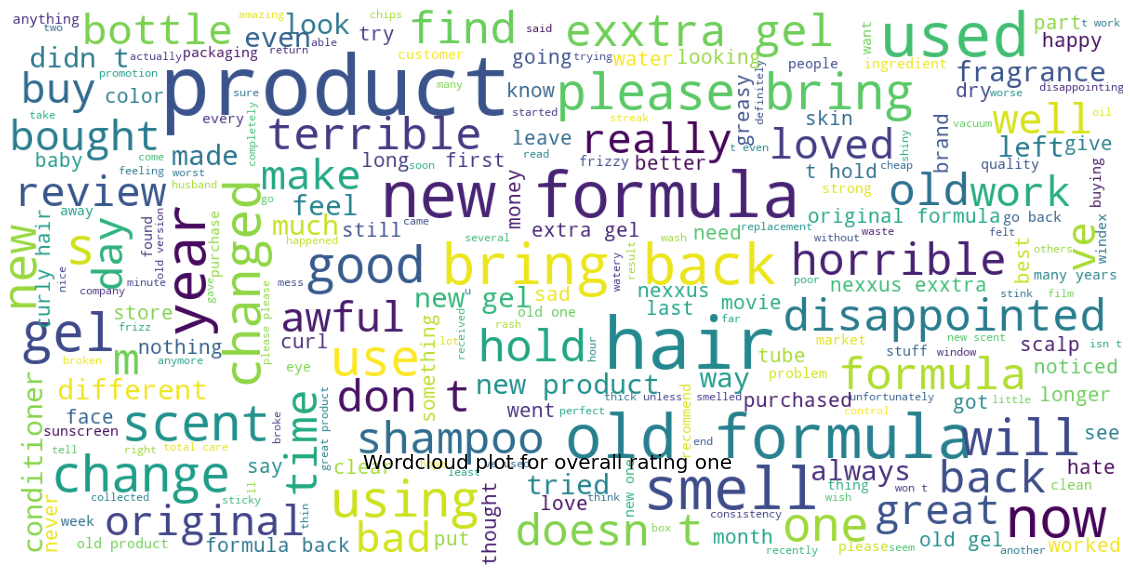

In [65]:
wordcloud_plot(review_text_for_overall['clean_summary'][0], title = 'Wordcloud plot for overall rating one')

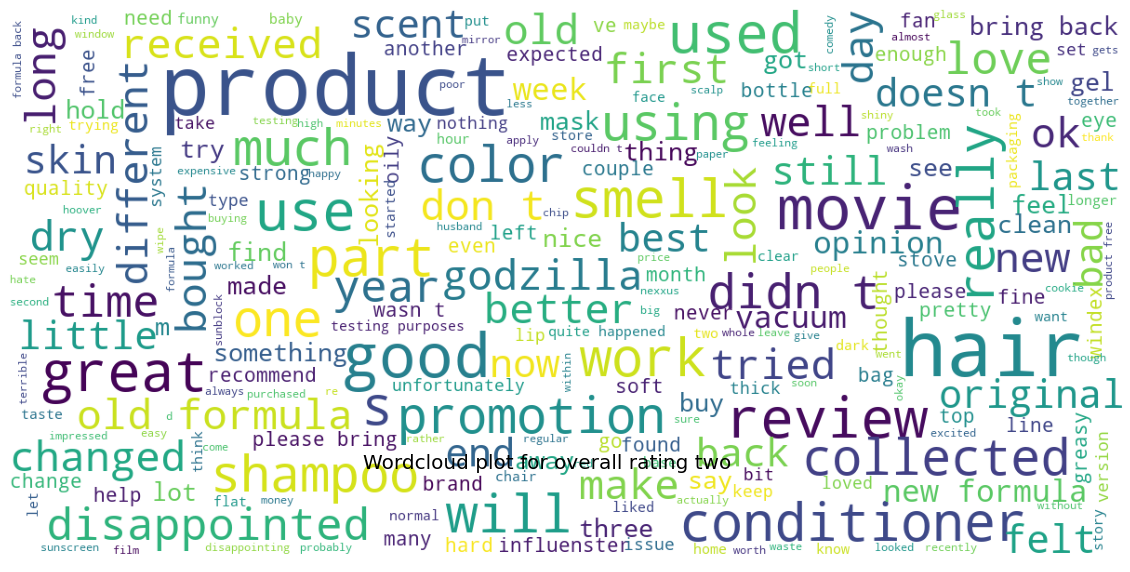

In [66]:
wordcloud_plot(review_text_for_overall['clean_summary'][1], title = 'Wordcloud plot for overall rating two')

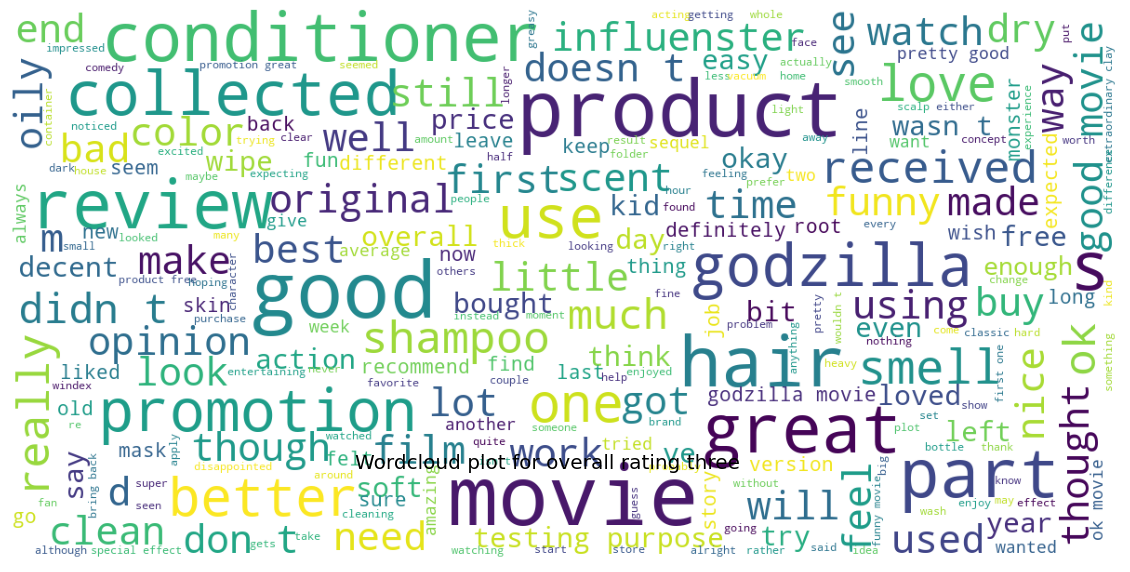

In [67]:
wordcloud_plot(review_text_for_overall['clean_summary'][2], title = 'Wordcloud plot for overall rating three')

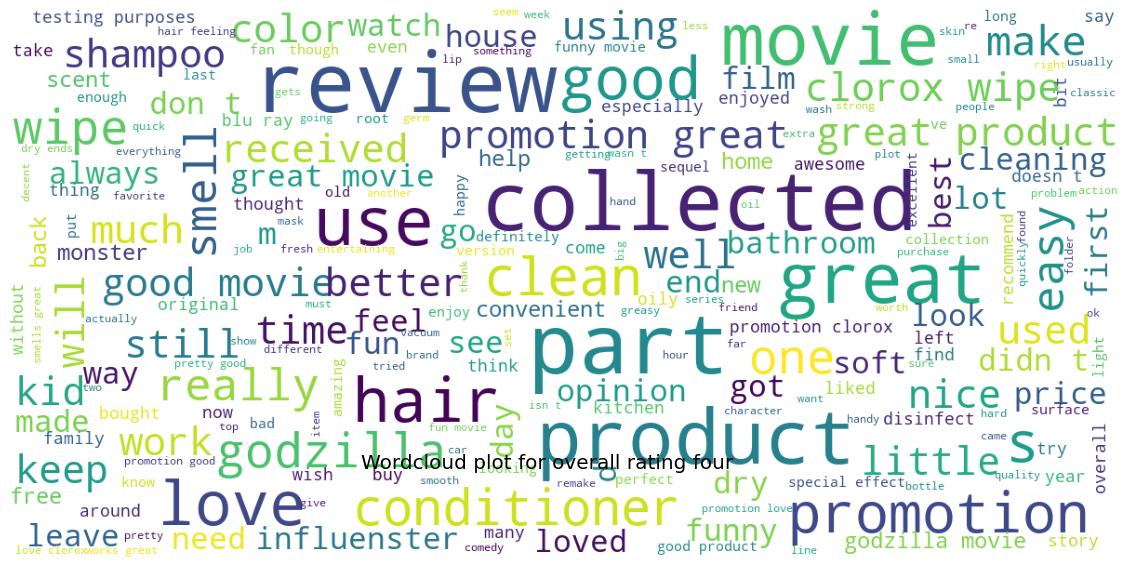

In [68]:
wordcloud_plot(review_text_for_overall['clean_summary'][3], title = 'Wordcloud plot for overall rating four')

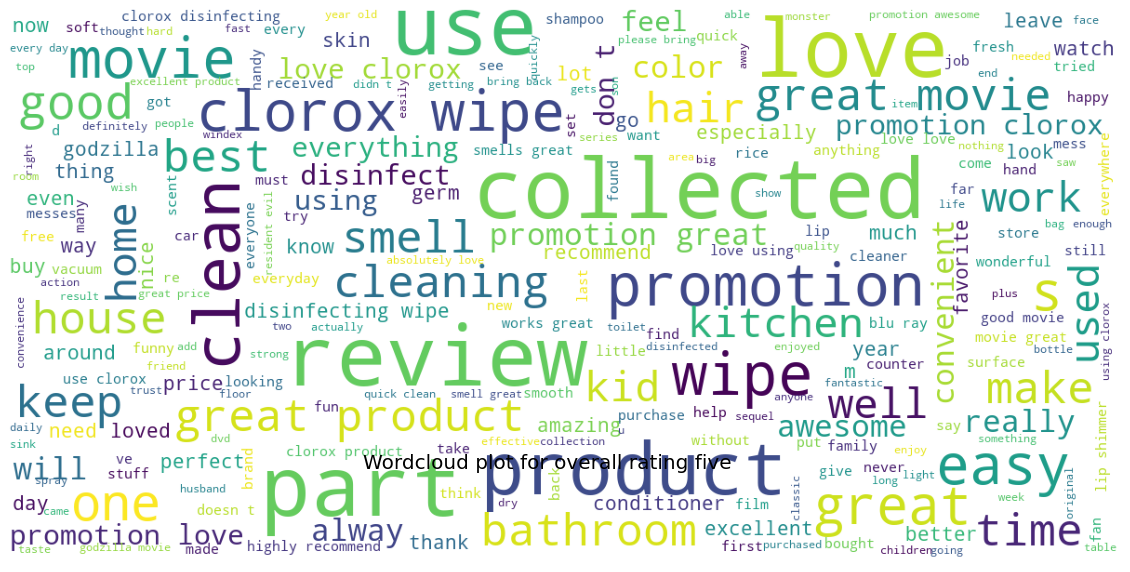

In [69]:
wordcloud_plot(review_text_for_overall['clean_summary'][4], title = 'Wordcloud plot for overall rating five')

In [506]:
dfReviews

able  absolutely  action  actually  add  age  ago  amaze  apply  away  \
0         0           0       0         0    0    0    0      0      0     0   
1         0           0       0         0    0    0    0      0      0     0   
2         0           0       0         0    0    0    0      0      0     0   
3         0           0       0         0    0    0    0      0      0     0   
4         0           2       0         0    0    0    0      0      0     0   
...     ...         ...     ...       ...  ...  ...  ...    ...    ...   ...   
29410     0           0       0         0    0    0    0      1      0     0   
29411     0           0       0         0    0    0    0      0      0     0   
29412     0           0       0         0    0    0    0      0      0     0   
29413     0           0       0         0    0    0    0      0      0     0   
29414     0           0       0         0    0    0    0      0      0     0   

       ...  week  white  windex  wipe  wish  wonderful  work  worth  year  \
0      ...     0      0       0     0     0          0     0      0     0   
1      ...     0      0       0     0     0          0     0      0     0   
2      ...     0      0       0     0     0          0     0      0     0   
3      ...     0      0       0     0     0          0     0      0     0   
4      ...     0      0       0     0     0          0     0      1     0   
...    ...   ...    ...     ...   ...   ...        ...   ...    ...   ...   
29410  ...     0      0       0     0     0          0     0      0     0   
29411  ...     0      0       0     0     0          0     0      0     0   
29412  ...     0      0       0     0     0          0     0      0     0   
29413  ...     0      0       0     0     0          0     0      0     0   
29414  ...     0      0       0     0     0          0     0      0     0   

       years  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
29410      0  
29411      0  
29412      0  
29413      0  
29414      0  

[29415 rows x 300 columns]

In [ ]:
df_model_data['clean_summary_review'].head(5)

In [ ]:
df_model_data.drop_duplicates(['overall'], keep ='last', inplace = True)

In [507]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [508]:
# KNN classifier to find similar products
print(lentrain)
print(lentest)

26473
2942


In [509]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [461]:
pd.set_option("display.precision", 8)

In [511]:
for i in range(0, X_test.shape[0]):
    test_neighbors = nearest_neighbors.kneighbors([X_test[i]])
    related_product_indices = test_neighbors[1]
    first_nearest_product = [prod[0] for prod in related_product_indices]
    first_nearest_product = str(first_nearest_product).strip('[]')
    first_nearest_product = int(first_nearest_product)
    second_nearest_product = [prod[1] for prod in related_product_indices]
    second_nearest_product = str(second_nearest_product).strip('[]')
    second_nearest_product = int(second_nearest_product)
    third_nearest_product = [prod[2] for prod in related_product_indices]
    third_nearest_product = str(third_nearest_product).strip('[]')
    third_nearest_product = int(third_nearest_product)
    
    try:
        if i<4:
            print('Based on product reviews of ', df_model_data['asin'][X_train.shape[0] + i], ' the average rating is ', 
          df_model_data['overall'][X_train.shape[0] + i])
            print('The 1st recommended product is ', df_model_data['asin'][first_nearest_product], ' the average rating is ',
         df_model_data['overall'][first_nearest_product])
            print('The 2nd recommended product is ', df_model_data['asin'][second_nearest_product], ' the average rating is ',
         df_model_data['overall'][second_nearest_product])
            print('The 3rd recommended product is ', df_model_data['asin'][third_nearest_product], ' the average rating is ',
         df_model_data['overall'][third_nearest_product])
            print('-------------------------------------------------------------------------------------------')
    except:
        pass

Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpfAgSp1cnluZ0-b2-K  average rating is  5
The second similar product is  AV1YneDPglJLPUi8IJyQ  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpfMpZ51cnluZ0-f_L9  average rating is  5
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpfDiTDLJeJML431Y21  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpe8dHWLJeJML43y4uG  average rating is  5
The second

Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpe5JOgilAPnD_xQPfE  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpfBrUZilAPnD_xTUly  average rating is  3
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpe6FfKilAPnD_xQmHi  average rating is  5
The second similar product is  AVpe4hlXLJeJML43xbrB  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfR5m0LJeJML436K3W  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second

Based on product reviews, for  AVpfrFDZLJeJML43Bmv0  average rating is  5
The first similar product is  AVpfAgSp1cnluZ0-b2-K  average rating is  5
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrFDZLJeJML43Bmv0  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf7LysilAPnD_xkm9G  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfrFDZLJeJML43Bmv0  average rating is  5
The first similar product is  AVpfJP1C1cnluZ0-e3Xy  average rating is  5
The second similar product is  AV1Ys0kTvKc47QAVgx1C  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrFDZLJeJML43Bmv0  average rating is  5
The first similar product is  AVpf5Z1zLJeJML43FpB-  average rating is  5
The second

Based on product reviews, for  AVpfrgjFLJeJML43BvCc  average rating is  3
The first similar product is  AVpfoSS51cnluZ0-oVH9  average rating is  4
The second similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrgjFLJeJML43BvCc  average rating is  4
The first similar product is  AVpfazX31cnluZ0-kbdl  average rating is  5
The second similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrgjFLJeJML43BvCc  average rating is  5
The first similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  5
The second similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrgjFLJeJML43BvCc  average rating is  5
The first similar product is  AVpe6CHv1cnluZ0-ZhwN  average rating is  5
The second

Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpfazX31cnluZ0-kbdl  average rating is  5
The second similar product is  AVpfKOYiilAPnD_xWOFw  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpe7zdzLJeJML43yp3d  average rating is  5
The second similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpf5Z1zLJeJML43FpB-  average rating is  5
The second similar product is  AV1YneDPglJLPUi8IJyQ  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  4
The second

Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  4
The second similar product is  AVpe8gsILJeJML43y6Ed  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AVpfJP1C1cnluZ0-e3Xy  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpf0O60ilAPnD_xizE6  average rating is  5
The second similar product is  AVpe8gsILJeJML43y6Ed  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRoqcLJeJML436FqG  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second

-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  2
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  3
The second similar product is  AVpe4hlXLJeJML43xbrB  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  2
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  2
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  3
The first similar produ

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  3
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  3
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpfPnrU1cnluZ0-g9rL  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  3
The first similar product is  AVpe4hlXLJeJML43xbrB  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  3
The first similar product is  AVpfJcHuLJeJML433ZrY  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpf0kZFilAPnD_xi5QZ  average rating is  5
The second similar product is  AVpe4hlXLJeJML43xbrB  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AV1ZVIgy-jtxr-f31W9N  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpf0eb2LJeJML43EVSt  average rating is  1
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfov9TLJeJML43A7B0  average rating is  3
The second similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  5
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  2
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  3
The second similar product is  AVpfR5m0LJeJML436K3W  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfCi3kilAPnD_xTn3k  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf0kZFilAPnD_xi5QZ  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  4
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second

-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfD9xTLJeJML431ig2  average rating is  4
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar produ

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfqW4WilAPnD_xf7a_  average rating is  5
The second similar product is  AV1ZT7GLglJLPUi8IQLI  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe41TqilAPnD_xQH3d  average rating is  4
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe4hlXLJeJML43xbrB  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPnrU1cnluZ0-g9rL  average rating is  5
The second similar product is  AVpfqW4WilAPnD_xf7a_  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  3
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  4
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  2
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfe3On1cnluZ0-lgn5  average rating is  5
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe31o71cnluZ0-YrSD  average rating is  4
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf0thK1cnluZ0-r8vR  average rating is  5
The second

-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe31o71cnluZ0-YrSD  average rating is  4
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar produ

The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf0eb2LJeJML43EVSt  average rating is  4
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product review

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  4
The second similar product is  AVpf3okQLJeJML43FMif  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  4
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfe3On1cnluZ0-lgn5  average rating is  5
The second similar product is  AVpe5JOgilAPnD_xQPfE  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe31o71cnluZ0-YrSD  average rating is  5
The second similar product is  AVpfBU2S1cnluZ0-cJsO  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe31o71cnluZ0-YrSD  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpfD9xTLJeJML431ig2  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf0kZFilAPnD_xi5QZ  average rating is  5
The second similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe6n2_LJeJML43yOgE  average rating is  4
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  2
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe8gsILJeJML43y6Ed  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  2
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
The second

-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar produ

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
The second

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second

-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfCjEEilAPnD_xTn75  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar produ

Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  4
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  3
The second similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
The second

-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AV1Ymf_rglJLPUi8II2v  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AVpe31o71cnluZ0-YrSD  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRTh1ilAPnD_xYic2  average rating is  5
The first similar produ

Based on product reviews, for  AVpfrTyiLJeJML43BrSI  average rating is  5
The first similar product is  AVpe6FfKilAPnD_xQmHi  average rating is  5
The second similar product is  AVpf5Z1zLJeJML43FpB-  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrTyiLJeJML43BrSI  average rating is  5
The first similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  5
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrTyiLJeJML43BrSI  average rating is  5
The first similar product is  AVpf3okQLJeJML43FMif  average rating is  5
The second similar product is  AVpfe3On1cnluZ0-lgn5  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfrTyiLJeJML43BrSI  average rating is  5
The first similar product is  AVpe8dHWLJeJML43y4uG  average rating is  5
The second

Based on product reviews, for  AVpfRYbSilAPnD_xYkD4  average rating is  5
The first similar product is  AV1YmDL9vKc47QAVgr7_  average rating is  5
The second similar product is  AV1YmDL9vKc47QAVgr7_  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRYbSilAPnD_xYkD4  average rating is  5
The first similar product is  AVpfmjXGLJeJML43AQ5_  average rating is  5
The second similar product is  AVpfmjXGLJeJML43AQ5_  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfRYbSilAPnD_xYkD4  average rating is  5
The first similar product is  AV1ZT7GLglJLPUi8IQLI  average rating is  5
The second similar product is  AVpfazX31cnluZ0-kbdl  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfRYbSilAPnD_xYkD4  average rating is  5
The first similar product is  AVpf385g1cnluZ0-s0_t  average rating is  4
The second

Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  1
The first similar product is  AVpf385g1cnluZ0-s0_t  average rating is  4
The second similar product is  AVpfG_ujilAPnD_xVI8L  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  1
The first similar product is  AVpfM_ytilAPnD_xXIJb  average rating is  5
The second similar product is  AVpf4oLxLJeJML43FcxC  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  1
The first similar product is  AVpf385g1cnluZ0-s0_t  average rating is  4
The second similar product is  AVpe8gsILJeJML43y6Ed  average rating is  2
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  1
The first similar product is  AVpfPPkEilAPnD_xX3cP  average rating is  1
The second

Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpfEqruilAPnD_xUWDr  average rating is  5
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  4
The second similar product is  AVpfov9TLJeJML43A7B0  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpfazX31cnluZ0-kbdl  average rating is  1
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpf63aJLJeJML43F__Q  average rating is  5
The second

Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AVpfGuDrLJeJML432fDz  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  3
The second similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
The second similar product is  AVpfCi3kilAPnD_xTn3k  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  4
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  5
The second

Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfF7k8ilAPnD_xUyWf  average rating is  3
The second similar product is  AVpfr5cb1cnluZ0-pZFp  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfN6Z71cnluZ0-gZmO  average rating is  5
The second similar product is  AVpe59io1cnluZ0-ZgDU  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AVpfR5m0LJeJML436K3W  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpe8gsILJeJML43y6Ed  average rating is  3
The second

Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfpM2yilAPnD_xfmDG  average rating is  5
The second similar product is  AVpfBU2S1cnluZ0-cJsO  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  4
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfov9TLJeJML43A7B0  average rating is  5
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpe6CHv1cnluZ0-ZhwN  average rating is  5
The second

-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfbkyr1cnluZ0-kozI  average rating is  5
The second similar product is  AVpfC3KoLJeJML431KRR  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfBrUZilAPnD_xTUly  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AVpe31o71cnluZ0-YrSD  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar produ

Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfR5m0LJeJML436K3W  average rating is  5
The second similar product is  AVpe8gsILJeJML43y6Ed  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfGuDrLJeJML432fDz  average rating is  5
The second similar product is  AVpf0eb2LJeJML43EVSt  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpf385g1cnluZ0-s0_t  average rating is  5
The second similar product is  AVpe8gsILJeJML43y6Ed  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpf385g1cnluZ0-s0_t  average rating is  5
The second

Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfPaoqLJeJML435Xk9  average rating is  5
The second similar product is  AVpf2tw1ilAPnD_xjflC  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpfNglu1cnluZ0-gQ7x  average rating is  4
The second similar product is  AVpfQtEm1cnluZ0-hUpe  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  5
The second similar product is  AVpf7LysilAPnD_xkm9G  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpftikC1cnluZ0-p31V  average rating is  5
The first similar product is  AVpf0thK1cnluZ0-r8vR  average rating is  5
The second

Based on product reviews, for  AVpfUJu_ilAPnD_xZdDr  average rating is  5
The first similar product is  AVpf0thK1cnluZ0-r8vR  average rating is  5
The second similar product is  AVpe41TqilAPnD_xQH3d  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfUJu_ilAPnD_xZdDr  average rating is  5
The first similar product is  AVpf5ujMilAPnD_xkQVi  average rating is  4
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfUJu_ilAPnD_xZdDr  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  4
The second similar product is  AVpe7sl91cnluZ0-aI1Y  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfUJu_ilAPnD_xZdDr  average rating is  5
The first similar product is  AVpf5olc1cnluZ0-tPrO  average rating is  4
The second

Based on product reviews, for  AVpfVPh3ilAPnD_xZzW9  average rating is  5
The first similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfVPh3ilAPnD_xZzW9  average rating is  5
The first similar product is  AVpfJP1C1cnluZ0-e3Xy  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfVPh3ilAPnD_xZzW9  average rating is  5
The first similar product is  AVpfJP1C1cnluZ0-e3Xy  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfVPh3ilAPnD_xZzW9  average rating is  5
The first similar product is  AVpfN6Z71cnluZ0-gZmO  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  2
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  2
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  2
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  2
The first similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  4
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpe5c23LJeJML43xybi  average rating is  3
The second similar product is  AV14LG0R-jtxr-f38QfS  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second

The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpfHI2filAPnD_xVL7R  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf5FF71cnluZ0-tHAV  average rating is  5
The second similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
----------

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpe5c23LJeJML43xybi  average rating is  3
The second similar product is  AV14LG0R-jtxr-f38QfS  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  3
The second similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  3
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second

The second similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  3
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AV1ZT7GLglJLPUi8IQLI  average rating is  5
The second similar product is  AV1YmDL9vKc47QAVgr7_  average rating is  5
-----------------------------------------------------------
Based on product review

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  3
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfBSJgilAPnD_xTLf3  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  3
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  1
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second

The first similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
The second similar product is  AVpf63aJLJeJML43F__Q  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
The second similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
----------

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second similar product is  AVpe6n2_LJeJML43yOgE  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  2
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  2
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AV1YmDL9vKc47QAVgr7_  average rating is  4
The second

The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  3
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
----------

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfCi3kilAPnD_xTn3k  average rating is  1
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  4
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  4
The second similar product is  AVpf63aJLJeJML43F__Q  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  1
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  3
The second similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe_y-I1cnluZ0-bmvh  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  4
The second similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AV1ZT7GLglJLPUi8IQLI  average rating is  5
The second similar product is  AV1YmDL9vKc47QAVgr7_  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AV1YGDqsGV-KLJ3adc-O  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf385g1cnluZ0-s0_t  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  4
The first similar product is  AV1YmDL9vKc47QAVgr7_  average rating is  1
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second

The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product review

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  1
The second similar product is  AV1ZT7GLglJLPUi8IQLI  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfL-z9ilAPnD_xWzE_  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  2
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AV16khLE-jtxr-f38VFn  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf63aJLJeJML43F__Q  average rating is  4
The second similar product is  AVpfcu821cnluZ0-k8ep  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
The second similar product is  AV1l8zRZvKc47QAVhnAv  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
The second similar product is  AVpe6n2_LJeJML43yOgE  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpf5FF71cnluZ0-tHAV  average rating is  5
The second

Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfKb8k1cnluZ0-fQdA  average rating is  5
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
The second similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  5
The second

The second similar product is  AVpfHI2filAPnD_xVL7R  average rating is  5
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
The second similar product is  AVpfOmKwLJeJML435GM7  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpe5s3RLJeJML43x4eA  average rating is  4
The second similar product is  AVpf3VOfilAPnD_xjpun  average rating is  4
-----------------------------------------------------------
Based on product reviews, for  AVpfW8y_LJeJML437ySW  average rating is  5
The first similar product is  AVpfOmKwLJeJML435GM7  average rating is  3
The second similar product is  AVpe5s3RLJeJML43x4eA  average rating is  5
-----------------------------------------------------------
Based on product review

In [453]:

print ("Based on product reviews, for ", df3["id"][260] ," average rating is ",df3["Rating"][260])
print ("The first similar product is ", df3["id"][first_related_product] ," average rating is ",df3["Rating"][first_related_product])
print ("The second similar product is ", df3["id"][second_related_product] ," average rating is ",df3["Rating"][second_related_product])
print ("-----------------------------------------------------------")

Based on product reviews, for  AV1l8zRZvKc47QAVhnAv  average rating is  5
The first similar product is  AVpfm8yiLJeJML43AYyu  average rating is  5
The second similar product is  AVpfazX31cnluZ0-kbdl  average rating is  4
-----------------------------------------------------------


In [ ]:
Predictive Modeling: Let's use KNerighborsClassifier to classify: Prdicting overall review based on product reviews:

# Predicting Review Score¶


In [454]:
df5_train_target = df3["Rating"][:lentrain]
df5_test_target = df3["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           1       0.11      0.13      0.12        60
           2       0.05      0.04      0.04        56
           3       0.10      0.08      0.09       251
           4       0.45      0.27      0.33       950
           5       0.62      0.79      0.70      1625

    accuracy                           0.53      2942
   macro avg       0.27      0.26      0.26      2942
weighted avg       0.50      0.53      0.50      2942



# Accuracy of the model

In [455]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.5339904826648538


In [456]:
print(mean_squared_error(df5_test_target, knnpreds_test))

1.2579877634262406


# Predicting Review Score with k = 5

In [457]:
df5_train_target = df3["Rating"][:lentrain]
df5_test_target = df3["Rating"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           1       0.30      0.10      0.15        60
           2       0.17      0.04      0.06        56
           3       0.08      0.04      0.05       251
           4       0.47      0.21      0.29       950
           5       0.60      0.88      0.71      1625

    accuracy                           0.56      2942
   macro avg       0.32      0.25      0.25      2942
weighted avg       0.50      0.56      0.50      2942



In [458]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.5591434398368457


In [459]:
print(mean_squared_error(df5_test_target, knnpreds_test))

1.1077498300475868
